In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
def color_scale(val):
    color = plt.cm.viridis(val / 100)  # Usar colormap viridis
    return f'background-color: rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'

os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
! pip install -r requirements_mvp7.txt

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms

In [5]:
%load_ext kedro.ipython

[01/20/25 16:36:48] INFO     Resolved project path as:                                              ]8;id=221105;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=795925;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/20/25 16:36:49] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=647450;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=150056;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=808208;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=909294;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=289085;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=417125;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=314635;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=92999;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=227429;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=558835;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=902255;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=115661;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=893931;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=190330;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/20/25 16:36:49] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=539267;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=330189;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=325743;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=738215;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

[01/20/25 16:36:50] INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=233958;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=13253;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=997721;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=424823;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [7]:
params1= catalog.list
params= catalog.load("parameters")

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=734106;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=962134;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

### models:

In [ ]:
info_save_all = catalog.load('info_save_all')

                    INFO     Loading data from 'info_save_all' (PickleDataSet)...               ]8;id=586322;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=453025;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [9]:
info_save_all_anterior = catalog.load('info_save_all_anterior')

[01/13/25 16:56:54] INFO     Loading data from 'info_save_all_anterior' (PickleDataSet)...      ]8;id=257757;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=127026;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [10]:
info_save_all.keys()

dict_keys(['nodo_run', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'all_results', 'best_model_metrics_dataset', 'select_model'])

In [11]:
#info_save_all['best_model_metrics_dataset']
info_save_all['best_model_metrics_dataset']

model_name dataset_name metric_name   metric_type class_name  \
26  Run3,random_forest_2         test    f1-score  class metric        1.0   
24  Run3,random_forest_2         test   precision  class metric        1.0   
43        Run5,xgboost_4         test      recall  class metric        1.0   
23  Run3,random_forest_2        train    f1-score  class metric        1.0   
21  Run3,random_forest_2        train   precision  class metric        1.0   
13        Run2,xgboost_1        train      recall  class metric        1.0   

       value  
26    1.2332  
24    0.6228  
43   91.0862  
23    1.2462  
21    0.6294  
13  100.0000

In [12]:
info_save_all['all_results'][(info_save_all['all_results']['model_name'] == 'Run5,xgboost_4') & (info_save_all['all_results']['metric_name'] == 'recall')]

model_name dataset_name metric_name     metric_type      class_name  \
2   Run5,xgboost_4      balance      recall  overall metric  overall metric   
13  Run5,xgboost_4      balance      recall    class metric             0.0   
14  Run5,xgboost_4      balance      recall    class metric             1.0   
2   Run5,xgboost_4        train      recall  overall metric  overall metric   
13  Run5,xgboost_4        train      recall    class metric             0.0   
14  Run5,xgboost_4        train      recall    class metric             1.0   
2   Run5,xgboost_4         test      recall  overall metric  overall metric   
13  Run5,xgboost_4         test      recall    class metric             0.0   
14  Run5,xgboost_4         test      recall    class metric             1.0   

      value  
2   99.9865  
13  95.3196  
14  99.9865  
2   99.9865  
13  66.6100  
14  99.9865  
2   91.0862  
13  66.5868  
14  91.0862

In [13]:
(99.9865 - 91.0862)

8.900300000000001

In [16]:
info_save_all_anterior['best_model_metrics_dataset']

model_name dataset_name metric_name   metric_type class_name  \
35        Run4,xgboost_3         test    f1-score  class metric          1   
33        Run4,xgboost_3         test   precision  class metric          1   
70  Run8,random_forest_7         test      recall  class metric          1   
32        Run4,xgboost_3        train    f1-score  class metric          1   
30        Run4,xgboost_3        train   precision  class metric          1   
67  Run8,random_forest_7        train      recall  class metric          1   

       value  
35  0.034111  
33  0.017475  
70  0.993126  
32  0.045483  
30  0.023298  
67  0.993240

In [18]:
(0.993240-0.993126)*100

0.01140000000000585

info_save_all2 = info_save_all.copy()
for col in info_save_all.keys():
    if isinstance(col, int) and ('grid_search' not in info_save_all[col].keys()):
        del info_save_all2[col]

print(info_save_all2.keys())
print(info_save_all.keys())
info_save_last_all = models.evaluate_models_for_all(info_save_all2, params)
info_save_all_correct = models.compare_metrics_models(info_save_last_all, params)
print(info_save_all_correct.keys())

import pickle
import boto3
from io import BytesIO

# Configura el cliente de S3 (asegúrate de tener configuradas las credenciales de AWS)
s3_client = boto3.client('s3')

# Serializa el objeto en memoria (sin necesidad de archivo local)
pickle_buffer = BytesIO()
pickle.dump(info_save_all_correct, pickle_buffer)
pickle_buffer.seek(0)  # Vuelve al principio del buffer después de serializar


# Define el nombre del bucket y la ruta en S3
bucket_name = 'data-bbog-dev-sandbox-entity'
s3_key = 'casos-uso/fabrica-personas/AH/06-models/info_save_all.pickle'

# Sube el archivo pickle a S3
s3_client.upload_fileobj(pickle_buffer, bucket_name, s3_key)

print("Object has been pickled and uploaded to S3.")

In [19]:
for i in range(12):
    display(info_save_all[i]['Muestreo_tipo'])


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}

In [ ]:
# con eda
info_save_all[0]['Scaler'].reindex_OneHotEncoding

In [20]:
# sin eda
info_save_all[0]['Scaler'].reindex_OneHotEncoding

REINDEX  \
llave                                                           
0                                     region_Region_Amazonica   
1                                        region_Region_Andina   
2                                        region_Region_Caribe   
3                                       region_Region_Central   
4                                     region_Region_Orinoquia   
5                                      region_Region_Pacifica   
6                                      departamento_antioquia   
7                                         departamento_arauca   
8           departamento_archipielago_de_san_andres_provid...   
9                                      departamento_atlantico   
10                                   departamento_bogota_d_c_   
11                                       departamento_bolivar   
12                                        departamento_boyaca   
13                                        departamento_caldas   
14                                       departamento_caqueta   
15                                      departamento_casanare   
16                                         departamento_cauca   
17                                         departamento_cesar   
18                                         departamento_choco   
19                                       departamento_cordoba   
20                                  departamento_cundinamarca   
21                                       departamento_guainia   
22                                      departamento_guaviare   
23                                         departamento_huila   
24                                    departamento_la_guajira   
25                                     departamento_magdalena   
26                                          departamento_meta   
27                                        departamento_narino   
28                            departamento_norte_de_santander   
29                                      departamento_putumayo   
30                                       departamento_quindio   
31                                     departamento_risaralda   
32                                     departamento_santander   
33                                         departamento_sucre   
34                                        departamento_tolima   
35                               departamento_valle_del_cauca   
36                                        departamento_vaupes   
37                                       departamento_vichada   
DROP_FIRST                                                NaN   

                      region                              departamento  
llave                                                                   
0              Region_Caribe                                 atlantico  
1              Region_Andina                                 santander  
2             Region_Central                                 magdalena  
3            Region_Pacifica                               bogota_d_c_  
4           Region_Amazonica                                    caldas  
5           Region_Orinoquia                                 antioquia  
6                        NaN                                    tolima  
7                        NaN                           valle_del_cauca  
8                        NaN                              cundinamarca  
9                        NaN                                     cauca  
10                       NaN                                   cordoba  
11                       NaN                                  casanare  
12                       NaN                                 risaralda  
13                       NaN                                   bolivar  
14                       NaN                                     sucre  
15                       NaN                                     choco  
16                       NaN                        norte_de_santander  
1

In [ ]:
# con EDA
info_temp = models.compare_metrics_models(info_save_all,params)

[01/13/25 19:11:53] INFO     Iniciando la comparacion de metricas sobre las datas generadas en         ]8;id=547398;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=185553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#891\891]8;;\
                             Model_input:                                                                          

                    INFO     Graficos de desempeños en ['cohen_kappa', 'roc_auc'] calculadas tipo:     ]8;id=72010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=856238;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#895\895]8;;\
                             ['overall metric']                                                                    

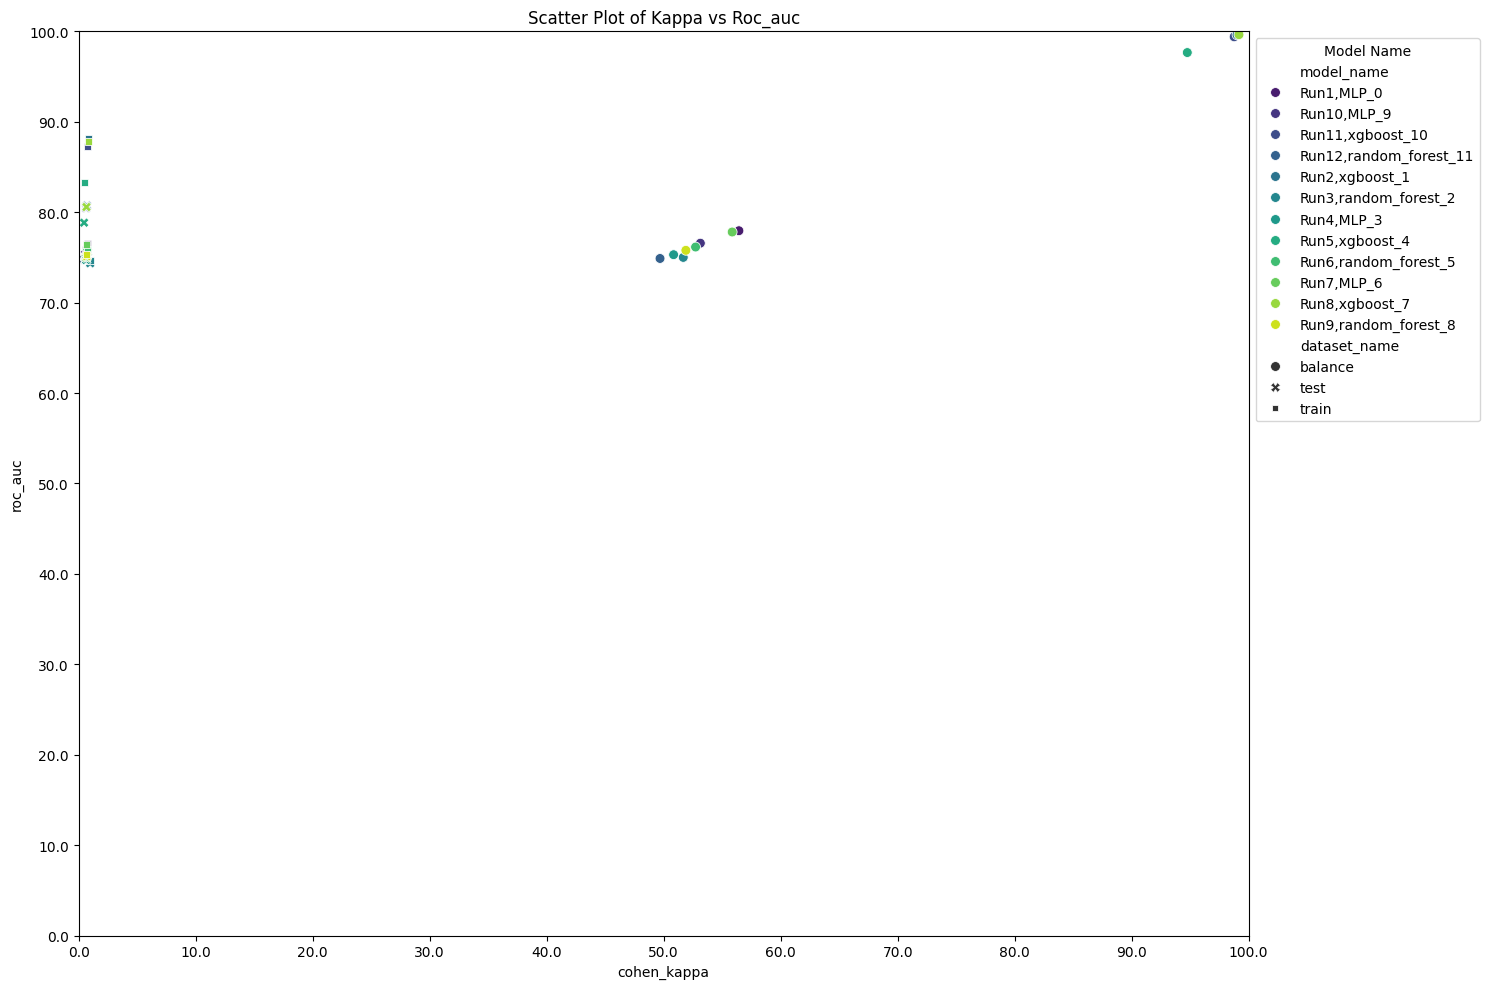

[01/13/25 19:11:54] INFO     Graficos de desempeños en ['1', '1.0', 1, 1.0] calculadas sobre y         ]8;id=528646;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=172823;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#919\919]8;;\
                             f1-score                                                                              

                    INFO     Algoritmos con Metricas = 0: ['Run1,MLP_0', 'Run2,xgboost_1',             ]8;id=494033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=988373;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#926\926]8;;\
                             'Run3,random_forest_2', 'Run4,MLP_3', 'Run5,xgboost_4',                               
                             'Run6,random_forest_5', 'Run7,MLP_6', 'Run8,xgboost_7',                               
                             'Run9,random_forest_8', 'Run10,MLP_9', 'Run11,xgboost_10',                            
                             'Run12,random_forest_11']                                                             

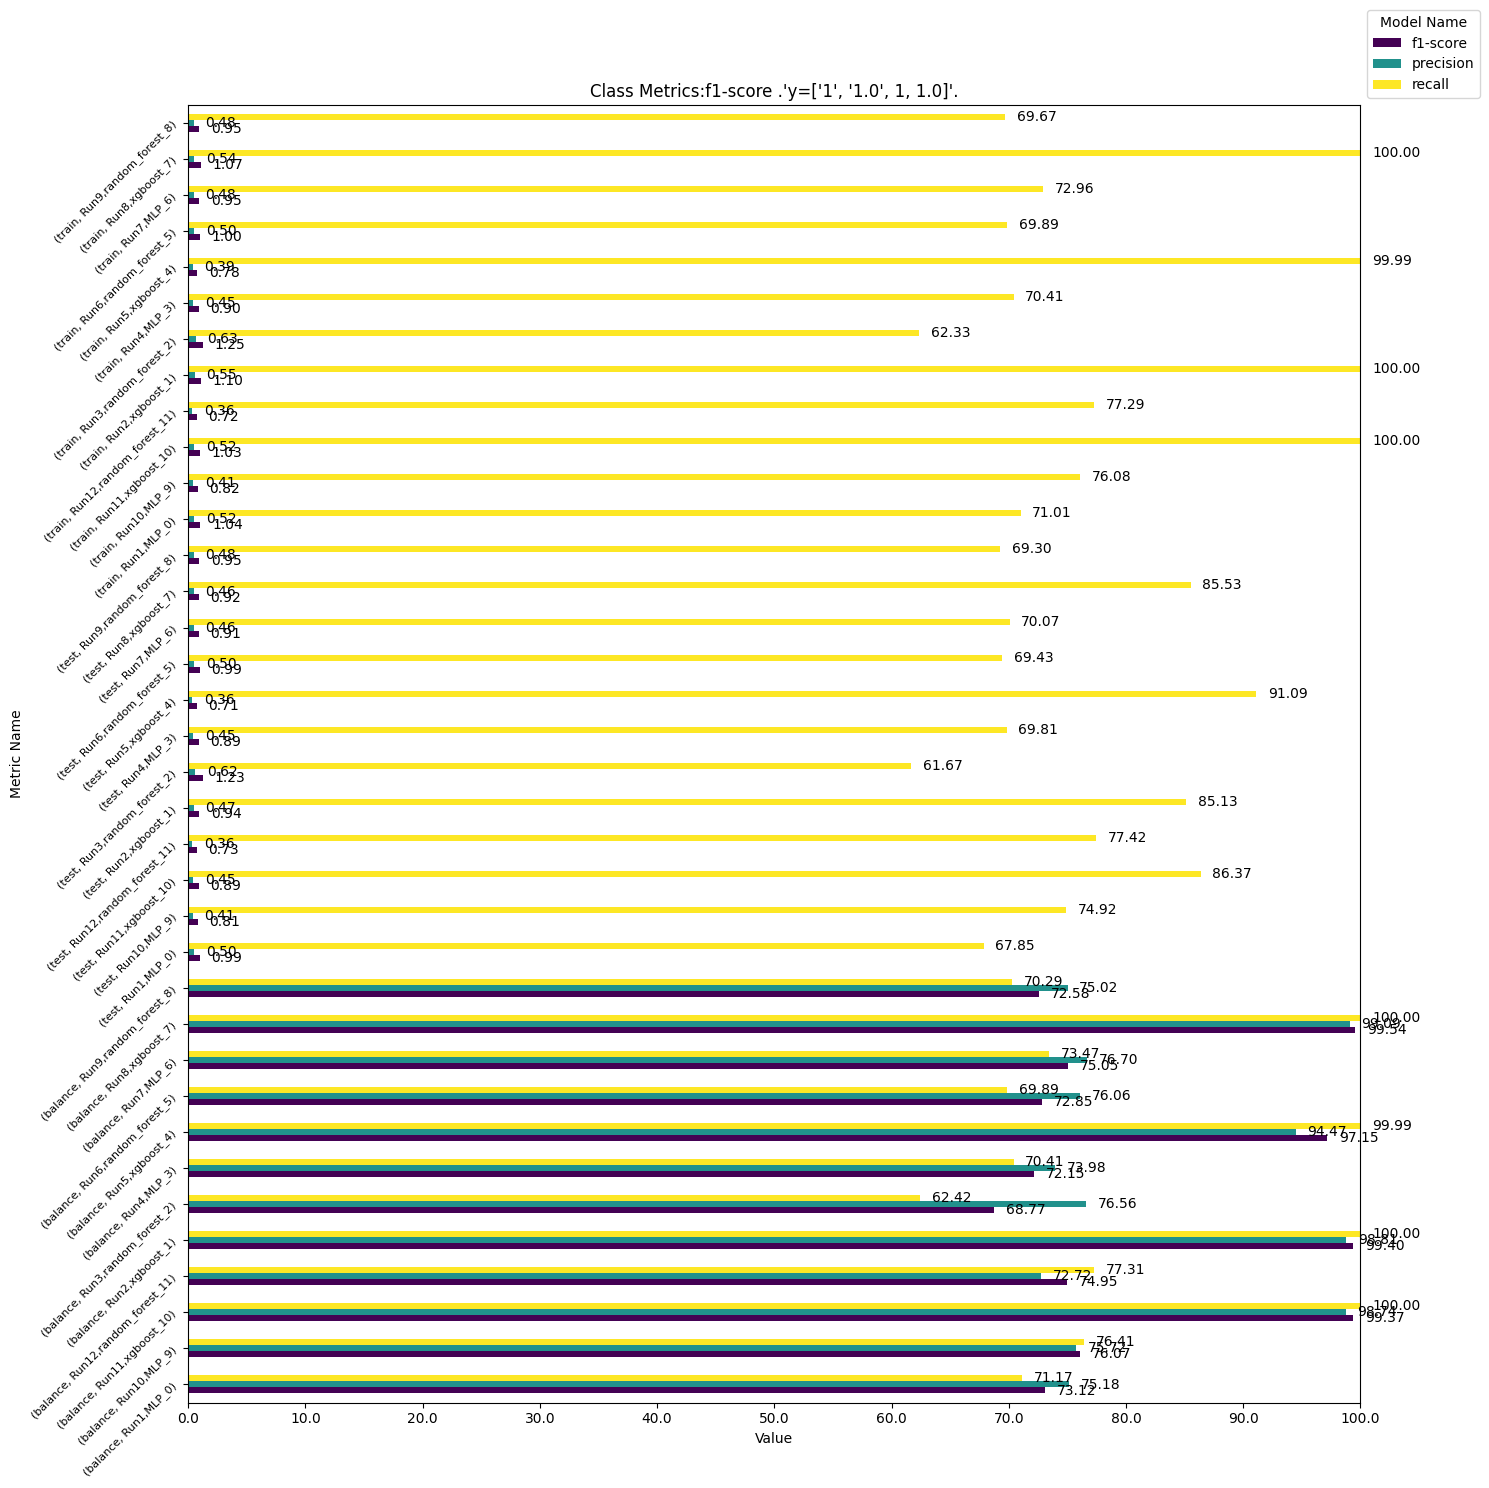

                    INFO     Mejores algoritmos por metrica y dataset:                                 ]8;id=538335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=203709;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#960\960]8;;\

model_name dataset_name metric_name   metric_type class_name  \
26  Run3,random_forest_2         test    f1-score  class metric        1.0   
24  Run3,random_forest_2         test   precision  class metric        1.0   
43        Run5,xgboost_4         test      recall  class metric        1.0   
23  Run3,random_forest_2        train    f1-score  class metric        1.0   
21  Run3,random_forest_2        train   precision  class metric        1.0   
13        Run2,xgboost_1        train      recall  class metric        1.0   

       value  
26    1.2332  
24    0.6228  
43   91.0862  
23    1.2462  
21    0.6294  
13  100.0000

                    INFO     Mejores algoritmos:                                                      ]8;id=262328;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=860359;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#1007\1007]8;;\

best_model_name   best_unbiased_model  \
model_name   Run3,random_forest_2  Run3,random_forest_2   
metric_name              f1-score              f1-score   
metric_type          class metric          class metric   
class_name                    1.0                   1.0   
test                       1.2332                1.2332   
balance                   68.7707               68.7707   
train                      1.2462                1.2462   
bias                     -67.5245              -67.5245   
real_bias                    True                  True   
test-train                 -0.013                -0.013   
fitting               overfitting           overfitting   

                 best_fitting_model  
model_name   Run12,random_forest_11  
metric_name                f1-score  
metric_type            class metric  
class_name                      1.0  
test                         0.7264  
balance                      74.946  
train                         0.725  
bias                        -74.221  
real_bias                      True  
test-train                   0.0014  
fitting                Underfitting

In [ ]:
# sin EDA
info_temp = models.compare_metrics_models(info_save_all,params)

In [23]:
pct = 0.70

In [ ]:
# con EDA
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df["value"] = df["value"].astype(float)
df

In [ ]:
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)

In [ ]:
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)

In [ ]:
df_metrics_test[df_metrics_test['model_name'].isin(names)]

In [ ]:
df_metrics_train[df_metrics_train['model_name'].isin(names)]

In [ ]:
info_save_all['best_model_metrics_dataset']

In [10]:
# sin EDA
pct = 0.65
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df["value"] = df["value"].astype(float)
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)
print("Total modelos: ",np.sum(weightss))
display(df_metrics_test[df_metrics_test['model_name'].isin(names)])
display(df_metrics_train[df_metrics_train['model_name'].isin(names)])
info_save_all['best_model_metrics_dataset']

['Run1', 'Run2', 'Run3', 'Run6', 'Run8', 'Run9']
[1, 1, 1, 1, 1, 1]
Total modelos:  6


model_name dataset_name metric_name   metric_type class_name  \
16  Run3,random_forest_2         test    f1-score  class metric        1.0   
16  Run6,random_forest_5         test    f1-score  class metric        1.0   
16            Run1,MLP_0         test    f1-score  class metric        1.0   
16  Run9,random_forest_8         test    f1-score  class metric        1.0   
16        Run2,xgboost_1         test    f1-score  class metric        1.0   
16        Run8,xgboost_7         test    f1-score  class metric        1.0   

     value  
16  1.2332  
16  0.9935  
16  0.9907  
16  0.9484  
16  0.9371  
16  0.9151

model_name dataset_name metric_name   metric_type class_name  \
16  Run3,random_forest_2        train    f1-score  class metric        1.0   
16        Run2,xgboost_1        train    f1-score  class metric        1.0   
16        Run8,xgboost_7        train    f1-score  class metric        1.0   
16            Run1,MLP_0        train    f1-score  class metric        1.0   
16  Run6,random_forest_5        train    f1-score  class metric        1.0   
16  Run9,random_forest_8        train    f1-score  class metric        1.0   

     value  
16  1.2462  
16  1.1010  
16  1.0702  
16  1.0370  
16  0.9989  
16  0.9529

model_name dataset_name metric_name   metric_type class_name  \
26  Run3,random_forest_2         test    f1-score  class metric        1.0   
24  Run3,random_forest_2         test   precision  class metric        1.0   
43        Run5,xgboost_4         test      recall  class metric        1.0   
23  Run3,random_forest_2        train    f1-score  class metric        1.0   
21  Run3,random_forest_2        train   precision  class metric        1.0   
13        Run2,xgboost_1        train      recall  class metric        1.0   

       value  
26    1.2332  
24    0.6228  
43   91.0862  
23    1.2462  
21    0.6294  
13  100.0000

## model_selection

In [11]:
## algoritmo best_model_name unico:

In [9]:
info_save_select_ini = catalog.load('info_save_select_anterior') # best model unico

[01/14/25 15:45:30] INFO     Loading data from 'info_save_select_anterior' (PickleDataSet)...   ]8;id=858099;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=980172;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [11]:
check_df = info_save_select_ini['select_model2']
check_df = check_df[np.in1d(check_df.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df = check_df[check_df['class_name'].isin([1,1.0,'1','1.0'])]
check_df = check_df.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df

value  \
metric_name     dataset_name class_name select_model        name_model                           
Precision n_top test         1          best_fitting_model  Run8                        4.3764   
                                        best_model_name     Run4                         6.522   
                                        best_unbiased_model Run8                        4.3764   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]    6.537   
                train        1          best_fitting_model  Run8                        4.5504   
                                        best_model_name     Run4                        8.5431   
                                        best_unbiased_model Run8                        4.5504   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]   8.4604   
backtest        test         1          best_fitting_model  Run8                        4.3764   
                                        best_model_name     Run4                         6.522   
                                        best_unbiased_model Run8                        4.3764   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]    6.537   
                train        1          best_fitting_model  Run8                        4.5504   
                                        best_model_name     Run4                        8.5431   
                                        best_unbiased_model Run8                        4.5504   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]   8.4604   
f1-score n_top  test         1          best_fitting_model  Run8                        8.3858   
                                        best_model_name     Run4                       12.2453   
                                        best_unbiased_model Run8                        8.3858   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]  12.2718   
                train        1          best_fitting_model  Run8                        8.7047   
                                        best_model_name     Run4                       15.7415   
                                        best_unbiased_model Run8                        8.7047   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]   15.601   
recall n_top    test         1          best_fitting_model  Run8                         100.0   
                                        best_model_name     Run4                         100.0   
                                        best_unbiased_model Run8                         100.0   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]    100.0   
                train        1          best_fitting_model  Run8                         100.0   
                                        best_model_name     Run4                         100.0   
                                        best_unbiased_model Run8                         100.0   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]    100.0   

                                                                                            model_name  
metric_name     dataset_name class_name select_model        name_model                                  
Precision n_top test         1          best_fitting_model  Run8                       random_forest_7  
                                        best_model_name     Run4                             xgboost_3  
                                        best_unbiased_model Run8                       random_forest_7  
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]         Ensamble  
                train        1          best_fitting_model  Run8                       random_forest_7  
                     

In [ ]:
info_save_select_mvp2 = catalog.load('info_save_select_mvp2') # best model unico

In [ ]:
check_df_mvp2 = info_save_select_mvp2['select_model2']
check_df_mvp2 = check_df_mvp2[np.in1d(check_df_mvp2.index.get_level_values(1),['backtest'])].reset_index() 
check_df_mvp2 = check_df_mvp2.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_mvp2

In [14]:
params['Ensamble']['want'] = True
params['optimizacion_bayesiana']['want'] = False
params['Ensamble']['Algoritmos'] = ensamble
params['Ensamble']['weights'] = weightss

In [15]:
params['n_obs_filter']

0.3

In [16]:
params['use_key']

{'want': False, 'llave': ['Run10,xgboost_9'], 'estrategia': ['best_model_name']}

In [17]:
params['Ensamble']


{
    'want': True,
    'Algoritmos': ['Run1', 'Run2', 'Run3', 'Run6', 'Run8', 'Run9'],
    'weights': [1, 1, 1, 1, 1, 1],
    'scorer': 'backtest_scorer'
}

In [18]:
info_save_temp=ms.generate_modelo_produccion(info_save_all, params)

[01/13/25 19:27:02] INFO     Iniciando el Ensamblado de modelos...                                     ]8;id=498056;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=158546;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#747\747]8;;\

                    INFO     train                                                                     ]8;id=911326;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=15448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#707\707]8;;\

                    INFO     Nodo 0, Run1                                                              ]8;id=164967;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=828181;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/13/25 19:27:10] INFO     Nodo 1, Run2                                                              ]8;id=311340;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=357514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/13/25 19:27:26] INFO     Nodo 2, Run3                                                              ]8;id=774682;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=3860;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.8s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   26.9s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   50.9s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:  1.1min finished


[01/13/25 19:28:33] INFO     Nodo 5, Run6                                                              ]8;id=19087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=773094;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.8s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   27.0s
[Parallel(n_jobs=48)]: Done 450 out of 450 | elapsed:   33.2s finished


[01/13/25 19:29:09] INFO     Nodo 7, Run8                                                              ]8;id=689481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=124297;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/13/25 19:29:27] INFO     Nodo 8, Run9                                                              ]8;id=341642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=213370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.2s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   25.9s
[Parallel(n_jobs=48)]: Done 450 out of 450 | elapsed:   32.1s finished


[01/13/25 19:30:05] INFO     test                                                                      ]8;id=677838;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=663802;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#707\707]8;;\

                    INFO     Nodo 0, Run1                                                              ]8;id=519330;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=924327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/13/25 19:30:07] INFO     Nodo 1, Run2                                                              ]8;id=259806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=909505;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/13/25 19:30:11] INFO     Nodo 2, Run3                                                              ]8;id=789588;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=481780;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.6s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    7.1s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   13.3s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:   16.7s finished


[01/13/25 19:30:29] INFO     Nodo 5, Run6                                                              ]8;id=176352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=403672;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.6s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    7.1s
[Parallel(n_jobs=48)]: Done 450 out of 450 | elapsed:    8.7s finished


[01/13/25 19:30:38] INFO     Nodo 7, Run8                                                              ]8;id=160425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=630740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/13/25 19:30:42] INFO     Nodo 8, Run9                                                              ]8;id=99599;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=361156;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.3s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    6.6s
[Parallel(n_jobs=48)]: Done 450 out of 450 | elapsed:    8.1s finished


[01/13/25 19:31:17] INFO     Ok Forecast                                                               ]8;id=313683;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=522443;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#723\723]8;;\

                    INFO     Iniciando el calculo de las metricas...                                  ]8;id=696490;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=26403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1073\1073]8;;\

                    INFO     Tipo de Threshold: KS                                                    ]8;id=928967;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=866809;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1079\1079]8;;\

                    INFO     Models: best_model_name                                                  ]8;id=691066;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=303492;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_model_name                                               ]8;id=244887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=182270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6742347                                                           ]8;id=249978;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=520323;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.9s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   27.1s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   51.0s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:  1.1min finished


[01/13/25 19:32:32] INFO     TOP N: 1685586                                                           ]8;id=223491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=700469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.6s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    7.1s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   13.3s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:   16.7s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test          0.7129       Run3  random_forest_2   
           true_sum n_top test            6030       Run3  random_forest_2   
           backtest       test          0.3577       Run3  random_forest_2   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

[01/13/25 19:32:51] INFO     Models: best_unbiased_model                                              ]8;id=856883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=275852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_unbiased_model                                           ]8;id=316187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=807227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6742347                                                           ]8;id=454503;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=561884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.8s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   26.9s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   50.8s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:  1.1min finished


[01/13/25 19:34:07] INFO     TOP N: 1685586                                                           ]8;id=114993;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=382264;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.5s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    7.0s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   13.2s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:   16.6s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test          0.7129       Run3  random_forest_2   
           true_sum n_top test            6030       Run3  random_forest_2   
           backtest       test          0.3577       Run3  random_forest_2   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[01/13/25 19:34:25] INFO     Models: best_fitting_model                                               ]8;id=323837;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=295802;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_fitting_model                                            ]8;id=134355;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=293845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6742347                                                           ]8;id=564351;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=812689;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    8.0s finished


[01/13/25 19:34:46] INFO     TOP N: 1685586                                                           ]8;id=272104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=298182;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    2.1s finished


value name_model        model_name  \
class_name metric_name    dataset_name                                        
1          f1-score n_top test          0.6951      Run12  random_forest_11   
           true_sum n_top test            5879      Run12  random_forest_11   
           backtest       test          0.3488      Run12  random_forest_11   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[01/13/25 19:34:51] INFO     Estrategy: modelo_produccion                                             ]8;id=970602;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=629674;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6742347                                                           ]8;id=438827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=662605;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[01/13/25 19:35:02] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=385729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=522226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#704\704]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=81569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=670303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#742\742]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=273469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=851513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#766\766]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73]                                       

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=631079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=188859;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=990532;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=261903;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=546873;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=409276;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=908836;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=108996;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=229257;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=843020;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=406559;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=739114;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=933683;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=587396;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=285538;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=980197;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=529857;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=17557;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=374179;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=662844;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=639938;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=893797;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=248639;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=386853;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=513083;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=864680;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=843462;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=125646;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=684984;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=139637;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=580850;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=691094;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=35646;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=831373;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/13/25 19:35:21] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=997482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=342734;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#704\704]8;;\

[01/13/25 19:35:22] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=745370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=810327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#742\742]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89]                    ]8;id=168404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=378781;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#766\766]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=446600;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=285658;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=485660;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=311025;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=593001;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=229541;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=562441;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=363941;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=227458;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=249291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.9s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   27.2s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   51.0s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:  1.1min finished


[01/13/25 19:36:32] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=583448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=972307;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#704\704]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=844148;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=229177;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#742\742]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=261147;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=621744;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#766\766]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 73, 72]                                       

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=244465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=191572;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=881684;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=100078;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=935515;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=157475;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=735972;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=559109;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=804328;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=603996;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=134397;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=369613;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=92560;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=76323;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=143440;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=547210;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=723379;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=394114;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=208900;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=426600;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=29015;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=565568;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=250540;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=347307;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=615445;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=660310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.7s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   26.9s
[Parallel(n_jobs=48)]: Done 450 out of 450 | elapsed:   33.2s finished


[01/13/25 19:37:11] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=90748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=15439;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#704\704]8;;\

[01/13/25 19:37:12] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=838728;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=880784;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#742\742]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=911090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=143994;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#766\766]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73]                                       

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=451718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=52443;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=584414;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=632846;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=565690;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=490398;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=91286;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=76205;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=576252;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=984338;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=520716;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=459258;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=189601;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=995176;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=354664;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=675006;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=462022;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=951564;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=670113;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=355177;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/13/25 19:37:32] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=188628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=334251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#704\704]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=397881;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=687657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#742\742]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89]                    ]8;id=3794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=439216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#766\766]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=249009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=535541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=811196;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=890199;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=992856;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=358099;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=659459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=763716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.3s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   25.9s
[Parallel(n_jobs=48)]: Done 450 out of 450 | elapsed:   32.1s finished


[01/13/25 19:38:10] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=368161;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=926574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#704\704]8;;\

[01/13/25 19:38:11] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=125375;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=437490;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#742\742]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=734459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=302743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#766\766]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 68]                               

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=456946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=496209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=626223;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=972964;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=68757;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=804762;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=487875;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=545569;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=488181;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=947482;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=18734;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=279928;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=974567;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=678324;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=935254;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=321516;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=816298;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=398179;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=358328;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=177870;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=702961;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=691815;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=163262;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=596442;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=983732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=477725;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=450560;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=189027;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=313806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=951509;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=535802;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=340341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/13/25 19:38:20] INFO     Update probs: Selected: 0, Target Select: 6742347, Diff %: -1.0           ]8;id=947050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=838962;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/13/25 19:38:25] INFO     Update probs: Selected: 236444, Target Select: 6742347, Diff %:           ]8;id=510806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=121365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649314993725479                                                                   

[01/13/25 19:38:29] INFO     Update probs: Selected: 473146, Target Select: 6742347, Diff %:           ]8;id=51523;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=774379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298247331381787                                                                   

[01/13/25 19:38:33] INFO     Update probs: Selected: 709518, Target Select: 6742347, Diff %:           ]8;id=514352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=664392;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947669112847499                                                                   

[01/13/25 19:38:37] INFO     Update probs: Selected: 946471, Target Select: 6742347, Diff %:           ]8;id=352916;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=110595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.859622917657605                                                                    

[01/13/25 19:38:42] INFO     Update probs: Selected: 1182753, Target Select: 6742347, Diff %:          ]8;id=61952;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=710542;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245784442717053                                                                   

[01/13/25 19:38:46] INFO     Update probs: Selected: 1419165, Target Select: 6742347, Diff %:          ]8;id=121115;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=116183;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7895146897660414                                                                   

[01/13/25 19:38:50] INFO     Update probs: Selected: 1656173, Target Select: 6742347, Diff %:          ]8;id=243862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=75712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.754362538742073                                                                    

[01/13/25 19:38:54] INFO     Update probs: Selected: 1892824, Target Select: 6742347, Diff %:          ]8;id=496190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=2842;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192633366393038                                                                   

[01/13/25 19:38:59] INFO     Update probs: Selected: 2129109, Target Select: 6742347, Diff %:          ]8;id=39839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=486658;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842184183044866                                                                   

[01/13/25 19:39:03] INFO     Update probs: Selected: 2365775, Target Select: 6742347, Diff %:          ]8;id=443454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=604975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491169914571291                                                                   

[01/13/25 19:39:07] INFO     Update probs: Selected: 2602678, Target Select: 6742347, Diff %:          ]8;id=774757;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=890322;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6139804136452781                                                                   

[01/13/25 19:39:11] INFO     Update probs: Selected: 2838953, Target Select: 6742347, Diff %:          ]8;id=852387;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=323646;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789369784735197                                                                   

[01/13/25 19:39:16] INFO     Update probs: Selected: 3312440, Target Select: 6742347, Diff %:          ]8;id=557116;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=639237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087111357513934                                                                   

[01/13/25 19:39:20] INFO     Update probs: Selected: 3548175, Target Select: 6742347, Diff %:          ]8;id=273239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=848085;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47374779138481005                                                                  

[01/13/25 19:39:24] INFO     Update probs: Selected: 4021545, Target Select: 6742347, Diff %:          ]8;id=594382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=637209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4035393016704717                                                                   

[01/13/25 19:39:29] INFO     Update probs: Selected: 4495322, Target Select: 6742347, Diff %:          ]8;id=425127;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=219286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3332704472196403                                                                   

[01/13/25 19:39:33] INFO     Update probs: Selected: 4968667, Target Select: 6742347, Diff %:          ]8;id=673137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=935488;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26306566541294896                                                                  

[01/13/25 19:39:37] INFO     Update probs: Selected: 5440357, Target Select: 6742347, Diff %:          ]8;id=884107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=976557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19310634709248872                                                                  

[01/13/25 19:39:42] INFO     Update probs: Selected: 6387003, Target Select: 6742347, Diff %:          ]8;id=936749;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=546059;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05270330939656473                                                                  

[01/13/25 19:39:46] INFO     Update probs: Selected: 6742347, Target Select: 6742347, Diff %: 0.0      ]8;id=113649;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=391237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=41540;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=709215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=124060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=431309;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_1,Run2. Weight: 1                                         ]8;id=746550;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=570417;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/13/25 19:40:04] INFO     Update probs: Selected: 0, Target Select: 6742347, Diff %: -1.0           ]8;id=227949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=978919;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/13/25 19:40:08] INFO     Update probs: Selected: 237298, Target Select: 6742347, Diff %:           ]8;id=394161;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=427219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648048372473265                                                                   

[01/13/25 19:40:12] INFO     Update probs: Selected: 473541, Target Select: 6742347, Diff %:           ]8;id=573176;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=728038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9297661481973563                                                                   

[01/13/25 19:40:17] INFO     Update probs: Selected: 710560, Target Select: 6742347, Diff %:           ]8;id=82541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=955257;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8946123656940231                                                                   

[01/13/25 19:40:21] INFO     Update probs: Selected: 946481, Target Select: 6742347, Diff %:           ]8;id=696981;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=384975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596214344945462                                                                   

[01/13/25 19:40:25] INFO     Update probs: Selected: 1181926, Target Select: 6742347, Diff %:          ]8;id=388468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=43174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.824701101856668                                                                    

[01/13/25 19:40:29] INFO     Update probs: Selected: 1419938, Target Select: 6742347, Diff %:          ]8;id=767067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=483289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894000412615962                                                                   

[01/13/25 19:40:34] INFO     Update probs: Selected: 1656167, Target Select: 6742347, Diff %:          ]8;id=324407;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=287172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543634286399084                                                                   

[01/13/25 19:40:38] INFO     Update probs: Selected: 1892299, Target Select: 6742347, Diff %:          ]8;id=247374;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=923690;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193412026998907                                                                   

[01/13/25 19:40:42] INFO     Update probs: Selected: 2129098, Target Select: 6742347, Diff %:          ]8;id=392603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=795693;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842200497838512                                                                   

[01/13/25 19:40:46] INFO     Update probs: Selected: 2365406, Target Select: 6742347, Diff %:          ]8;id=724338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=803310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491717201739987                                                                   

[01/13/25 19:40:50] INFO     Update probs: Selected: 2839287, Target Select: 6742347, Diff %:          ]8;id=947771;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=833318;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5788874408273558                                                                   

[01/13/25 19:40:55] INFO     Update probs: Selected: 3311822, Target Select: 6742347, Diff %:          ]8;id=73222;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=775137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088027952284271                                                                   

[01/13/25 19:40:56] INFO     Update probs: Selected: 3311822, Target Select: 6742347, Diff %:          ]8;id=831496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=461555;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088027952284271                                                                   

[01/13/25 19:40:58] INFO     ------------------------------------------------------                    ]8;id=19312;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=28174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_2,Run3. Weight: 1                                   ]8;id=864216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=766671;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.9s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   27.1s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   51.0s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:  1.1min finished


[01/13/25 19:42:07] INFO     Update probs: Selected: 0, Target Select: 6742347, Diff %: -1.0           ]8;id=804067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=847477;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/13/25 19:42:11] INFO     Update probs: Selected: 236590, Target Select: 6742347, Diff %:           ]8;id=590606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=582860;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649098451918894                                                                   

[01/13/25 19:42:15] INFO     Update probs: Selected: 472958, Target Select: 6742347, Diff %:           ]8;id=376829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=798203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298526166036841                                                                   

[01/13/25 19:42:19] INFO     Update probs: Selected: 709696, Target Select: 6742347, Diff %:           ]8;id=810538;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=382231;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947405109823033                                                                   

[01/13/25 19:42:24] INFO     Update probs: Selected: 946715, Target Select: 6742347, Diff %:           ]8;id=294598;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=729061;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8595867284789703                                                                   

[01/13/25 19:42:28] INFO     Update probs: Selected: 1182884, Target Select: 6742347, Diff %:          ]8;id=178189;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=450957;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245590148356351                                                                   

[01/13/25 19:42:32] INFO     Update probs: Selected: 1419754, Target Select: 6742347, Diff %:          ]8;id=463113;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=370396;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894273314618782                                                                   

[01/13/25 19:42:37] INFO     Update probs: Selected: 1656322, Target Select: 6742347, Diff %:          ]8;id=374748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=628029;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.754340439612497                                                                    

[01/13/25 19:42:41] INFO     Update probs: Selected: 1892464, Target Select: 6742347, Diff %:          ]8;id=877656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=484975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193167305094206                                                                   

[01/13/25 19:42:45] INFO     Update probs: Selected: 2129434, Target Select: 6742347, Diff %:          ]8;id=861631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=429807;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841702155050756                                                                   

[01/13/25 19:42:50] INFO     Update probs: Selected: 2365872, Target Select: 6742347, Diff %:          ]8;id=573411;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=958931;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491026047754588                                                                   

[01/13/25 19:42:54] INFO     Update probs: Selected: 2839017, Target Select: 6742347, Diff %:          ]8;id=331550;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=706197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789274862299434                                                                   

[01/13/25 19:42:58] INFO     Update probs: Selected: 3074335, Target Select: 6742347, Diff %:          ]8;id=601104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=152541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5440259897629119                                                                   

[01/13/25 19:43:03] INFO     Update probs: Selected: 3308995, Target Select: 6742347, Diff %:          ]8;id=168664;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=86395;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5092220854251495                                                                   

[01/13/25 19:43:07] INFO     Update probs: Selected: 3545132, Target Select: 6742347, Diff %:          ]8;id=379780;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=892463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4741991179036024                                                                   

[01/13/25 19:43:11] INFO     Update probs: Selected: 4020407, Target Select: 6742347, Diff %:          ]8;id=689168;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=862354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40370808562656296                                                                  

[01/13/25 19:43:16] INFO     Update probs: Selected: 4257030, Target Select: 6742347, Diff %:          ]8;id=681349;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=743624;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36861303638035836                                                                  

[01/13/25 19:43:20] INFO     Update probs: Selected: 4731046, Target Select: 6742347, Diff %:          ]8;id=127307;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=271800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2983087343324216                                                                   

[01/13/25 19:43:24] INFO     Update probs: Selected: 4964076, Target Select: 6742347, Diff %:          ]8;id=139401;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=658590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26374658557324326                                                                  

[01/13/25 19:43:29] INFO     Update probs: Selected: 5437108, Target Select: 6742347, Diff %:          ]8;id=95763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=816251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1935882267702923                                                                   

[01/13/25 19:43:33] INFO     Update probs: Selected: 5672765, Target Select: 6742347, Diff %:          ]8;id=249005;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=177941;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1586364510755676                                                                   

[01/13/25 19:43:37] INFO     Update probs: Selected: 5907807, Target Select: 6742347, Diff %:          ]8;id=754536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=607990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.123775889908959                                                                    

[01/13/25 19:43:42] INFO     Update probs: Selected: 6145527, Target Select: 6742347, Diff %:          ]8;id=120110;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=291024;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0885181376752042                                                                   

[01/13/25 19:43:46] INFO     Update probs: Selected: 6618368, Target Select: 6742347, Diff %:          ]8;id=149828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=687365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.018388107286676288                                                                 

[01/13/25 19:43:50] INFO     Update probs: Selected: 6742347, Target Select: 6742347, Diff %: 0.0      ]8;id=685266;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=9792;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=672153;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=365230;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/13/25 19:43:51] INFO     ------------------------------------------------------                    ]8;id=316648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=332091;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_5,Run6. Weight: 1                                   ]8;id=890642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=792098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.9s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   27.3s
[Parallel(n_jobs=48)]: Done 450 out of 450 | elapsed:   33.6s finished


[01/13/25 19:44:29] INFO     Update probs: Selected: 0, Target Select: 6742347, Diff %: -1.0           ]8;id=967089;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=522459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/13/25 19:44:34] INFO     Update probs: Selected: 236918, Target Select: 6742347, Diff %:           ]8;id=374168;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=498356;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648611974435608                                                                   

[01/13/25 19:44:38] INFO     Update probs: Selected: 473345, Target Select: 6742347, Diff %:           ]8;id=553907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=683222;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9297952181933087                                                                   

[01/13/25 19:44:42] INFO     Update probs: Selected: 709362, Target Select: 6742347, Diff %:           ]8;id=595845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=674626;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947900486284672                                                                   

[01/13/25 19:44:46] INFO     Update probs: Selected: 946427, Target Select: 6742347, Diff %:           ]8;id=728403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=511179;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596294435750637                                                                   

[01/13/25 19:44:51] INFO     Update probs: Selected: 1183055, Target Select: 6742347, Diff %:          ]8;id=948542;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=130138;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245336527473297                                                                   

[01/13/25 19:44:55] INFO     Update probs: Selected: 1419513, Target Select: 6742347, Diff %:          ]8;id=703525;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=850297;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894630756915952                                                                   

[01/13/25 19:44:59] INFO     Update probs: Selected: 1656008, Target Select: 6742347, Diff %:          ]8;id=869730;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=917884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543870109325432                                                                   

[01/13/25 19:45:03] INFO     Update probs: Selected: 1892584, Target Select: 6742347, Diff %:          ]8;id=623532;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=449955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192989325527149                                                                   

[01/13/25 19:45:07] INFO     Update probs: Selected: 2129034, Target Select: 6742347, Diff %:          ]8;id=227998;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=553568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842295420274276                                                                   

[01/13/25 19:45:12] INFO     Update probs: Selected: 2365651, Target Select: 6742347, Diff %:          ]8;id=890909;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=482812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491353826790582                                                                   

[01/13/25 19:45:16] INFO     Update probs: Selected: 2838759, Target Select: 6742347, Diff %:          ]8;id=808829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=645120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789657518368604                                                                   

[01/13/25 19:45:20] INFO     Update probs: Selected: 3076285, Target Select: 6742347, Diff %:          ]8;id=583852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=469977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5437367729664463                                                                   

[01/13/25 19:45:24] INFO     Update probs: Selected: 3312483, Target Select: 6742347, Diff %:          ]8;id=652189;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=665236;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087047581502405                                                                   

[01/13/25 19:45:29] INFO     Update probs: Selected: 3549190, Target Select: 6742347, Diff %:          ]8;id=557045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=500794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.473597250334342                                                                    

[01/13/25 19:45:33] INFO     Update probs: Selected: 3785479, Target Select: 6742347, Diff %:          ]8;id=70536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=565762;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43855173873430126                                                                  

[01/13/25 19:45:37] INFO     Update probs: Selected: 4021627, Target Select: 6742347, Diff %:          ]8;id=741533;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=6216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40352713973338955                                                                  

[01/13/25 19:45:41] INFO     Update probs: Selected: 4256627, Target Select: 6742347, Diff %:          ]8;id=48088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=349782;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3686728078516279                                                                   

[01/13/25 19:45:46] INFO     Update probs: Selected: 4729601, Target Select: 6742347, Diff %:          ]8;id=950520;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=607846;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.298523051394418                                                                    

[01/13/25 19:45:50] INFO     Update probs: Selected: 4968296, Target Select: 6742347, Diff %:          ]8;id=69785;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=439125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26312069076243033                                                                  

[01/13/25 19:45:54] INFO     Update probs: Selected: 5204837, Target Select: 6742347, Diff %:          ]8;id=886006;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=439364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22803780345330787                                                                  

[01/13/25 19:45:58] INFO     Update probs: Selected: 5442768, Target Select: 6742347, Diff %:          ]8;id=843637;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=633833;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19274875647901243                                                                  

[01/13/25 19:46:03] INFO     Update probs: Selected: 5675912, Target Select: 6742347, Diff %:          ]8;id=241172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=236826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15816969966096375                                                                  

[01/13/25 19:46:07] INFO     Update probs: Selected: 5914124, Target Select: 6742347, Diff %:          ]8;id=360209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=286120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12283897580471607                                                                  

[01/13/25 19:46:11] INFO     Update probs: Selected: 6150971, Target Select: 6742347, Diff %:          ]8;id=454565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=684251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08771070370599436                                                                  

[01/13/25 19:46:15] INFO     Update probs: Selected: 6386490, Target Select: 6742347, Diff %:          ]8;id=916044;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=156049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052779395661481085                                                                 

[01/13/25 19:46:19] INFO     Update probs: Selected: 6623135, Target Select: 6742347, Diff %:          ]8;id=385166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=76070;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017681083456547106                                                                 

[01/13/25 19:46:24] INFO     Update probs: Selected: 6742347, Target Select: 6742347, Diff %: 0.0      ]8;id=385669;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=321623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=259547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=772590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/13/25 19:46:25] INFO     ------------------------------------------------------                    ]8;id=889607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=789838;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_7,Run8. Weight: 1                                         ]8;id=485490;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=579192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/13/25 19:46:44] INFO     Update probs: Selected: 0, Target Select: 6742347, Diff %: -1.0           ]8;id=340049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=673995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/13/25 19:46:48] INFO     Update probs: Selected: 233262, Target Select: 6742347, Diff %:           ]8;id=64439;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=302701;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9654034418578575                                                                   

[01/13/25 19:46:52] INFO     Update probs: Selected: 474203, Target Select: 6742347, Diff %:           ]8;id=233556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=942683;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9296679628028638                                                                   

[01/13/25 19:46:56] INFO     Update probs: Selected: 710370, Target Select: 6742347, Diff %:           ]8;id=105868;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=731725;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8946405457921404                                                                   

[01/13/25 19:47:00] INFO     Update probs: Selected: 946105, Target Select: 6742347, Diff %:           ]8;id=478167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=89580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.859677201425557                                                                    

[01/13/25 19:47:04] INFO     Update probs: Selected: 1183367, Target Select: 6742347, Diff %:          ]8;id=677822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=636581;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8244873780598951                                                                   

[01/13/25 19:47:09] INFO     Update probs: Selected: 1419953, Target Select: 6742347, Diff %:          ]8;id=12385;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=851390;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7893978165170081                                                                   

[01/13/25 19:47:13] INFO     Update probs: Selected: 1655476, Target Select: 6742347, Diff %:          ]8;id=609388;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=405363;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544659152072712                                                                   

[01/13/25 19:47:17] INFO     Update probs: Selected: 1892659, Target Select: 6742347, Diff %:          ]8;id=686761;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=770169;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.719287808829774                                                                    

[01/13/25 19:47:21] INFO     Update probs: Selected: 2129065, Target Select: 6742347, Diff %:          ]8;id=711562;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=162823;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842249442219452                                                                   

[01/13/25 19:47:25] INFO     Update probs: Selected: 2365828, Target Select: 6742347, Diff %:          ]8;id=647205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=738926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491091306929174                                                                   

[01/13/25 19:47:29] INFO     Update probs: Selected: 2602521, Target Select: 6742347, Diff %:          ]8;id=673262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=301737;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140036993053013                                                                   

[01/13/25 19:47:34] INFO     Update probs: Selected: 3075255, Target Select: 6742347, Diff %:          ]8;id=651123;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=361174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438895387615025                                                                   

[01/13/25 19:47:35] INFO     Update probs: Selected: 3075255, Target Select: 6742347, Diff %:          ]8;id=308095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=52062;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438895387615025                                                                   

[01/13/25 19:47:38] INFO     ------------------------------------------------------                    ]8;id=423568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=192040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_8,Run9. Weight: 1                                   ]8;id=61969;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=406300;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.3s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   26.0s
[Parallel(n_jobs=48)]: Done 450 out of 450 | elapsed:   32.0s finished


[01/13/25 19:48:15] INFO     Update probs: Selected: 0, Target Select: 6742347, Diff %: -1.0           ]8;id=991180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=549319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/13/25 19:48:19] INFO     Update probs: Selected: 236558, Target Select: 6742347, Diff %:           ]8;id=995689;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=799251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649145913136775                                                                   

[01/13/25 19:48:23] INFO     Update probs: Selected: 473295, Target Select: 6742347, Diff %:           ]8;id=766516;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=804537;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298026340086026                                                                   

[01/13/25 19:48:28] INFO     Update probs: Selected: 710313, Target Select: 6742347, Diff %:           ]8;id=672812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=972303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8946489998215755                                                                   

[01/13/25 19:48:32] INFO     Update probs: Selected: 946482, Target Select: 6742347, Diff %:           ]8;id=897299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=880550;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596212861782403                                                                   

[01/13/25 19:48:36] INFO     Update probs: Selected: 1182954, Target Select: 6742347, Diff %:          ]8;id=326384;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=129655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245486326942235                                                                   

[01/13/25 19:48:40] INFO     Update probs: Selected: 1419181, Target Select: 6742347, Diff %:          ]8;id=224394;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=453653;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7895123167051473                                                                   

[01/13/25 19:48:45] INFO     Update probs: Selected: 1655966, Target Select: 6742347, Diff %:          ]8;id=516661;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=81068;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543932402173902                                                                   

[01/13/25 19:48:49] INFO     Update probs: Selected: 1893042, Target Select: 6742347, Diff %:          ]8;id=209198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=408856;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.719231003684622                                                                    

[01/13/25 19:48:53] INFO     Update probs: Selected: 2129333, Target Select: 6742347, Diff %:          ]8;id=890541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=763240;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841851954519694                                                                   

[01/13/25 19:48:57] INFO     Update probs: Selected: 2365415, Target Select: 6742347, Diff %:          ]8;id=97877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=733171;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491703853272458                                                                   

[01/13/25 19:49:02] INFO     Update probs: Selected: 2602133, Target Select: 6742347, Diff %:          ]8;id=532446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=302864;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140612460319826                                                                   

[01/13/25 19:49:06] INFO     Update probs: Selected: 2838112, Target Select: 6742347, Diff %:          ]8;id=259003;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=463579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5790617124867646                                                                   

[01/13/25 19:49:10] INFO     Update probs: Selected: 3074644, Target Select: 6742347, Diff %:          ]8;id=587840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=247470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5439801600243951                                                                   

[01/13/25 19:49:15] INFO     Update probs: Selected: 3549750, Target Select: 6742347, Diff %:          ]8;id=36497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=63198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4735141932030493                                                                   

[01/13/25 19:49:19] INFO     Update probs: Selected: 4259480, Target Select: 6742347, Diff %:          ]8;id=351028;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=69607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3682496614309528                                                                   

[01/13/25 19:49:23] INFO     Update probs: Selected: 4493346, Target Select: 6742347, Diff %:          ]8;id=541334;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=23167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33356352024005886                                                                  

[01/13/25 19:49:28] INFO     Update probs: Selected: 4732393, Target Select: 6742347, Diff %:          ]8;id=269772;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=180276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2981089522684015                                                                   

[01/13/25 19:49:32] INFO     Update probs: Selected: 5438872, Target Select: 6742347, Diff %:          ]8;id=15682;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=39829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19332659680672026                                                                  

[01/13/25 19:49:36] INFO     Update probs: Selected: 5678124, Target Select: 6742347, Diff %:          ]8;id=632286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=719141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15784162399235754                                                                  

[01/13/25 19:49:41] INFO     Update probs: Selected: 6149798, Target Select: 6742347, Diff %:          ]8;id=153568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=658973;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08788467873279142                                                                  

[01/13/25 19:49:45] INFO     Update probs: Selected: 6387141, Target Select: 6742347, Diff %:          ]8;id=260819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=933863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05268284174635331                                                                  

[01/13/25 19:49:49] INFO     Update probs: Selected: 6624034, Target Select: 6742347, Diff %:          ]8;id=403982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=899885;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017547747097561132                                                                 

[01/13/25 19:49:53] INFO     Update probs: Selected: 6742347, Target Select: 6742347, Diff %: 0.0      ]8;id=940225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=364001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=762867;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=738544;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/13/25 19:49:55] INFO     Iniciando sistema de votaciones..                                         ]8;id=131711;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=327285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

[01/13/25 19:50:01] INFO     Ok Sistema de votaciones                                                  ]8;id=664660;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=147877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

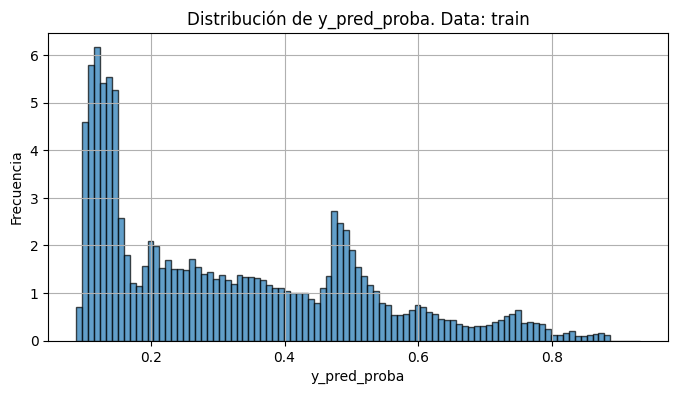

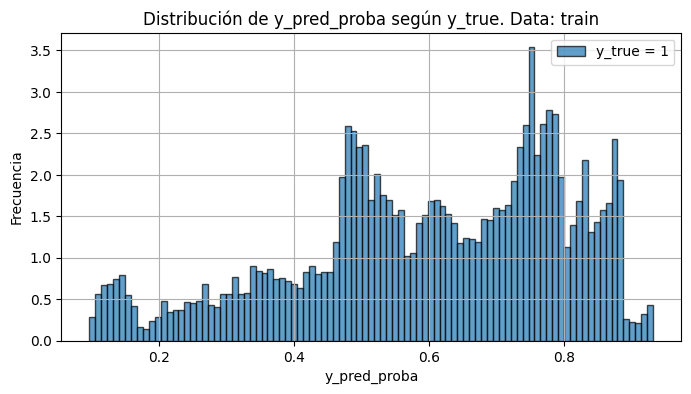

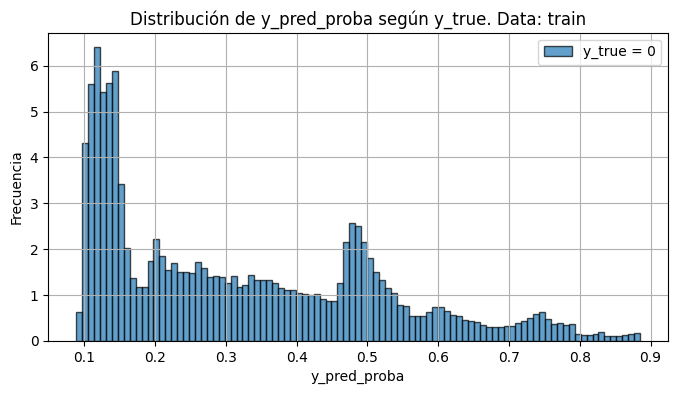

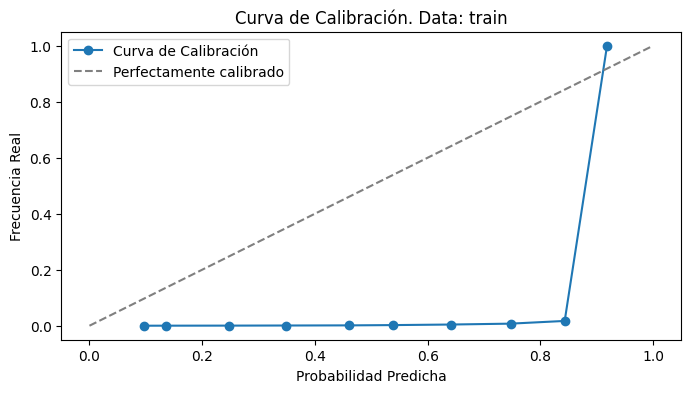

[01/13/25 19:50:26] INFO     TOP N: 1685586                                                           ]8;id=814261;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=126703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[01/13/25 19:50:28] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=551677;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=603454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#704\704]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=999132;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=884774;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#742\742]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=421419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=579710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#766\766]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71]                               

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=65899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=678833;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=50197;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=361758;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=220067;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=277653;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=596814;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=897648;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=970327;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=976103;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=634237;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=428344;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=574414;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=325549;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=492013;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=448504;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=817526;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=252524;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=556893;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=644660;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=390262;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=423055;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=716763;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=281697;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=40620;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=598878;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=85106;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=956594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/13/25 19:50:33] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=262299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=403849;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#704\704]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=89822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=262866;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#742\742]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=159190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=155772;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#766\766]8;;\
                             84, 83, 82, 81, 80, 79, 78]                                                           

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=632728;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=484672;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=58070;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=511269;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=128401;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=104861;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=547672;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=945878;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=399124;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=636021;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=636631;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=94198;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=646051;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=25847;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=784168;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=100135;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=467036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=999779;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.6s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    7.1s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   13.4s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:   16.8s finished


[01/13/25 19:50:52] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=459338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=385510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#704\704]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=994565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=485789;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#742\742]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=571193;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=70847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#766\766]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 74, 73, 72, 71, 65]                                   

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=427434;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=732305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=607907;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=334244;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=77356;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=537330;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=591813;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=968270;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=744832;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=314540;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=667069;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=671465;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=889261;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=846038;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=260989;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=188528;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=720781;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=991386;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=678891;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=250254;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=906473;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=37716;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=597745;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=477565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.6s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    7.0s
[Parallel(n_jobs=48)]: Done 450 out of 450 | elapsed:    8.7s finished


[01/13/25 19:51:02] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=506475;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=350728;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#704\704]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=997177;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=748648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#742\742]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=701404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=952173;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#766\766]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 74, 72, 71, 70, 65]                               

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=56256;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=888076;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=616522;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=430003;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=361021;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=651803;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=50942;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=443011;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=588174;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=535681;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=865867;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=465606;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=35804;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=859641;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=27085;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=288905;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=685856;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=400392;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/13/25 19:51:07] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=167330;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=262613;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#704\704]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=376117;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=971391;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#742\742]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=833778;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=774513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#766\766]8;;\
                             84, 83, 82, 81, 80, 79, 78]                                                           

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=686295;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=107289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=519496;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=201329;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=468621;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=393195;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=740963;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=281661;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=836546;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=257068;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=188404;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=698959;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=131914;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=914124;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=509977;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=442729;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=527470;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=711147;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=877001;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=2397;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=289241;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=387339;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=241028;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=976583;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.4s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    6.8s
[Parallel(n_jobs=48)]: Done 450 out of 450 | elapsed:    8.3s finished


[01/13/25 19:51:17] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=804594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=150302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#704\704]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=509843;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=788133;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#742\742]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=97477;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=663197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#766\766]8;;\
                             84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 73, 72, 68, 67]                               

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=200509;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=65985;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=973811;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=809820;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=34684;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=194604;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=956510;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=601828;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=671222;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=95954;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=431434;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=496059;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=420040;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=148634;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=714776;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=903447;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=542188;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=294161;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=107063;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=926256;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=39329;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=701767;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=297549;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=974114;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=390565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=874327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=897423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=689284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=408304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=777116;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=421324;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=379786;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/13/25 19:51:20] INFO     Update probs: Selected: 0, Target Select: 1685586, Diff %: -1.0           ]8;id=21890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=888215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/13/25 19:51:21] INFO     Update probs: Selected: 59099, Target Select: 1685586, Diff %:            ]8;id=103352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=203831;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649386029546995                                                                   

[01/13/25 19:51:22] INFO     Update probs: Selected: 118324, Target Select: 1685586, Diff %:           ]8;id=155439;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=671529;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298024544579748                                                                   

[01/13/25 19:51:23] INFO     Update probs: Selected: 177470, Target Select: 1685586, Diff %:           ]8;id=922184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=857539;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947131739347621                                                                   

[01/13/25 19:51:24] INFO     Update probs: Selected: 236593, Target Select: 1685586, Diff %:           ]8;id=90595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=622388;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596375385177618                                                                   

[01/13/25 19:51:25] INFO     Update probs: Selected: 295685, Target Select: 1685586, Diff %:           ]8;id=855276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=355087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245802943308737                                                                   

                    INFO     Update probs: Selected: 354864, Target Select: 1685586, Diff %:           ]8;id=590406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=314555;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894714360465737                                                                   

[01/13/25 19:51:26] INFO     Update probs: Selected: 414056, Target Select: 1685586, Diff %:           ]8;id=858353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=976441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543548653109364                                                                   

[01/13/25 19:51:27] INFO     Update probs: Selected: 473137, Target Select: 1685586, Diff %:           ]8;id=116877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=398502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193041470444107                                                                   

[01/13/25 19:51:28] INFO     Update probs: Selected: 532370, Target Select: 1685586, Diff %:           ]8;id=918140;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=355036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841632524237862                                                                   

[01/13/25 19:51:29] INFO     Update probs: Selected: 591521, Target Select: 1685586, Diff %:           ]8;id=785108;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=994274;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.649071005573136                                                                    

[01/13/25 19:51:30] INFO     Update probs: Selected: 650487, Target Select: 1685586, Diff %:           ]8;id=821432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=473738;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140885128376719                                                                   

[01/13/25 19:51:31] INFO     Update probs: Selected: 768964, Target Select: 1685586, Diff %:           ]8;id=921806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=629487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438001976760605                                                                   

[01/13/25 19:51:32] INFO     Update probs: Selected: 828110, Target Select: 1685586, Diff %:           ]8;id=689303;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=140613;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087109171528478                                                                   

[01/13/25 19:51:33] INFO     Update probs: Selected: 887473, Target Select: 1685586, Diff %:           ]8;id=492809;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=199527;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47349289801884925                                                                  

[01/13/25 19:51:34] INFO     Update probs: Selected: 946603, Target Select: 1685586, Diff %:           ]8;id=961848;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=70373;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4384131097434364                                                                   

[01/13/25 19:51:35] INFO     Update probs: Selected: 1005594, Target Select: 1685586, Diff %:          ]8;id=499570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=58118;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.403415785370785                                                                    

[01/13/25 19:51:36] INFO     Update probs: Selected: 1064864, Target Select: 1685586, Diff %:          ]8;id=551086;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=78359;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36825293992712327                                                                  

[01/13/25 19:51:37] INFO     Update probs: Selected: 1124070, Target Select: 1685586, Diff %:          ]8;id=215817;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=949439;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33312806347466106                                                                  

[01/13/25 19:51:38] INFO     Update probs: Selected: 1182992, Target Select: 1685586, Diff %:          ]8;id=503178;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=635016;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29817167442064657                                                                  

[01/13/25 19:51:39] INFO     Update probs: Selected: 1301227, Target Select: 1685586, Diff %:          ]8;id=283646;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=44692;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22802692950700826                                                                  

[01/13/25 19:51:40] INFO     Update probs: Selected: 1360376, Target Select: 1685586, Diff %:          ]8;id=305763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=481996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19293586918733308                                                                  

[01/13/25 19:51:41] INFO     Update probs: Selected: 1419835, Target Select: 1685586, Diff %:          ]8;id=241963;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=224750;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1576608965665353                                                                   

[01/13/25 19:51:42] INFO     Update probs: Selected: 1537899, Target Select: 1685586, Diff %:          ]8;id=326838;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=245231;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08761760005125814                                                                  

[01/13/25 19:51:43] INFO     Update probs: Selected: 1596809, Target Select: 1685586, Diff %:          ]8;id=486945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=798782;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052668330183093595                                                                 

[01/13/25 19:51:44] INFO     Update probs: Selected: 1685586, Target Select: 1685586, Diff %: 0.0      ]8;id=643038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=153465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=368434;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=584564;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=549058;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=504494;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_1,Run2. Weight: 1                                         ]8;id=49032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=999529;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/13/25 19:51:48] INFO     Update probs: Selected: 0, Target Select: 1685586, Diff %: -1.0           ]8;id=832015;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=340974;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/13/25 19:51:49] INFO     Update probs: Selected: 58435, Target Select: 1685586, Diff %:            ]8;id=802075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=572529;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9653325312383942                                                                   

[01/13/25 19:51:50] INFO     Update probs: Selected: 118174, Target Select: 1685586, Diff %:           ]8;id=695656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=274478;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298914442810987                                                                   

[01/13/25 19:51:51] INFO     Update probs: Selected: 177608, Target Select: 1685586, Diff %:           ]8;id=568722;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=402154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8946313032974882                                                                   

[01/13/25 19:51:52] INFO     Update probs: Selected: 236556, Target Select: 1685586, Diff %:           ]8;id=988320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=275415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596594893407989                                                                   

[01/13/25 19:51:53] INFO     Update probs: Selected: 295794, Target Select: 1685586, Diff %:           ]8;id=504070;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=506438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.824515628392737                                                                    

[01/13/25 19:51:54] INFO     Update probs: Selected: 354790, Target Select: 1685586, Diff %:           ]8;id=295255;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=121948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7895153376926481                                                                   

[01/13/25 19:51:55] INFO     Update probs: Selected: 414146, Target Select: 1685586, Diff %:           ]8;id=674005;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=326740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.754301471417062                                                                    

                    INFO     Update probs: Selected: 473266, Target Select: 1685586, Diff %:           ]8;id=525140;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=845284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192276157965242                                                                   

[01/13/25 19:51:56] INFO     Update probs: Selected: 532353, Target Select: 1685586, Diff %:           ]8;id=674023;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=160042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841733379370735                                                                   

[01/13/25 19:51:57] INFO     Update probs: Selected: 591332, Target Select: 1685586, Diff %:           ]8;id=788513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=140428;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491831327502721                                                                   

[01/13/25 19:51:58] INFO     Update probs: Selected: 650575, Target Select: 1685586, Diff %:           ]8;id=168408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=35809;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140363054747726                                                                   

[01/13/25 19:51:59] INFO     Update probs: Selected: 709645, Target Select: 1685586, Diff %:           ]8;id=779098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=752320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789921131286093                                                                   

[01/13/25 19:52:00] INFO     Update probs: Selected: 768943, Target Select: 1685586, Diff %:           ]8;id=251633;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=947341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438126562512978                                                                   

[01/13/25 19:52:01] INFO     Update probs: Selected: 828013, Target Select: 1685586, Diff %:           ]8;id=757336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=954208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087684639051345                                                                   

[01/13/25 19:52:02] INFO     Update probs: Selected: 887131, Target Select: 1685586, Diff %:           ]8;id=877618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=25470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47369579481557156                                                                  

[01/13/25 19:52:03] INFO     Update probs: Selected: 946189, Target Select: 1685586, Diff %:           ]8;id=859398;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=107938;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43865872165525815                                                                  

[01/13/25 19:52:04] INFO     Update probs: Selected: 1005365, Target Select: 1685586, Diff %:          ]8;id=499591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=705762;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4035516431674207                                                                   

[01/13/25 19:52:05] INFO     Update probs: Selected: 1064596, Target Select: 1685586, Diff %:          ]8;id=603201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=627747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36841193507777115                                                                  

[01/13/25 19:52:06] INFO     Update probs: Selected: 1123786, Target Select: 1685586, Diff %:          ]8;id=870218;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=491785;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33329655087310883                                                                  

[01/13/25 19:52:07] INFO     Update probs: Selected: 1182817, Target Select: 1685586, Diff %:          ]8;id=553812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=326207;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2982754958809577                                                                   

[01/13/25 19:52:08] INFO     Update probs: Selected: 1242074, Target Select: 1685586, Diff %:          ]8;id=953613;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=355496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2631203628886334                                                                   

[01/13/25 19:52:09] INFO     Update probs: Selected: 1360306, Target Select: 1685586, Diff %:          ]8;id=932250;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=336502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19297739777145753                                                                  

                    INFO     Update probs: Selected: 1419413, Target Select: 1685586, Diff %:          ]8;id=260899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=571980;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15791125460225702                                                                  

[01/13/25 19:52:10] INFO     Update probs: Selected: 1596988, Target Select: 1685586, Diff %:          ]8;id=682778;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=380783;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052562135660832496                                                                 

[01/13/25 19:52:11] INFO     Update probs: Selected: 1656169, Target Select: 1685586, Diff %:          ]8;id=420966;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=828132;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01745209084555757                                                                  

[01/13/25 19:52:12] INFO     Update probs: Selected: 1685586, Target Select: 1685586, Diff %: 0.0      ]8;id=324768;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=536634;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=643626;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=18488;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=631319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=524542;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_2,Run3. Weight: 1                                   ]8;id=627327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=397679;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.6s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    7.1s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   13.4s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:   16.8s finished


[01/13/25 19:52:30] INFO     Update probs: Selected: 0, Target Select: 1685586, Diff %: -1.0           ]8;id=663989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=255708;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/13/25 19:52:31] INFO     Update probs: Selected: 59124, Target Select: 1685586, Diff %:            ]8;id=893190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=548781;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649237713175122                                                                   

[01/13/25 19:52:32] INFO     Update probs: Selected: 118357, Target Select: 1685586, Diff %:           ]8;id=228107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=626243;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9297828766968876                                                                   

[01/13/25 19:52:33] INFO     Update probs: Selected: 177340, Target Select: 1685586, Diff %:           ]8;id=104575;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=632819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947902984481362                                                                   

[01/13/25 19:52:34] INFO     Update probs: Selected: 236500, Target Select: 1685586, Diff %:           ]8;id=646246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=634747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596927122080985                                                                   

[01/13/25 19:52:35] INFO     Update probs: Selected: 295653, Target Select: 1685586, Diff %:           ]8;id=202123;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=141024;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245992788264734                                                                   

[01/13/25 19:52:36] INFO     Update probs: Selected: 354885, Target Select: 1685586, Diff %:           ]8;id=777949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=261948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894589774713364                                                                   

[01/13/25 19:52:37] INFO     Update probs: Selected: 414013, Target Select: 1685586, Diff %:           ]8;id=463088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=699801;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543803757268985                                                                   

[01/13/25 19:52:38] INFO     Update probs: Selected: 473117, Target Select: 1685586, Diff %:           ]8;id=945088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=839420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193160123541605                                                                   

[01/13/25 19:52:39] INFO     Update probs: Selected: 591526, Target Select: 1685586, Diff %:           ]8;id=963394;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=430732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6490680392456986                                                                   

[01/13/25 19:52:40] INFO     Update probs: Selected: 650527, Target Select: 1685586, Diff %:           ]8;id=478964;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=447504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140647822181722                                                                   

[01/13/25 19:52:41] INFO     Update probs: Selected: 709821, Target Select: 1685586, Diff %:           ]8;id=617220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=318248;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5788876984028106                                                                   

[01/13/25 19:52:42] INFO     Update probs: Selected: 828093, Target Select: 1685586, Diff %:           ]8;id=349320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=718740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087210026661351                                                                   

[01/13/25 19:52:43] INFO     Update probs: Selected: 886694, Target Select: 1685586, Diff %:           ]8;id=840649;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=127675;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47395505183360565                                                                  

[01/13/25 19:52:44] INFO     Update probs: Selected: 945883, Target Select: 1685586, Diff %:           ]8;id=653228;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=163328;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4388402608944308                                                                   

[01/13/25 19:52:45] INFO     Update probs: Selected: 1005420, Target Select: 1685586, Diff %:          ]8;id=936425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=691222;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40351901356560865                                                                  

                    INFO     Update probs: Selected: 1064630, Target Select: 1685586, Diff %:          ]8;id=582668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=914929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36839176405119645                                                                  

[01/13/25 19:52:46] INFO     Update probs: Selected: 1123508, Target Select: 1685586, Diff %:          ]8;id=576484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=457093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33346147867863163                                                                  

[01/13/25 19:52:47] INFO     Update probs: Selected: 1182690, Target Select: 1685586, Diff %:          ]8;id=497659;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=51998;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2983508405978692                                                                   

[01/13/25 19:52:48] INFO     Update probs: Selected: 1241390, Target Select: 1685586, Diff %:          ]8;id=212329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=227360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26352615648207806                                                                  

[01/13/25 19:52:49] INFO     Update probs: Selected: 1301043, Target Select: 1685586, Diff %:          ]8;id=676956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=421988;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22813609035670682                                                                  

[01/13/25 19:52:50] INFO     Update probs: Selected: 1419815, Target Select: 1685586, Diff %:          ]8;id=224314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=738441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15767276187628515                                                                  

[01/13/25 19:52:51] INFO     Update probs: Selected: 1537297, Target Select: 1685586, Diff %:          ]8;id=681903;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=989710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08797474587472844                                                                  

[01/13/25 19:52:52] INFO     Update probs: Selected: 1596602, Target Select: 1685586, Diff %:          ]8;id=633064;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=103058;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05279113613900448                                                                  

[01/13/25 19:52:53] INFO     Update probs: Selected: 1655990, Target Select: 1685586, Diff %:          ]8;id=785436;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=734217;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01755828536781867                                                                  

[01/13/25 19:52:54] INFO     Update probs: Selected: 1685586, Target Select: 1685586, Diff %: 0.0      ]8;id=420731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=901819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=81189;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=121909;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=696834;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=930095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_5,Run6. Weight: 1                                   ]8;id=913512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=28415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.6s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    7.1s
[Parallel(n_jobs=48)]: Done 450 out of 450 | elapsed:    8.7s finished


[01/13/25 19:53:04] INFO     Update probs: Selected: 0, Target Select: 1685586, Diff %: -1.0           ]8;id=308290;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=617857;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/13/25 19:53:05] INFO     Update probs: Selected: 59163, Target Select: 1685586, Diff %:            ]8;id=688460;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=458978;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649006339634999                                                                   

[01/13/25 19:53:06] INFO     Update probs: Selected: 118344, Target Select: 1685586, Diff %:           ]8;id=595721;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=168336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.929790589148225                                                                    

[01/13/25 19:53:07] INFO     Update probs: Selected: 177466, Target Select: 1685586, Diff %:           ]8;id=837812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=271794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947155469967121                                                                   

[01/13/25 19:53:08] INFO     Update probs: Selected: 236625, Target Select: 1685586, Diff %:           ]8;id=29946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=659087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.859618554022162                                                                    

[01/13/25 19:53:09] INFO     Update probs: Selected: 354762, Target Select: 1685586, Diff %:           ]8;id=678634;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=184811;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7895319491262979                                                                   

[01/13/25 19:53:10] INFO     Update probs: Selected: 414023, Target Select: 1685586, Diff %:           ]8;id=627692;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=777915;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543744430720236                                                                   

[01/13/25 19:53:11] INFO     Update probs: Selected: 473142, Target Select: 1685586, Diff %:           ]8;id=533830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=72639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193011807169732                                                                   

[01/13/25 19:53:12] INFO     Update probs: Selected: 532140, Target Select: 1685586, Diff %:           ]8;id=244131;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=157032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842997034859094                                                                   

[01/13/25 19:53:13] INFO     Update probs: Selected: 591358, Target Select: 1685586, Diff %:           ]8;id=410849;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=272689;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491677078475973                                                                   

[01/13/25 19:53:14] INFO     Update probs: Selected: 650544, Target Select: 1685586, Diff %:           ]8;id=760463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=100943;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140546967048849                                                                   

[01/13/25 19:53:15] INFO     Update probs: Selected: 709821, Target Select: 1685586, Diff %:           ]8;id=367343;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=577398;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5788876984028106                                                                   

[01/13/25 19:53:16] INFO     Update probs: Selected: 768922, Target Select: 1685586, Diff %:           ]8;id=622293;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=206168;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438251148265351                                                                   

[01/13/25 19:53:17] INFO     Update probs: Selected: 828050, Target Select: 1685586, Diff %:           ]8;id=903774;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=176940;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087465130820973                                                                   

[01/13/25 19:53:18] INFO     Update probs: Selected: 887048, Target Select: 1685586, Diff %:           ]8;id=866577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=983316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4737450358510334                                                                   

[01/13/25 19:53:19] INFO     Update probs: Selected: 946559, Target Select: 1685586, Diff %:           ]8;id=516354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=785546;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43843921342488607                                                                  

[01/13/25 19:53:20] INFO     Update probs: Selected: 1005612, Target Select: 1685586, Diff %:          ]8;id=804804;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=370354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4034051065920101                                                                   

[01/13/25 19:53:21] INFO     Update probs: Selected: 1064214, Target Select: 1685586, Diff %:          ]8;id=672351;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=521830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3686385624939932                                                                   

                    INFO     Update probs: Selected: 1124087, Target Select: 1685586, Diff %:          ]8;id=33101;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=116992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33311797796137366                                                                  

[01/13/25 19:53:22] INFO     Update probs: Selected: 1183161, Target Select: 1685586, Diff %:          ]8;id=792364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=558657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2980714125532604                                                                   

[01/13/25 19:53:23] INFO     Update probs: Selected: 1241983, Target Select: 1685586, Diff %:          ]8;id=341011;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=199221;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26317435004799516                                                                  

[01/13/25 19:53:24] INFO     Update probs: Selected: 1300852, Target Select: 1685586, Diff %:          ]8;id=611955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=667979;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2282494040648178                                                                   

[01/13/25 19:53:25] INFO     Update probs: Selected: 1360097, Target Select: 1685586, Diff %:          ]8;id=763783;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=331255;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19310139025834339                                                                  

[01/13/25 19:53:26] INFO     Update probs: Selected: 1478057, Target Select: 1685586, Diff %:          ]8;id=353527;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=885589;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1231197933537654                                                                   

[01/13/25 19:53:27] INFO     Update probs: Selected: 1538141, Target Select: 1685586, Diff %:          ]8;id=739555;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=583620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08747402980328503                                                                  

[01/13/25 19:53:28] INFO     Update probs: Selected: 1685586, Target Select: 1685586, Diff %: 0.0      ]8;id=177059;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=620477;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=212098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=952567;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/13/25 19:53:29] INFO     ------------------------------------------------------                    ]8;id=880742;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=508947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_7,Run8. Weight: 1                                         ]8;id=559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=322776;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/13/25 19:53:33] INFO     Update probs: Selected: 0, Target Select: 1685586, Diff %: -1.0           ]8;id=131746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=886681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/13/25 19:53:34] INFO     Update probs: Selected: 59991, Target Select: 1685586, Diff %:            ]8;id=913289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=416790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9644094101398564                                                                   

[01/13/25 19:53:35] INFO     Update probs: Selected: 118323, Target Select: 1685586, Diff %:           ]8;id=340038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=365107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298030477234623                                                                   

[01/13/25 19:53:36] INFO     Update probs: Selected: 177477, Target Select: 1685586, Diff %:           ]8;id=793616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=150809;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947090210763498                                                                   

[01/13/25 19:53:37] INFO     Update probs: Selected: 236876, Target Select: 1685586, Diff %:           ]8;id=133889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=363705;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8594696443848014                                                                   

[01/13/25 19:53:38] INFO     Update probs: Selected: 295525, Target Select: 1685586, Diff %:           ]8;id=325302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=239579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8246752168088725                                                                   

[01/13/25 19:53:39] INFO     Update probs: Selected: 354695, Target Select: 1685586, Diff %:           ]8;id=25965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=413189;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7895716979139599                                                                   

[01/13/25 19:53:40] INFO     Update probs: Selected: 414194, Target Select: 1685586, Diff %:           ]8;id=484052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=764530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7542729946736625                                                                   

[01/13/25 19:53:41] INFO     Update probs: Selected: 473163, Target Select: 1685586, Diff %:           ]8;id=727567;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=60640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192887221417359                                                                   

[01/13/25 19:53:42] INFO     Update probs: Selected: 532156, Target Select: 1685586, Diff %:           ]8;id=791194;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=217297;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842902112381095                                                                   

[01/13/25 19:53:43] INFO     Update probs: Selected: 591483, Target Select: 1685586, Diff %:           ]8;id=386481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=932718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6490935496616607                                                                   

[01/13/25 19:53:44] INFO     Update probs: Selected: 650598, Target Select: 1685586, Diff %:           ]8;id=221468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=805671;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140226603685602                                                                   

                    INFO     Update probs: Selected: 709626, Target Select: 1685586, Diff %:           ]8;id=17481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=461022;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5790033851728716                                                                   

[01/13/25 19:53:45] INFO     Update probs: Selected: 768810, Target Select: 1685586, Diff %:           ]8;id=344794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=745405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438915605611342                                                                   

[01/13/25 19:53:46] INFO     Update probs: Selected: 827989, Target Select: 1685586, Diff %:           ]8;id=530527;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=185656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087827022768343                                                                   

[01/13/25 19:53:47] INFO     Update probs: Selected: 887175, Target Select: 1685586, Diff %:           ]8;id=120844;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=86030;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4736696911341219                                                                   

[01/13/25 19:53:48] INFO     Update probs: Selected: 946334, Target Select: 1685586, Diff %:           ]8;id=64508;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=693965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4385726981595718                                                                   

[01/13/25 19:53:49] INFO     Update probs: Selected: 1005496, Target Select: 1685586, Diff %:          ]8;id=967329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=326391;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40347392538855925                                                                  

[01/13/25 19:53:50] INFO     Update probs: Selected: 1064489, Target Select: 1685586, Diff %:          ]8;id=706724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=317912;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3684754144849328                                                                   

[01/13/25 19:53:51] INFO     Update probs: Selected: 1123664, Target Select: 1685586, Diff %:          ]8;id=856430;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=662498;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3333689292625829                                                                   

[01/13/25 19:53:52] INFO     Update probs: Selected: 1182911, Target Select: 1685586, Diff %:          ]8;id=410563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=893745;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29821972892513343                                                                  

[01/13/25 19:53:53] INFO     Update probs: Selected: 1242014, Target Select: 1685586, Diff %:          ]8;id=153412;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=100959;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2631559588178829                                                                   

[01/13/25 19:53:54] INFO     Update probs: Selected: 1301211, Target Select: 1685586, Diff %:          ]8;id=817977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=409042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22803642175480812                                                                  

[01/13/25 19:53:55] INFO     Update probs: Selected: 1419364, Target Select: 1685586, Diff %:          ]8;id=488909;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=180446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15794032461114413                                                                  

[01/13/25 19:53:56] INFO     Update probs: Selected: 1537725, Target Select: 1685586, Diff %:          ]8;id=460813;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=118033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08772082824608178                                                                  

[01/13/25 19:53:57] INFO     Update probs: Selected: 1596938, Target Select: 1685586, Diff %:          ]8;id=927012;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=938002;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0525917989352071                                                                   

[01/13/25 19:53:58] INFO     Update probs: Selected: 1656122, Target Select: 1685586, Diff %:          ]8;id=616720;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=45365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0174799743234697                                                                   

                    INFO     Update probs: Selected: 1685586, Target Select: 1685586, Diff %: 0.0      ]8;id=149113;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=701178;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=723397;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=224615;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/13/25 19:53:59] INFO     ------------------------------------------------------                    ]8;id=117426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=485002;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_8,Run9. Weight: 1                                   ]8;id=135587;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=489121;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.5s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    6.7s
[Parallel(n_jobs=48)]: Done 450 out of 450 | elapsed:    8.3s finished


[01/13/25 19:54:08] INFO     Update probs: Selected: 0, Target Select: 1685586, Diff %: -1.0           ]8;id=472952;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=676619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/13/25 19:54:09] INFO     Update probs: Selected: 59112, Target Select: 1685586, Diff %:            ]8;id=495203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=643191;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.964930890503362                                                                    

[01/13/25 19:54:10] INFO     Update probs: Selected: 118366, Target Select: 1685586, Diff %:           ]8;id=713813;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=325945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9297775373075002                                                                   

[01/13/25 19:54:11] INFO     Update probs: Selected: 177307, Target Select: 1685586, Diff %:           ]8;id=670686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=828722;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8948098762092234                                                                   

[01/13/25 19:54:12] INFO     Update probs: Selected: 295678, Target Select: 1685586, Diff %:           ]8;id=811819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=644987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245844471892861                                                                   

[01/13/25 19:54:13] INFO     Update probs: Selected: 354911, Target Select: 1685586, Diff %:           ]8;id=344107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=305697;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894435525686616                                                                   

[01/13/25 19:54:14] INFO     Update probs: Selected: 413934, Target Select: 1685586, Diff %:           ]8;id=639902;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=206684;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544272437004104                                                                   

[01/13/25 19:54:15] INFO     Update probs: Selected: 473094, Target Select: 1685586, Diff %:           ]8;id=650720;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=180784;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193296574603728                                                                   

[01/13/25 19:54:16] INFO     Update probs: Selected: 532355, Target Select: 1685586, Diff %:           ]8;id=502754;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=953838;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841721514060985                                                                   

[01/13/25 19:54:17] INFO     Update probs: Selected: 650527, Target Select: 1685586, Diff %:           ]8;id=464651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=260535;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140647822181722                                                                   

[01/13/25 19:54:18] INFO     Update probs: Selected: 709552, Target Select: 1685586, Diff %:           ]8;id=243655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=704622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.579047286818946                                                                    

[01/13/25 19:54:19] INFO     Update probs: Selected: 768892, Target Select: 1685586, Diff %:           ]8;id=465961;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=195858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438429127911598                                                                   

[01/13/25 19:54:20] INFO     Update probs: Selected: 828389, Target Select: 1685586, Diff %:           ]8;id=663800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=472469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5085453960818375                                                                   

[01/13/25 19:54:21] INFO     Update probs: Selected: 887005, Target Select: 1685586, Diff %:           ]8;id=409457;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=581970;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47377054626699555                                                                  

[01/13/25 19:54:22] INFO     Update probs: Selected: 945806, Target Select: 1685586, Diff %:           ]8;id=347735;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=209401;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4388859423369677                                                                   

[01/13/25 19:54:23] INFO     Update probs: Selected: 1005641, Target Select: 1685586, Diff %:          ]8;id=586217;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=351775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4033879018928729                                                                   

[01/13/25 19:54:24] INFO     Update probs: Selected: 1124081, Target Select: 1685586, Diff %:          ]8;id=713586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=286202;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33312153755429863                                                                  

[01/13/25 19:54:25] INFO     Update probs: Selected: 1183471, Target Select: 1685586, Diff %:          ]8;id=896858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=255047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29788750025213784                                                                  

[01/13/25 19:54:26] INFO     Update probs: Selected: 1241954, Target Select: 1685586, Diff %:          ]8;id=440415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=395526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26319155474713246                                                                  

[01/13/25 19:54:27] INFO     Update probs: Selected: 1300706, Target Select: 1685586, Diff %:          ]8;id=79880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=49369;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22833602082599166                                                                  

[01/13/25 19:54:28] INFO     Update probs: Selected: 1419531, Target Select: 1685586, Diff %:          ]8;id=477879;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=740015;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15784124927473295                                                                  

[01/13/25 19:54:29] INFO     Update probs: Selected: 1537701, Target Select: 1685586, Diff %:          ]8;id=200475;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=807458;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08773506661778159                                                                  

[01/13/25 19:54:30] INFO     Update probs: Selected: 1656083, Target Select: 1685586, Diff %:          ]8;id=362329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=996862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017503111677481895                                                                 

[01/13/25 19:54:31] INFO     Update probs: Selected: 1685586, Target Select: 1685586, Diff %: 0.0      ]8;id=924334;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=731834;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=602249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=900414;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     Iniciando sistema de votaciones..                                         ]8;id=245933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=865095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

[01/13/25 19:54:33] INFO     Ok Sistema de votaciones                                                  ]8;id=453180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=195333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

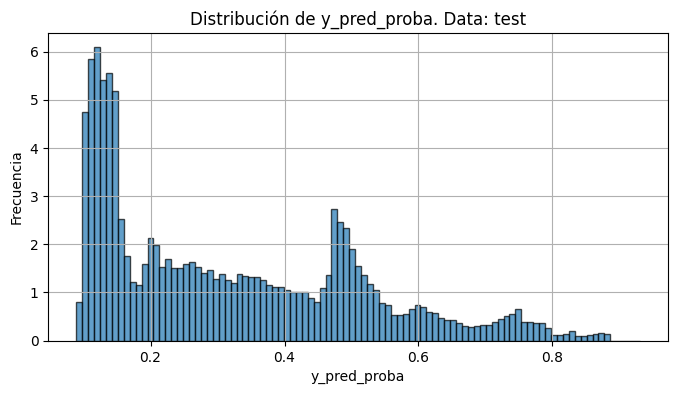

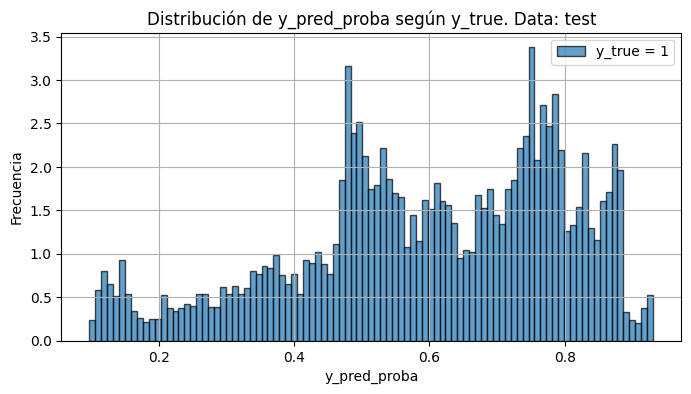

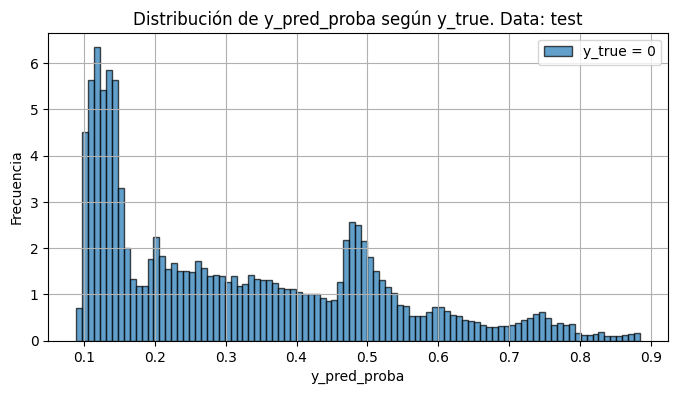

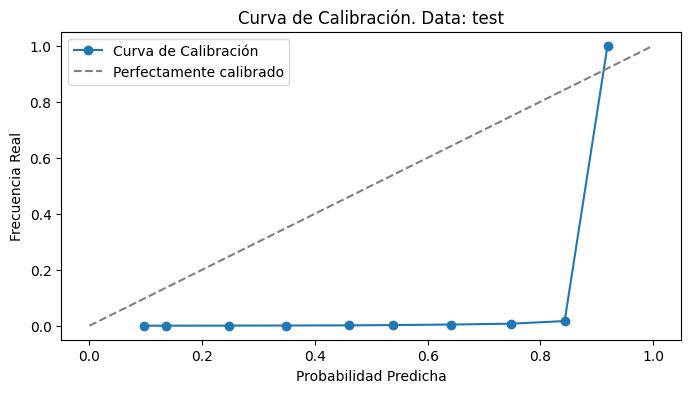

value          name_model model_name  \
class_name metric_name    dataset_name                                          
1          f1-score n_top test          0.7611  [0, 1, 2, 5, 7, 8]   Ensamble   
           true_sum n_top test            6439  [0, 1, 2, 5, 7, 8]   Ensamble   
           backtest       test           0.382  [0, 1, 2, 5, 7, 8]   Ensamble   

                                             select_model  
class_name metric_name    dataset_name                     
1          f1-score n_top test          modelo_produccion  
           true_sum n_top test          modelo_produccion  
           backtest       test          modelo_produccion

In [19]:
info_save2=ms.calc_metrics_before_backtesting(info_save_all, info_save_temp,params)

In [ ]:
# con eda
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_cientifico = check_df_cientifico[check_df_cientifico['class_name'].isin([1,1.0,'1','1.0'])]
check_df_cientifico = check_df_cientifico.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_cientifico

In [20]:
# sin eda
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_cientifico = check_df_cientifico[check_df_cientifico['class_name'].isin([1,1.0,'1','1.0'])]
check_df_cientifico = check_df_cientifico.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_cientifico

metric_name  \
select_model        name_model         dataset_name class_name               
best_fitting_model  Run12              test         1             backtest   
                                       train        1             backtest   
best_model_name     Run3               test         1             backtest   
                                       train        1             backtest   
best_unbiased_model Run3               test         1             backtest   
                                       train        1             backtest   
modelo_produccion   [0, 1, 2, 5, 7, 8] test         1             backtest   
                                       train        1             backtest   

                                                                 value  \
select_model        name_model         dataset_name class_name           
best_fitting_model  Run12              test         1           0.3488   
                                       train        1           0.3478   
best_model_name     Run3               test         1           0.3577   
                                       train        1           0.3572   
best_unbiased_model Run3               test         1           0.3577   
                                       train        1           0.3572   
modelo_produccion   [0, 1, 2, 5, 7, 8] test         1            0.382   
                                       train        1           0.4272   

                                                                      model_name  
select_model        name_model         dataset_name class_name                    
best_fitting_model  Run12              test         1           random_forest_11  
                                       train        1           random_forest_11  
best_model_name     Run3               test         1            random_forest_2  
                                       train        1            random_forest_2  
best_unbiased_model Run3               test         1            random_forest_2  
                                       train        1            random_forest_2  
modelo_produccion   [0, 1, 2, 5, 7, 8] test         1                   Ensamble  
                                       train        1                   Ensamble

In [21]:
# ks en uno de los modeos del ensamble
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_train'].head())
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_test'].head())

prob_min  prob_max  tasa_aperturas
0     95.70    100.00            1.52
1     92.03     95.70            1.22
2     88.45     92.03            0.95
3     84.90     88.45            0.75
4     81.39     84.90            0.63

prob_min  prob_max  tasa_aperturas
0     95.70    100.00            1.38
1     92.03     95.70            1.10
2     88.45     92.03            0.88
3     84.90     88.45            0.71
4     81.38     84.90            0.56

# optimizar ensamblado

In [22]:
train = info_save2['Votaciones']['train']
train2 = train.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_train = ~train.index.isin(train2.index.tolist())
drops = train.index[index_train]
train.shape

test = info_save2['Votaciones']['test']
test2 = test.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_test = ~test.index.isin(test2.index.tolist())
drops2 = test.index[index_test]
#test.index = list(range(test.shape[0]))
test.shape

(5618623, 7)

In [23]:
best_probs = params['n_obs_filter']
best_probs = 0.2
import itertools
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
def calcular_metricas(itter,best_probs = best_probs):
    res = results[itter]
    total_count = res.shape[0]
    selected = res.nlargest(int(total_count * best_probs)).index
    return itter, y_true['y'][selected].sum()  # o la métrica que necesites

In [25]:
mejor_test_dado_mejores_train = True
ignore_train = False
first_loop = True

In [64]:
mejor_test_dado_mejores_train = True
ignore_train = False
first_loop = False

In [34]:
mejor_test_dado_mejores_train = False
ignore_train = True
first_loop = True

In [35]:
# Obtener el número de núcleos disponibles
timing = time.time()
num_nucleos = int(cpu_count()/2) # Puedes ajustar este número según sea necesario
msj = ['Train Data','Test Data']
lopps_df = [train,test]
nulls = [drops,drops2]
if ignore_train == True:
    msj = ["test Data"]
    lopps_df = [test]
    nulls = [drops2]
df_model_unic = pd.DataFrame()

for t,df_select in enumerate(lopps_df):
    y_true = df_select[['y']]
    tot = int(y_true.shape[0]*best_probs)
    print("N TOP",tot,".EMPEZAMOS: ",msj[t])
    dropping = nulls[t]
    df_select = df_select.drop('y', axis = 1).drop(dropping, axis = 0)

    if t == 0:
        n = df_select.shape[1]
        # Lista de elementos
        modelos = list(range(0,min(n,3),1)) # el algoritmo se ponderara son con 3 discriminaciones
        # Obtener todas las combinaciones de 2 elementos
        combinaciones = list(itertools.product(modelos, repeat = n))
        combinaciones = pd.DataFrame(combinaciones, columns = df_select.columns.tolist())
        weights = combinaciones.div(combinaciones.sum(axis=1), axis=0).dropna(how = 'all')
        modelos_unicos = []
        for i in range(n):
            filt = combinaciones[combinaciones[combinaciones.columns[i]] == 1]
            filt = filt.drop(combinaciones.columns[i], axis = 1)
            filt = filt.loc[(filt == 0).all(axis=1)]
            modelos_unicos.append(filt.index[0])
        weights_unicos = weights.loc[modelos_unicos]
        weights = weights.drop_duplicates()
    else:
        if mejor_test_dado_mejores_train == True:
            weights = weights.loc[best_iter_w.index.tolist()+modelos_unicos]
        else:
            pass
        #results_train = results.copy()
    logger.info(f"Numero de iteraciones: {weights.shape[0]}. {msj[t]}")
    #results = df_select @ weights.T # observaciones x iteraciones
    results = df_select.astype(np.float32).values @ weights.astype(np.float32).T.values
    results = pd.DataFrame(results, index = df_select.index, columns = weights.T.columns)
    nulos_temp =pd.DataFrame(np.zeros((dropping.shape[0],weights.shape[0])),index = dropping, columns = results.columns)
    results = pd.concat([results,nulos_temp], axis = 0)
    results = results.loc[y_true.index]
    # Usar Pool para paralelizar
    if __name__ == '__main__':
        with Pool(processes=num_nucleos) as pool:  # Especificar el número de núcleos
            resultados = pool.map(calcular_metricas, results.columns)
    
        # Convertir los resultados a un DataFrame
        epochs = pd.DataFrame(resultados, columns=['Iteracion', 'Valor'])
        epochs.set_index('Iteracion', inplace=True)

    maxi_true = epochs['Valor'].max()
    best_iter_w = epochs[epochs['Valor'] == maxi_true]
    trues = y_true['y'].sum()
    logger.info(f"TP: {maxi_true}. True: {trues}. Tasa de Exito: {np.round(maxi_true/tot*100,4)}%. Usando {best_probs} deciles para {msj[t]}")
    if best_iter_w.shape[0] == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}. {msj[t]}")
        print('------------------------')        
        break
    if t == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}. {msj[t]}")
        print('------------------------')
    if first_loop == True:
        break
minutess = (time.time() - timing) /60
hrs = math.floor(minutess / 60)
minutes = minutess - hrs * 60
logger.info(f"Hrs: {hrs}. Min {minutes}")
epochs.shape

N TOP 1123724 .EMPEZAMOS:  test Data


[01/13/25 20:19:31] INFO     Numero de iteraciones: 665. test Data                                 ]8;id=353997;file:///tmp/ipykernel_2367/3713006134.py\3713006134.py]8;;\:]8;id=668475;file:///tmp/ipykernel_2367/3713006134.py#42\42]8;;\

[01/13/25 20:20:28] INFO     TP: 6177.0. True: 7393.0. Tasa de Exito: 0.5497%. Usando 0.2 deciles  ]8;id=232463;file:///tmp/ipykernel_2367/3713006134.py\3713006134.py]8;;\:]8;id=368047;file:///tmp/ipykernel_2367/3713006134.py#61\61]8;;\
                             para test Data                                                                        

                    INFO     Numero de Iteraciones Finales: 1. test Data                           ]8;id=904156;file:///tmp/ipykernel_2367/3713006134.py\3713006134.py]8;;\:]8;id=692614;file:///tmp/ipykernel_2367/3713006134.py#63\63]8;;\

------------------------


                    INFO     Hrs: 0. Min 0.9474954565366109                                        ]8;id=624795;file:///tmp/ipykernel_2367/3713006134.py\3713006134.py]8;;\:]8;id=790533;file:///tmp/ipykernel_2367/3713006134.py#74\74]8;;\

(665, 1)

In [39]:
print(mejor_test_dado_mejores_train)
print(ignore_train)
print(first_loop)

False
True
True


In [40]:
epochs_select = (epochs.loc[modelos_unicos]/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_unico = epochs_select.index[0]
print("Mejor modelo Unico")
display(combinaciones.loc[[mejor_unico]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select)
print("Cominaciones e ietraciones de modelos unicos")
display(combinaciones.loc[modelos_unicos])
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_unico,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_unico,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_unico,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

Mejor modelo Unico


Run1  Run2  Run3  Run6  Run8  Run9
81     0     1     0     0     0     0

% TP en n_filt_obs de los modelos individuales o unicos ejecutados


Valor
Iteracion        
81         0.5398
3          0.5372
9          0.4710
27         0.4679
243        0.4582
1          0.4493

Cominaciones e ietraciones de modelos unicos


Run1  Run2  Run3  Run6  Run8  Run9
243     1     0     0     0     0     0
81      0     1     0     0     0     0
27      0     0     1     0     0     0
9       0     0     0     1     0     0
3       0     0     0     0     1     0
1       0     0     0     0     0     1

Decil 1:  (81, 0.8869)
Decil 2:  (81, 0.5398)
Decil 3:  (81, 0.3879)


In [41]:
epochs_select = (epochs/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_combinado = epochs_select.index[0]
print("Mejor modelo Iteraciones")
display(combinaciones.loc[[mejor_combinado]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select.head())
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_combinado,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_combinado,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_combinado,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

Mejor modelo Iteraciones


Run1  Run2  Run3  Run6  Run8  Run9
411     1     2     0     0     2     0

% TP en n_filt_obs de los modelos individuales o unicos ejecutados


Valor
Iteracion        
411        0.5497
177        0.5493
169        0.5492
195        0.5489
408        0.5487

Decil 1:  (411, 0.9)
Decil 2:  (411, 0.5497)
Decil 3:  (411, 0.394)


In [42]:
iterr = [411,177,169,195,408] # test best in test
iterr2 = iterr # test best in train
iterr3 = [84,165,87,81,3] # train best in test
iterr4 = iterr3 # train best in train

In [73]:
# sin eda
# test best in test
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

Run1  Run2  Run3  Run6  Run8  Run9
411     1     2     0     0     2     0
177     0     2     0     1     2     0
169     0     2     0     0     2     1
195     0     2     1     0     2     0
408     1     2     0     0     1     0

Valor
Iteracion        
411        0.5497
177        0.5493
169        0.5492
195        0.5489
408        0.5487

In [ ]:
# sin eda
# test best in train
display(combinaciones.loc[iterr2])
display(epochs_select.loc[iterr2])

In [51]:
# sin eda
# train best in test
display(combinaciones.loc[iterr3])
display(epochs_select.loc[iterr3])

Run1  Run2  Run3  Run6  Run8  Run9
84      0     1     0     0     1     0
165     0     2     0     0     1     0
87      0     1     0     0     2     0
81      0     1     0     0     0     0
3       0     0     0     0     1     0

Valor
Iteracion        
84         0.5481
165        0.5479
87         0.5468
81         0.5398
3          0.5372

In [62]:
# sin eda
# train best in train
display(combinaciones.loc[iterr4])
display(epochs_select.loc[iterr4])

Run1  Run2  Run3  Run6  Run8  Run9
84      0     1     0     0     1     0
165     0     2     0     0     1     0
87      0     1     0     0     2     0
81      0     1     0     0     0     0
3       0     0     0     0     1     0

Valor
Iteracion        
84         0.6570
165        0.6570
87         0.6570
81         0.6569
3          0.6566

In [ ]:
# con eda
iterr = [81,171,163] # test best in test
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

In [ ]:
# con eda
iterr2 = [81,171,163] # test best in train
display(combinaciones.loc[iterr2])
display(epochs_select.loc[iterr2])

In [ ]:
# con eda
iterr3 = [81,171,163] # train best in test
display(combinaciones.loc[iterr3])
display(epochs_select.loc[iterr3])

In [ ]:
# con eda
iterr4 = [81,171,163] # train best in train
display(combinaciones.loc[iterr4])
display(epochs_select.loc[iterr4])

In [43]:
combinaciones_interes = list(set([mejor_unico]+iterr+iterr2+iterr3+iterr4))
rangos = sorted(list(set([params['n_obs_filter'],0.01,0.05,0.1,0.2,0.3,0.5])))
print('Iteracion: ',combinaciones_interes)
print('Calling: ',rangos)

Iteracion:  [195, 3, 165, 169, 177, 81, 84, 87, 408, 411]
Calling:  [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]


In [33]:
# sin eda train
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
summary

0.01    0.05    0.10    0.20    0.30    0.50
Iteraccion                                                
195         0.5673  1.1633  1.2823  1.3050  1.3082  1.3144
3           0.5007  1.1995  1.3065  1.3132  1.3136  1.3144
165         0.5655  1.1912  1.3006  1.3140  1.3142  1.3148
169         0.5691  1.1646  1.2823  1.3053  1.3075  1.3143
177         0.5679  1.1632  1.2823  1.3050  1.3083  1.3144
81          0.5260  1.2070  1.3056  1.3138  1.3140  1.3148
84          0.5787  1.1904  1.3006  1.3140  1.3142  1.3148
87          0.5617  1.1893  1.3007  1.3140  1.3142  1.3148
408         0.5537  1.1585  1.2747  1.3006  1.3067  1.3144
411         0.5699  1.1636  1.2804  1.3037  1.3084  1.3144

In [44]:
# sin eda test
summary_test = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary_test.loc[mejor_combinado,nodo] = res1234
summary_test.index.name = 'Iteraccion'
summary_test

0.01    0.05    0.10    0.20    0.30    0.50
Iteraccion                                                
195         0.3216  0.6799  0.9032  1.0978  1.1813  1.2494
3           0.3156  0.6623  0.8742  1.0745  1.1706  1.2074
165         0.3197  0.6833  0.9008  1.0958  1.1764  1.2336
169         0.3213  0.6790  0.9027  1.0983  1.1784  1.2500
177         0.3216  0.6776  0.9050  1.0987  1.1796  1.2500
81          0.3134  0.6671  0.8869  1.0796  1.1636  1.2051
84          0.3216  0.6852  0.9020  1.0962  1.1795  1.2336
87          0.3216  0.6815  0.8999  1.0935  1.1804  1.2336
408         0.3189  0.6761  0.8945  1.0974  1.1814  1.2516
411         0.3209  0.6818  0.9000  1.0994  1.1821  1.2516

In [ ]:
# con eda
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
summary

In [ ]:
# con eda test
summary_test = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary_test.loc[mejor_combinado,nodo] = res1234
summary_test.index.name = 'Iteraccion'
summary_test

<Axes: ylabel='Iteraccion'>

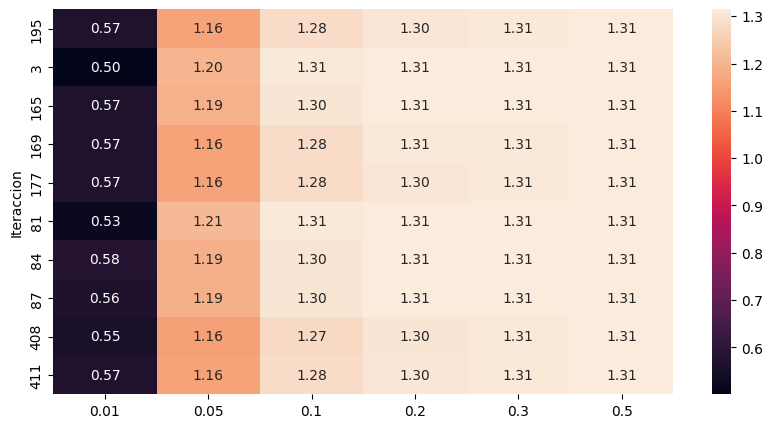

In [45]:
# sin eda train
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

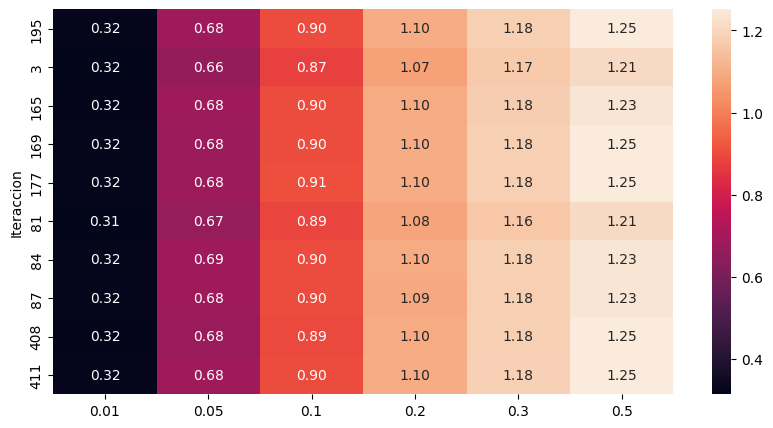

In [46]:
# sin eda test
plt.figure(figsize = (10,5))
sns.heatmap(summary_test, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

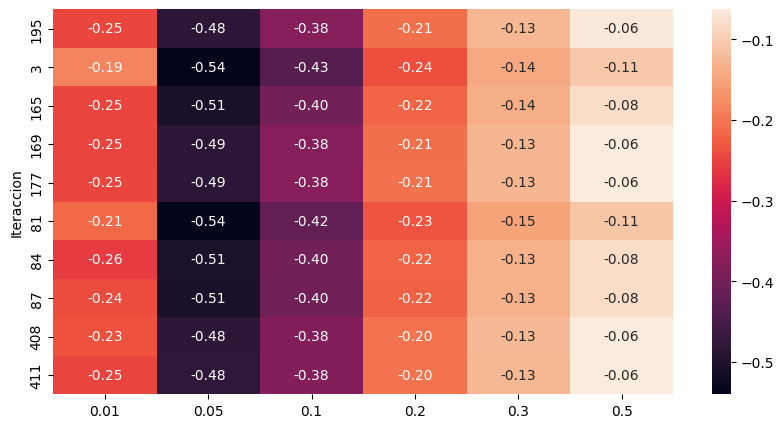

In [47]:
# sin eda test vs train
plt.figure(figsize = (10,5))
sns.heatmap(summary_test-summary, annot=True,  fmt=".2f")

In [ ]:
# con eda
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

In [ ]:
# con eda test
plt.figure(figsize = (10,5))
sns.heatmap(summary_test, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

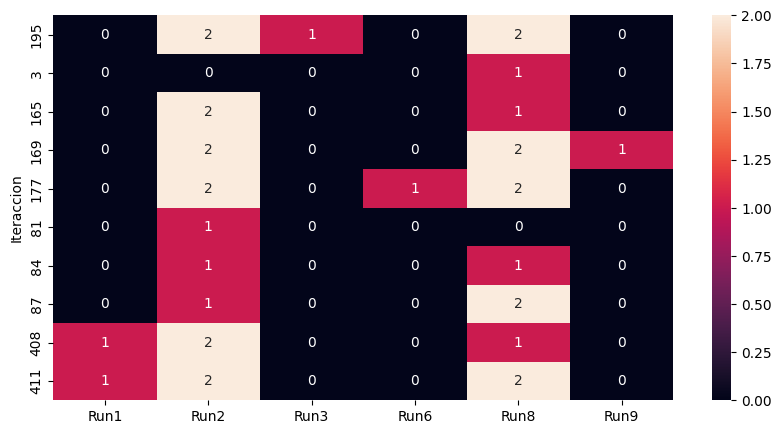

In [48]:
# sin eda
plt.figure(figsize = (10,5)) # mejor modelo 177
sns.heatmap(combinaciones.loc[summary.index],annot=True)

In [ ]:
# con eda
plt.figure(figsize = (10,5))
sns.heatmap(combinaciones.loc[summary.index],annot=True)

In [12]:
# mejor modelo
check_df

value  \
metric_name     dataset_name class_name select_model        name_model                           
Precision n_top test         1          best_fitting_model  Run8                        4.3764   
                                        best_model_name     Run4                         6.522   
                                        best_unbiased_model Run8                        4.3764   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]    6.537   
                train        1          best_fitting_model  Run8                        4.5504   
                                        best_model_name     Run4                        8.5431   
                                        best_unbiased_model Run8                        4.5504   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]   8.4604   
backtest        test         1          best_fitting_model  Run8                        4.3764   
                                        best_model_name     Run4                         6.522   
                                        best_unbiased_model Run8                        4.3764   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]    6.537   
                train        1          best_fitting_model  Run8                        4.5504   
                                        best_model_name     Run4                        8.5431   
                                        best_unbiased_model Run8                        4.5504   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]   8.4604   
f1-score n_top  test         1          best_fitting_model  Run8                        8.3858   
                                        best_model_name     Run4                       12.2453   
                                        best_unbiased_model Run8                        8.3858   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]  12.2718   
                train        1          best_fitting_model  Run8                        8.7047   
                                        best_model_name     Run4                       15.7415   
                                        best_unbiased_model Run8                        8.7047   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]   15.601   
recall n_top    test         1          best_fitting_model  Run8                         100.0   
                                        best_model_name     Run4                         100.0   
                                        best_unbiased_model Run8                         100.0   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]    100.0   
                train        1          best_fitting_model  Run8                         100.0   
                                        best_model_name     Run4                         100.0   
                                        best_unbiased_model Run8                         100.0   
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]    100.0   

                                                                                            model_name  
metric_name     dataset_name class_name select_model        name_model                                  
Precision n_top test         1          best_fitting_model  Run8                       random_forest_7  
                                        best_model_name     Run4                             xgboost_3  
                                        best_unbiased_model Run8                       random_forest_7  
                                        modelo_produccion   [0, 1, 2, 3, 5, 6, 9, 10]         Ensamble  
                train        1          best_fitting_model  Run8                       random_forest_7  
                     

In [ ]:
# MVP2
check_df_mvp2

In [50]:
# ensamble sin optimizar
check_df_cientifico

metric_name  \
select_model        name_model         dataset_name class_name               
best_fitting_model  Run12              test         1             backtest   
                                       train        1             backtest   
best_model_name     Run3               test         1             backtest   
                                       train        1             backtest   
best_unbiased_model Run3               test         1             backtest   
                                       train        1             backtest   
modelo_produccion   [0, 1, 2, 5, 7, 8] test         1             backtest   
                                       train        1             backtest   

                                                                 value  \
select_model        name_model         dataset_name class_name           
best_fitting_model  Run12              test         1           0.3488   
                                       train        1           0.3478   
best_model_name     Run3               test         1           0.3577   
                                       train        1           0.3572   
best_unbiased_model Run3               test         1           0.3577   
                                       train        1           0.3572   
modelo_produccion   [0, 1, 2, 5, 7, 8] test         1            0.382   
                                       train        1           0.4272   

                                                                      model_name  
select_model        name_model         dataset_name class_name                    
best_fitting_model  Run12              test         1           random_forest_11  
                                       train        1           random_forest_11  
best_model_name     Run3               test         1            random_forest_2  
                                       train        1            random_forest_2  
best_unbiased_model Run3               test         1            random_forest_2  
                                       train        1            random_forest_2  
modelo_produccion   [0, 1, 2, 5, 7, 8] test         1                   Ensamble  
                                       train        1                   Ensamble

In [ ]:
info_save_select_ensamble = catalog.load("info_save_select") # modelo generado
print('Run_name: ',info_save_select_ensamble['modelo_produccion']['nodos_select'])
print('W: ',info_save_select_ensamble['modelo_produccion']['weights'])
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_opt = check_df_opt[check_df_opt['class_name'].isin([1,1.0,'1','1.0'])]
check_df_opt = check_df_opt.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_opt

[01/14/25 15:56:42] INFO     Loading data from 'info_save_select' (PickleDataSet)...            ]8;id=489736;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=224033;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

Run_name:  [1, 5, 7]
W:  [2, 1, 2]


value  \
metric_name     dataset_name class_name select_model        name_model           
Precision n_top test         1          best_fitting_model  Run12       0.3488   
                                        best_model_name     Run3        0.3577   
                                        best_unbiased_model Run3        0.3577   
                                        modelo_produccion   [1, 5, 7]   0.3932   
                train        1          best_fitting_model  Run12       0.3478   
                                        best_model_name     Run3        0.3572   
                                        best_unbiased_model Run3        0.3572   
                                        modelo_produccion   [1, 5, 7]   0.4361   
backtest        test         1          best_fitting_model  Run12       0.3488   
                                        best_model_name     Run3        0.3577   
                                        best_unbiased_model Run3        0.3577   
                                        modelo_produccion   [1, 5, 7]   0.3932   
                train        1          best_fitting_model  Run12       0.3478   
                                        best_model_name     Run3        0.3572   
                                        best_unbiased_model Run3        0.3572   
                                        modelo_produccion   [1, 5, 7]   0.4361   
f1-score n_top  test         1          best_fitting_model  Run12       0.6951   
                                        best_model_name     Run3        0.7129   
                                        best_unbiased_model Run3        0.7129   
                                        modelo_produccion   [1, 5, 7]   0.7834   
                train        1          best_fitting_model  Run12       0.6933   
                                        best_model_name     Run3         0.712   
                                        best_unbiased_model Run3         0.712   
                                        modelo_produccion   [1, 5, 7]   0.8684   
recall n_top    test         1          best_fitting_model  Run12        100.0   
                                        best_model_name     Run3         100.0   
                                        best_unbiased_model Run3         100.0   
                                        modelo_produccion   [1, 5, 7]    100.0   
                train        1          best_fitting_model  Run12        100.0   
                                        best_model_name     Run3         100.0   
                                        best_unbiased_model Run3         100.0   
                                        modelo_produccion   [1, 5, 7]    100.0   

                                                                              model_name  
metric_name     dataset_name class_name select_model        name_model                    
Precision n_top test         1          best_fitting_model  Run12       random_forest_11  
                                        best_model_name     Run3         random_forest_2  
                                        best_unbiased_model Run3         random_forest_2  
                                        modelo_produccion   [1, 5, 7]           Ensamble  
                train        1          best_fitting_model  Run12       random_forest_11  
                                        best_model_name     Run3         random_forest_2  
                                        best_unbiased_model Run3         random_forest_2  
                                        modelo_produccion   [1, 5, 7]           Ensamble  
backtest        test         1          best_fitting_model  Run12       random_forest_11  
                                        best_model_name     Run3         random_forest_2  
                                        best_unbiased_model Run3         random_forest_2  
                                        modelo_produccion   [1, 5, 7]           Ensamble  
          

## backtesting

In [ ]:
#info_save_select = catalog.load("info_save_select") # dio mejor en el backtesting
info_save_select = info_save_select_ensamble.copy()
print('Run_name: ',info_save_select['modelo_produccion']['nodos_select'])
print('W: ',info_save_select['modelo_produccion']['weights'])
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest'])].reset_index() 
check_df_opt = check_df_opt.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_opt

Run_name:  [1, 5, 7]
W:  [2, 1, 2]


metric_name   value  \
select_model        name_model dataset_name class_name                       
best_fitting_model  Run12      test         1             backtest  0.3488   
                               train        1             backtest  0.3478   
best_model_name     Run3       test         1             backtest  0.3577   
                               train        1             backtest  0.3572   
best_unbiased_model Run3       test         1             backtest  0.3577   
                               train        1             backtest  0.3572   
modelo_produccion   [1, 5, 7]  test         1             backtest  0.3932   
                               train        1             backtest  0.4361   

                                                              model_name  
select_model        name_model dataset_name class_name                    
best_fitting_model  Run12      test         1           random_forest_11  
                               train        1           random_forest_11  
best_model_name     Run3       test         1            random_forest_2  
                               train        1            random_forest_2  
best_unbiased_model Run3       test         1            random_forest_2  
                               train        1            random_forest_2  
modelo_produccion   [1, 5, 7]  test         1                   Ensamble  
                               train        1                   Ensamble

In [53]:
try:
    display(info_save_select["modelo_produccion"]['Scaler'].reindex_OneHotEncoding)
    display(info_save_select["modelo_produccion"]['ks_test'])
    display(info_save_select["modelo_produccion"]['ks_train'])
except:
    display(info_save_select[info_save_select["modelo_produccion"]['nodos_select'][0]]['Scaler'].reindex_OneHotEncoding)

REINDEX  \
llave                                                           
0                                     region_Region_Amazonica   
1                                        region_Region_Andina   
2                                        region_Region_Caribe   
3                                       region_Region_Central   
4                                     region_Region_Orinoquia   
5                                      region_Region_Pacifica   
6                                      departamento_antioquia   
7                                         departamento_arauca   
8           departamento_archipielago_de_san_andres_provid...   
9                                      departamento_atlantico   
10                                   departamento_bogota_d_c_   
11                                       departamento_bolivar   
12                                        departamento_boyaca   
13                                        departamento_caldas   
14                                       departamento_caqueta   
15                                      departamento_casanare   
16                                         departamento_cauca   
17                                         departamento_cesar   
18                                         departamento_choco   
19                                       departamento_cordoba   
20                                  departamento_cundinamarca   
21                                       departamento_guainia   
22                                      departamento_guaviare   
23                                         departamento_huila   
24                                    departamento_la_guajira   
25                                     departamento_magdalena   
26                                          departamento_meta   
27                                        departamento_narino   
28                            departamento_norte_de_santander   
29                                      departamento_putumayo   
30                                       departamento_quindio   
31                                     departamento_risaralda   
32                                     departamento_santander   
33                                         departamento_sucre   
34                                        departamento_tolima   
35                               departamento_valle_del_cauca   
36                                        departamento_vaupes   
37                                       departamento_vichada   
DROP_FIRST                                                NaN   

                      region                              departamento  
llave                                                                   
0              Region_Caribe                                 atlantico  
1              Region_Andina                                 santander  
2             Region_Central                                 magdalena  
3            Region_Pacifica                               bogota_d_c_  
4           Region_Amazonica                                    caldas  
5           Region_Orinoquia                                 antioquia  
6                        NaN                                    tolima  
7                        NaN                           valle_del_cauca  
8                        NaN                              cundinamarca  
9                        NaN                                     cauca  
10                       NaN                                   cordoba  
11                       NaN                                  casanare  
12                       NaN                                 risaralda  
13                       NaN                                   bolivar  
14                       NaN                                     sucre  
15                       NaN                                     choco  
16                       NaN                        norte_de_santander  
1

In [54]:
print(info_save_select["modelo_produccion"]["model_name"])
print(info_save_select["modelo_produccion"]["name_model"])
if info_save_select["modelo_produccion"]["model_name"] == "Ensamble":
    print(info_save_select["modelo_produccion"]["nodos_select"])
    print(info_save_select["modelo_produccion"]["weights"])

Ensamble

[1, 5, 7]
[2, 1, 2]


In [8]:
save_backtesting = catalog.load("data_backtesting_202411")
#save_backtesting = catalog.load("data_backtesting")

[01/15/25 17:02:36] INFO     Loading data from 'data_backtesting_202411' (PickleDataSet)...     ]8;id=614831;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=431623;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

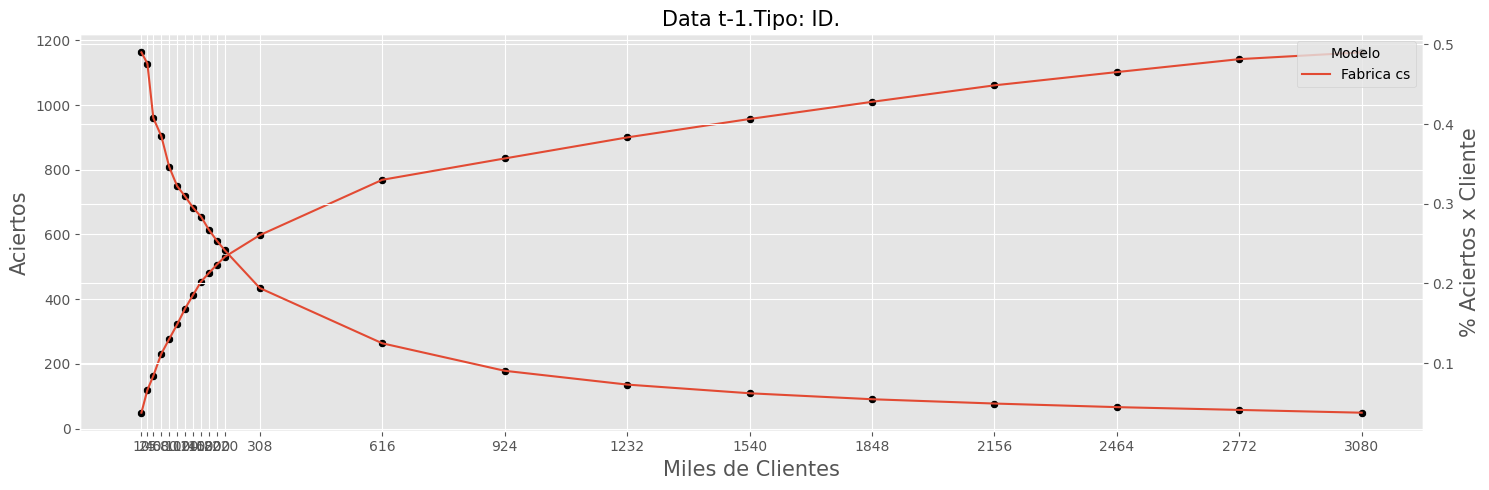

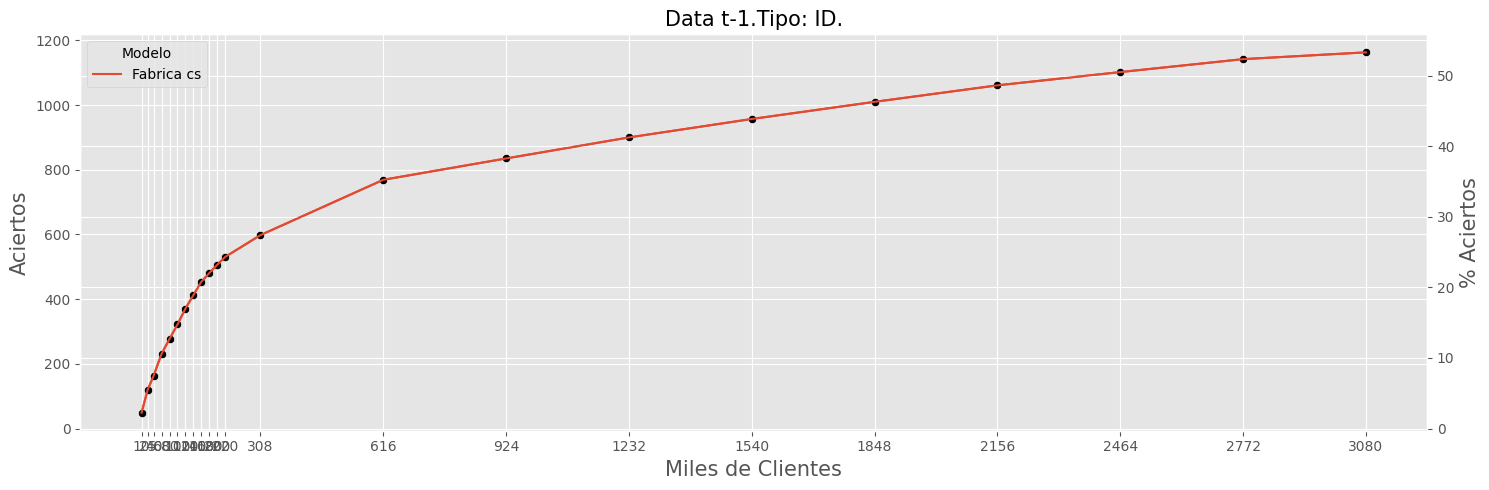

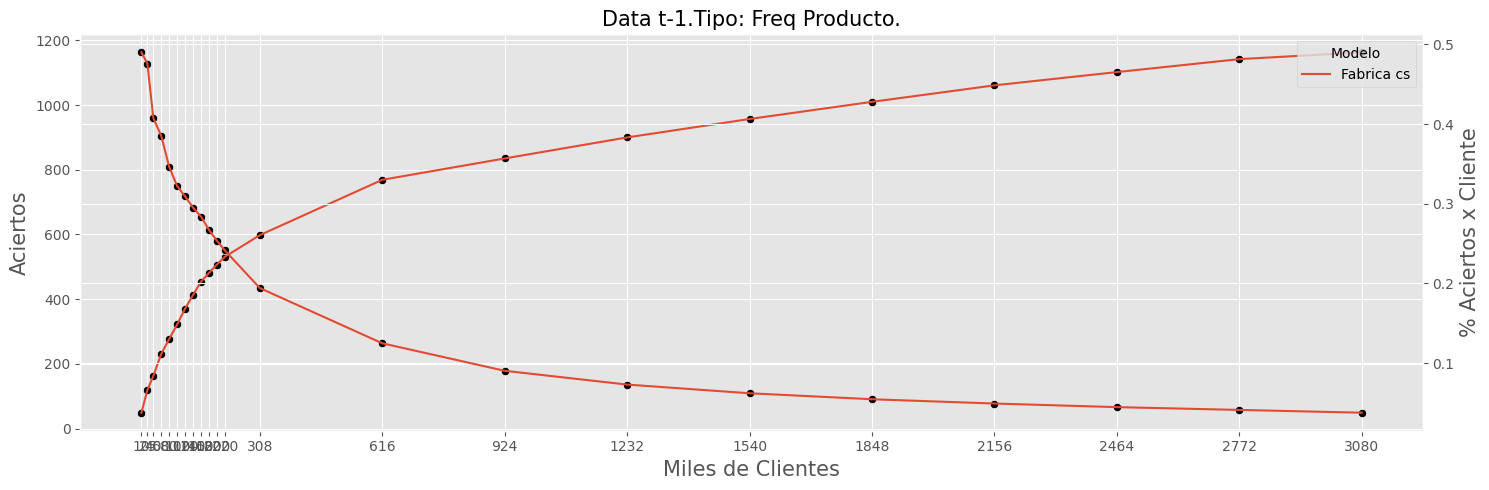

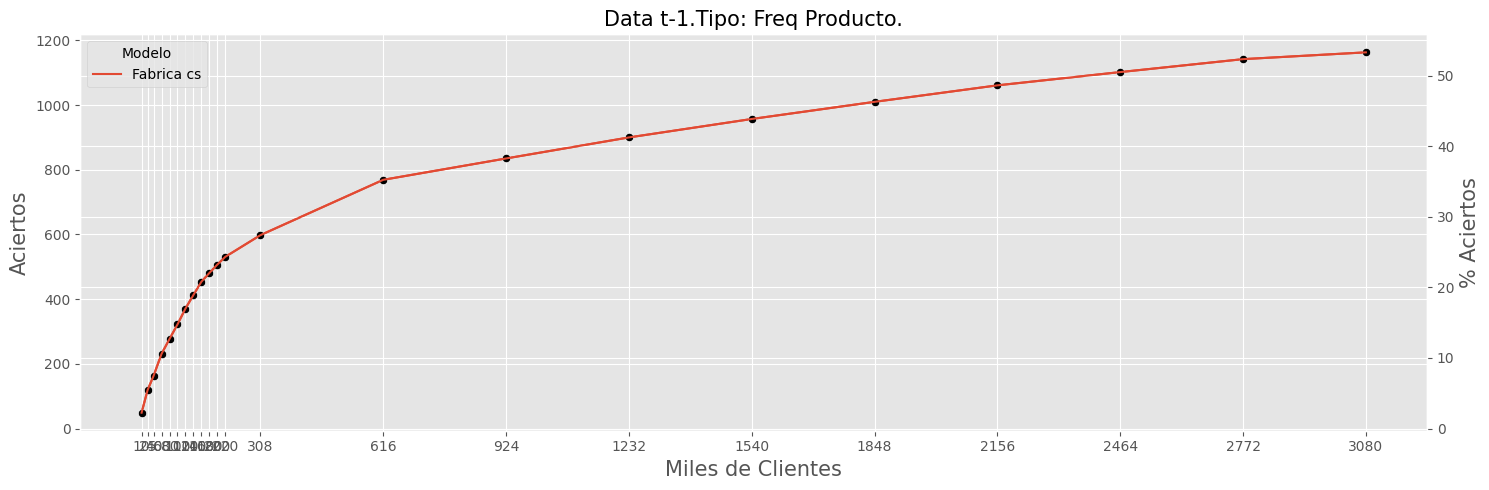

[01/15/25 17:07:37] INFO     ---------------------------------------------------                       ]8;id=188213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=36804;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

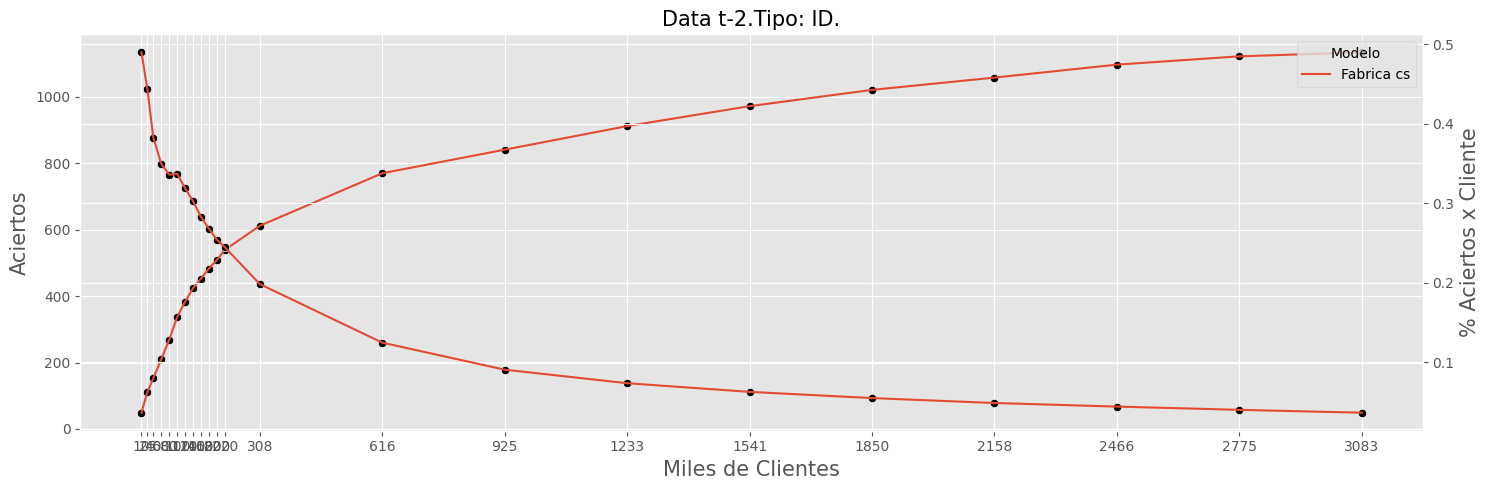

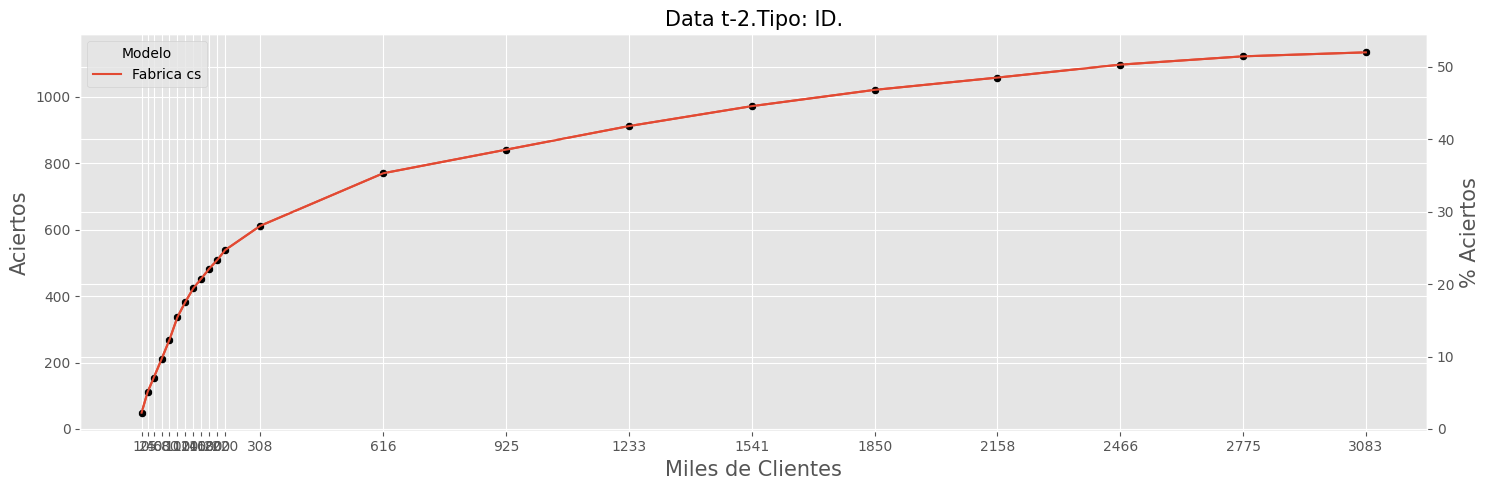

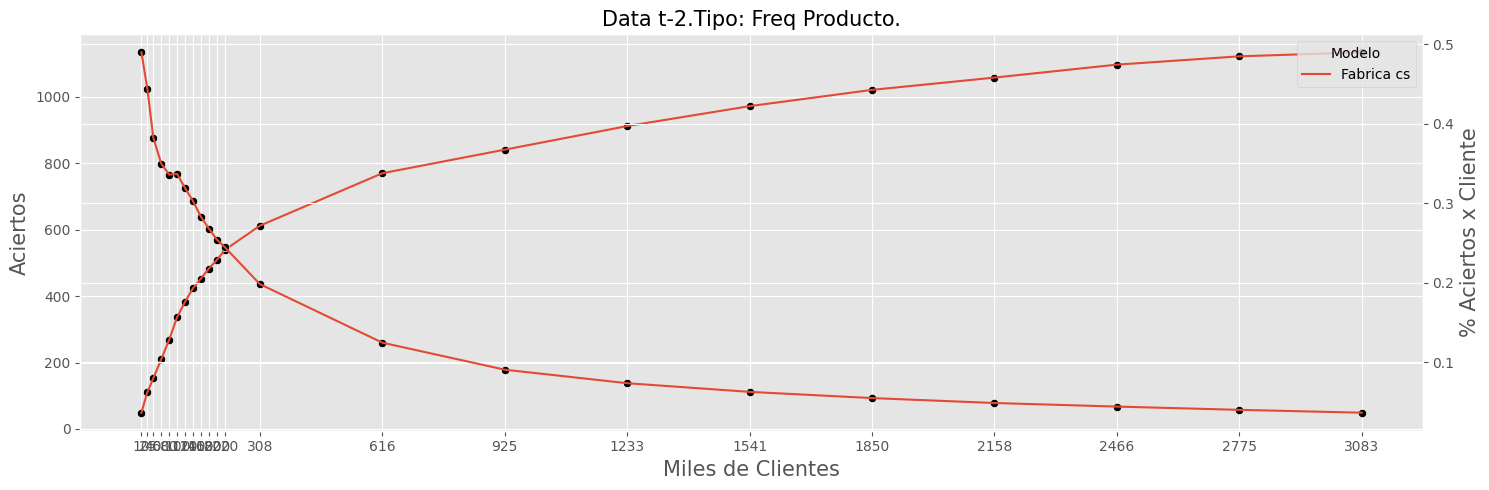

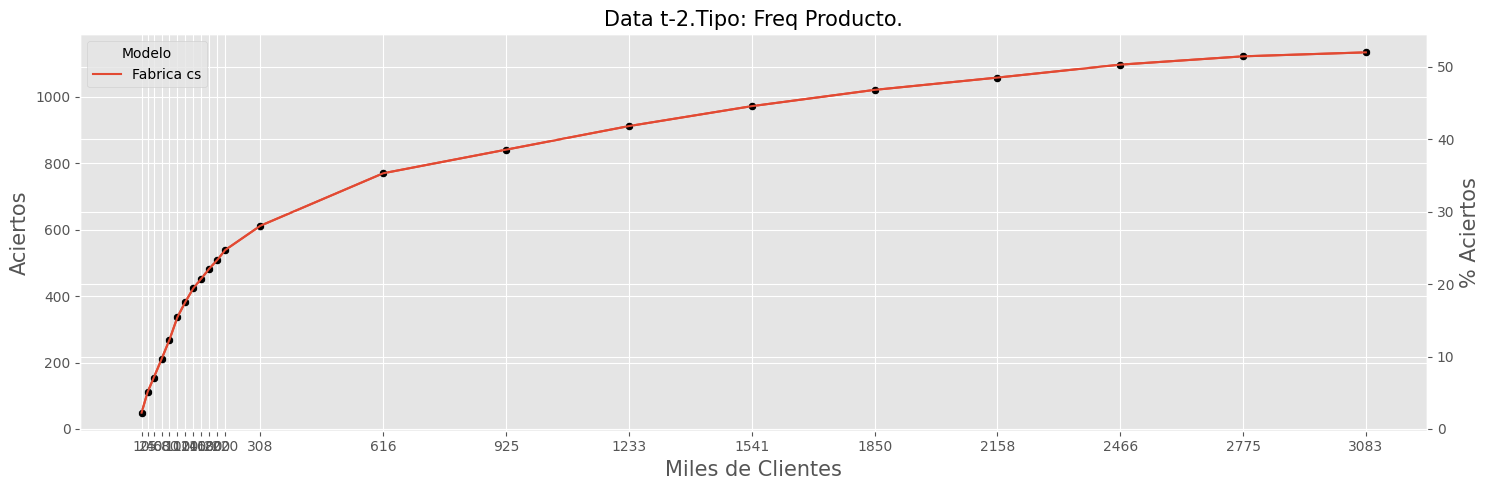

[01/15/25 17:07:39] INFO     ---------------------------------------------------                       ]8;id=861142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=340536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

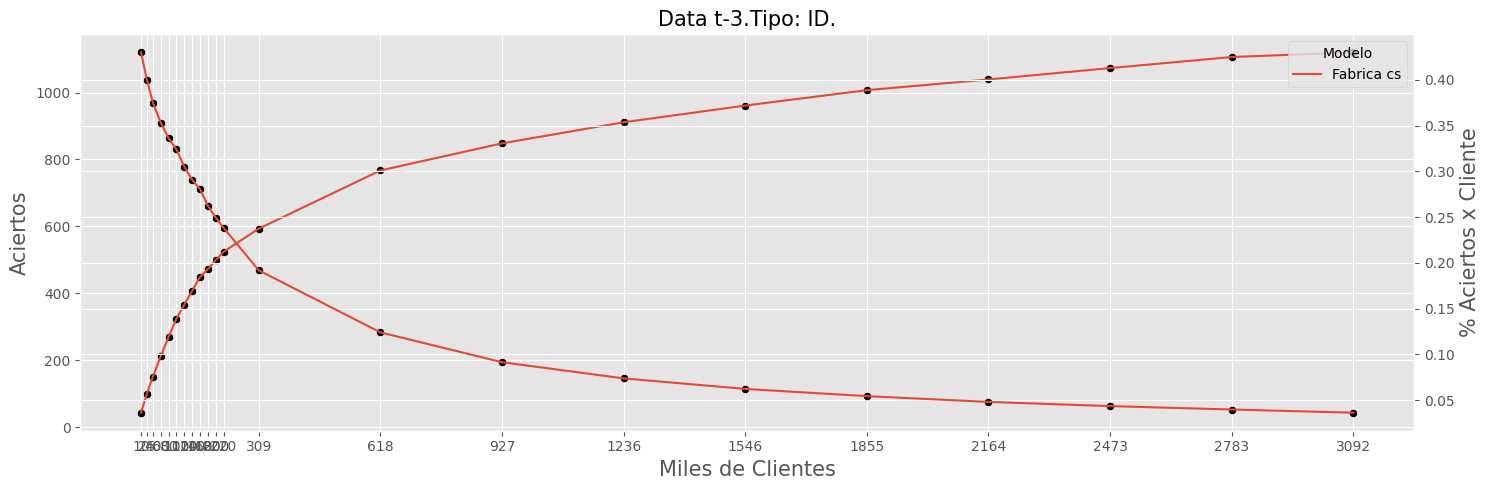

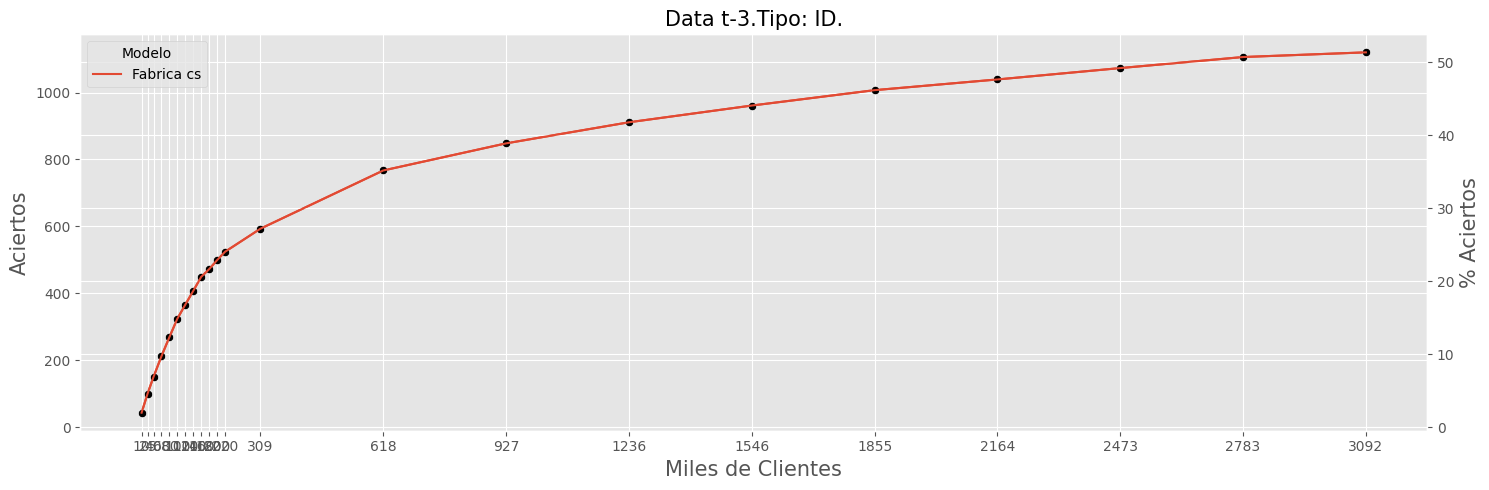

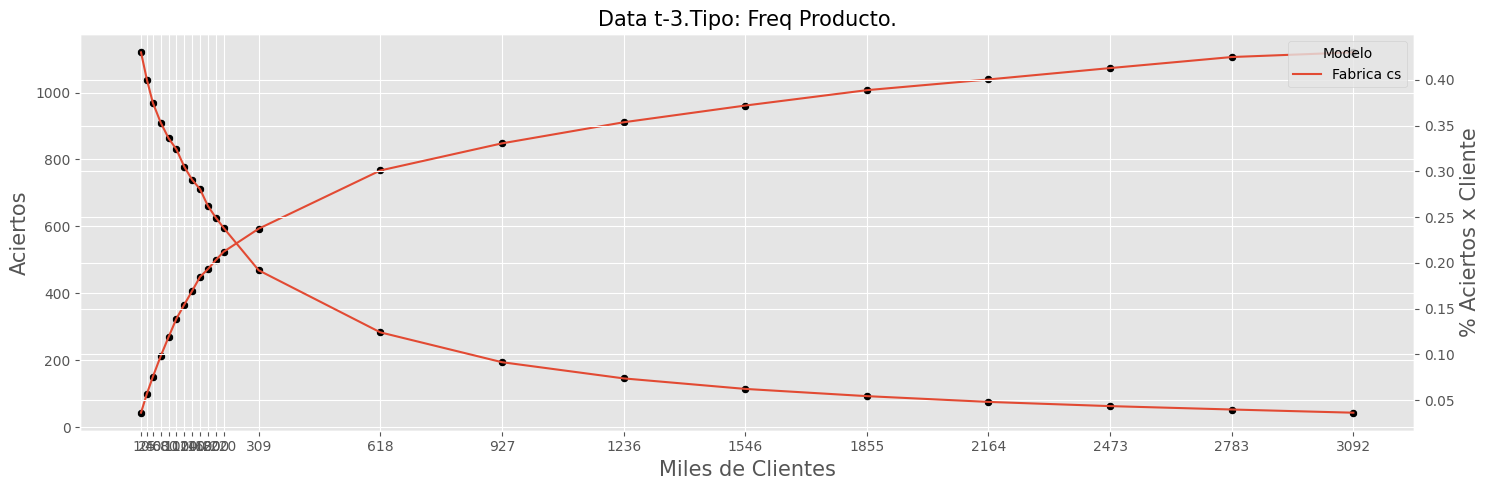

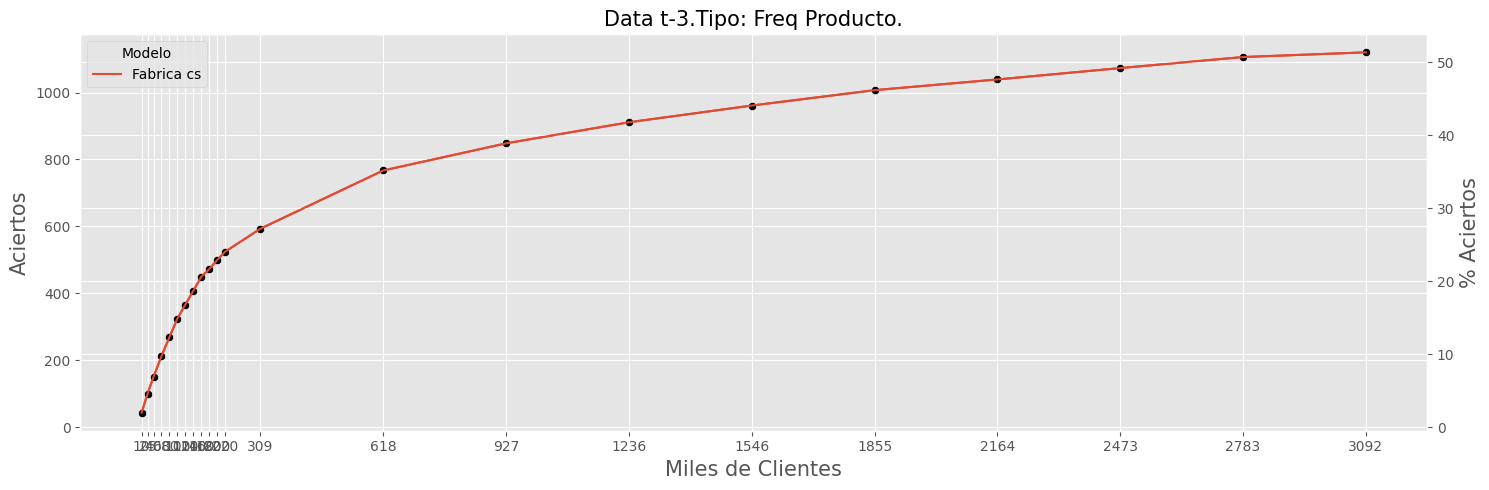

[01/15/25 17:07:40] INFO     ---------------------------------------------------                       ]8;id=50824;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=766332;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

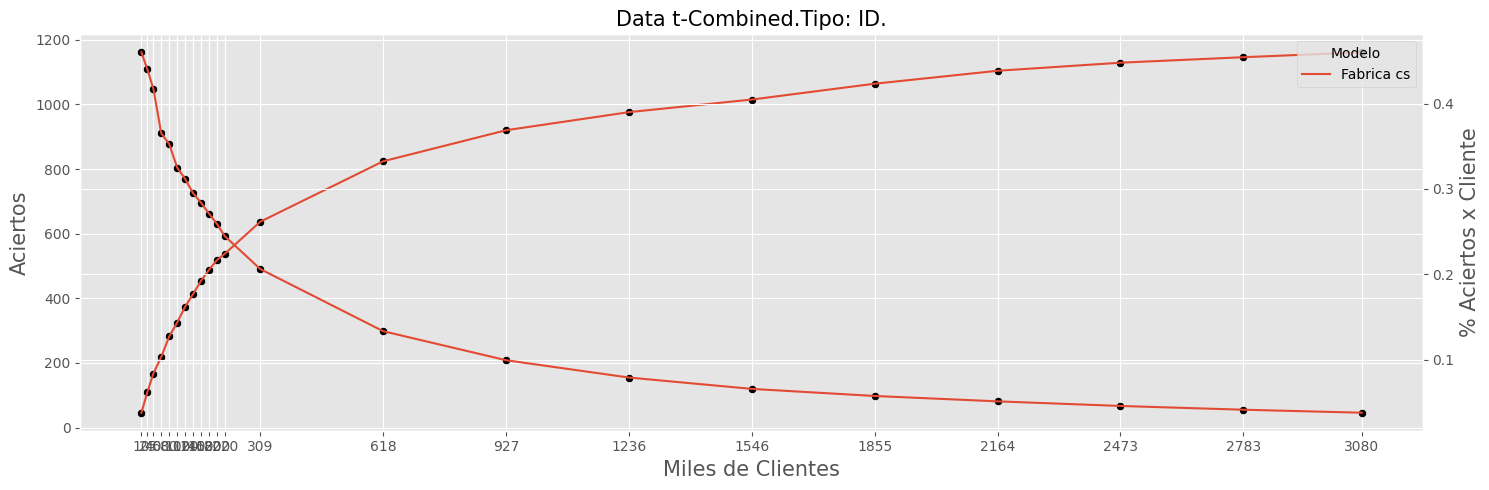

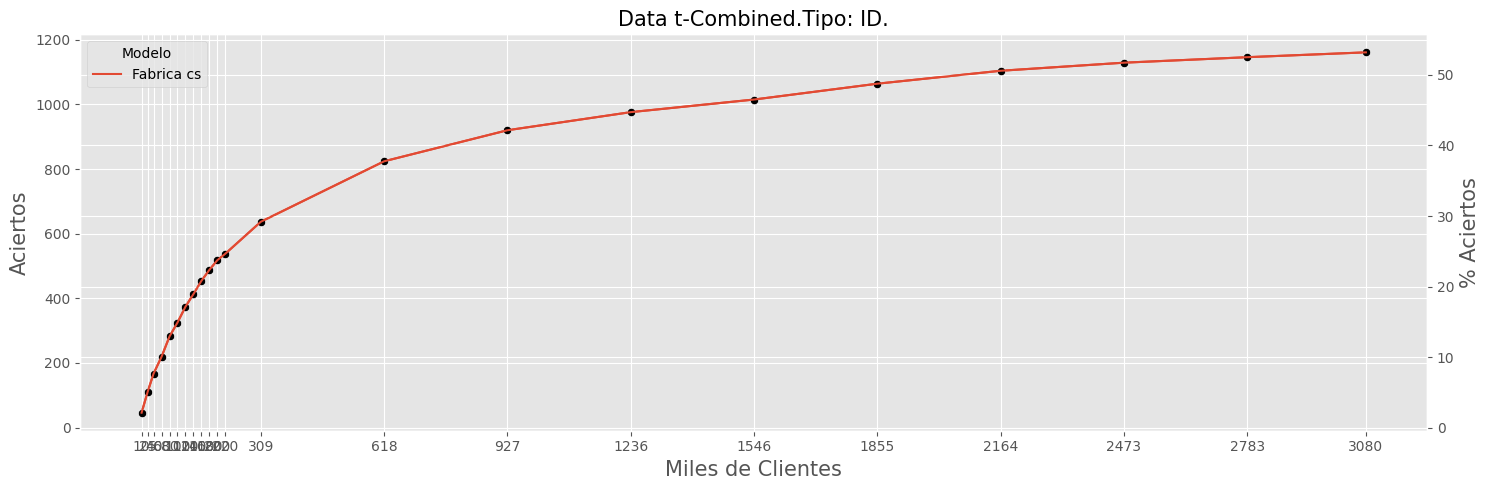

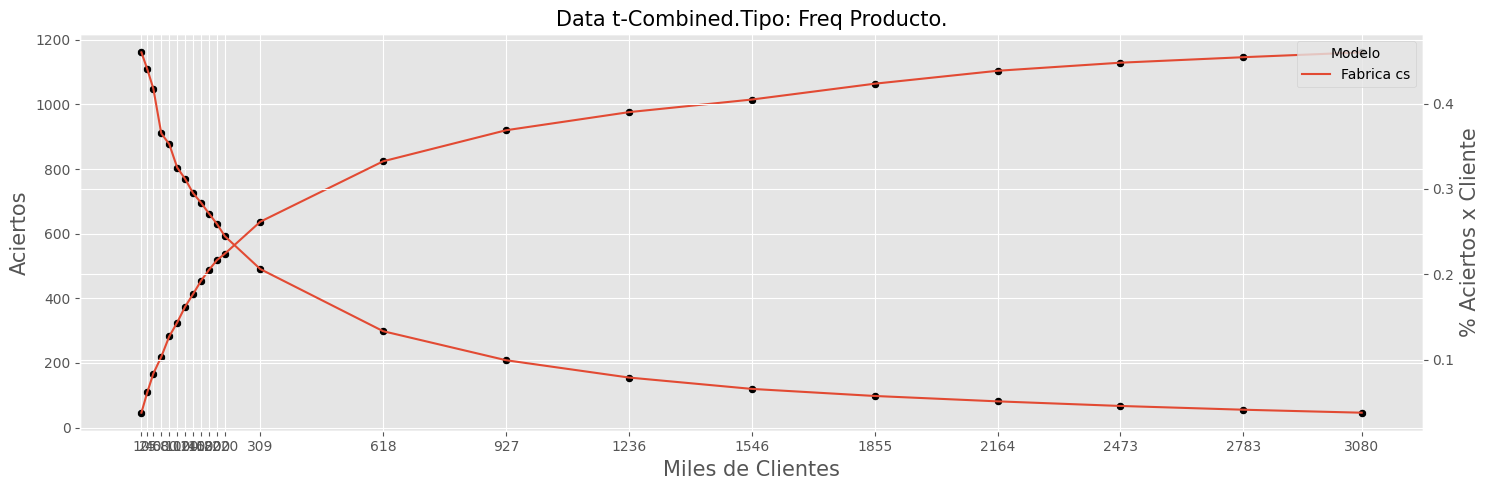

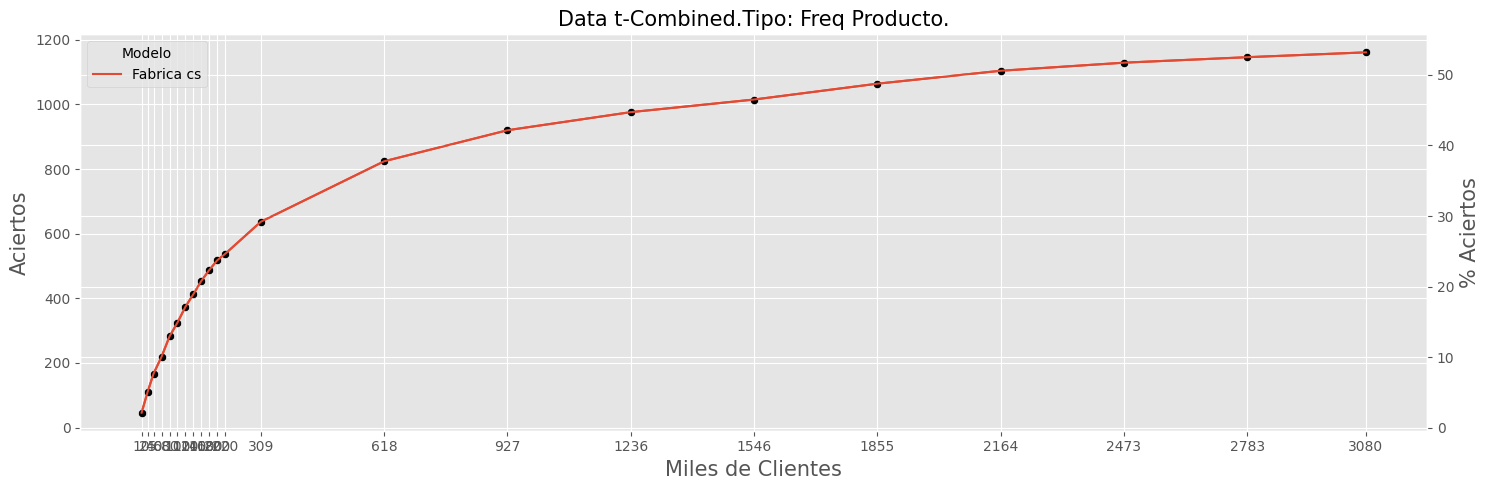

[01/15/25 17:07:42] INFO     ---------------------------------------------------                       ]8;id=968813;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=563489;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

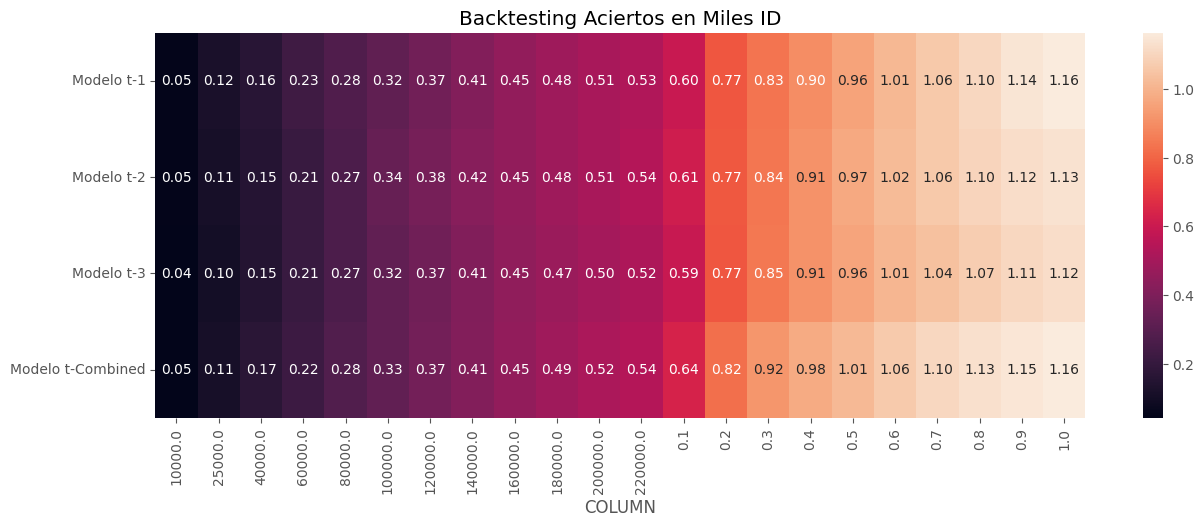

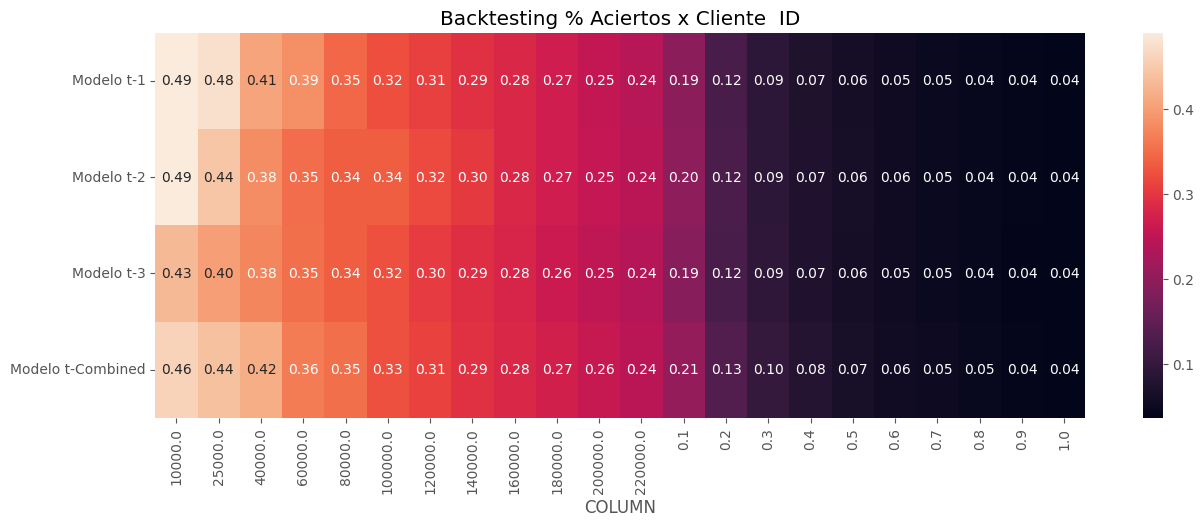

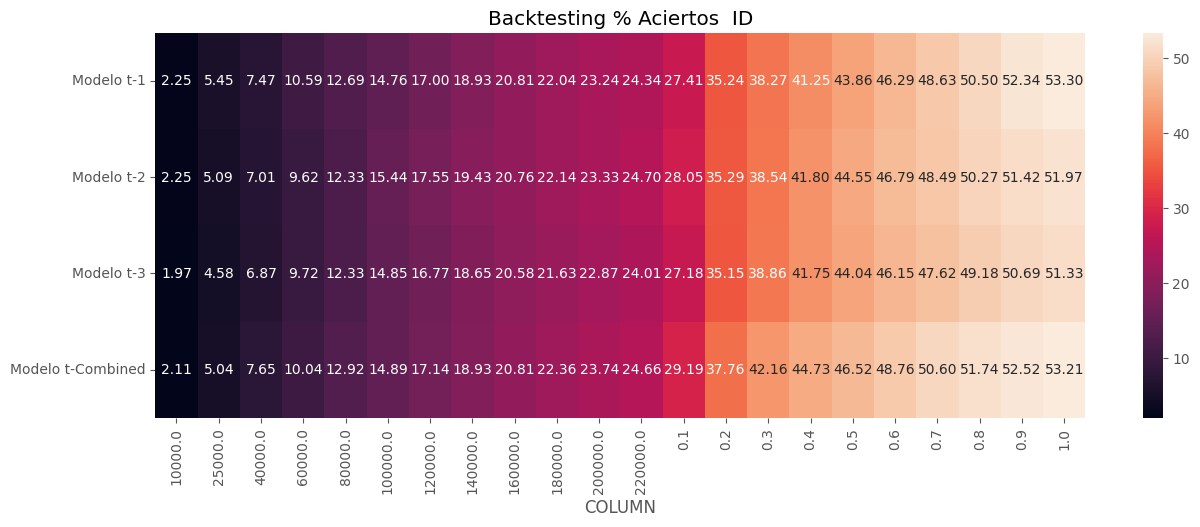

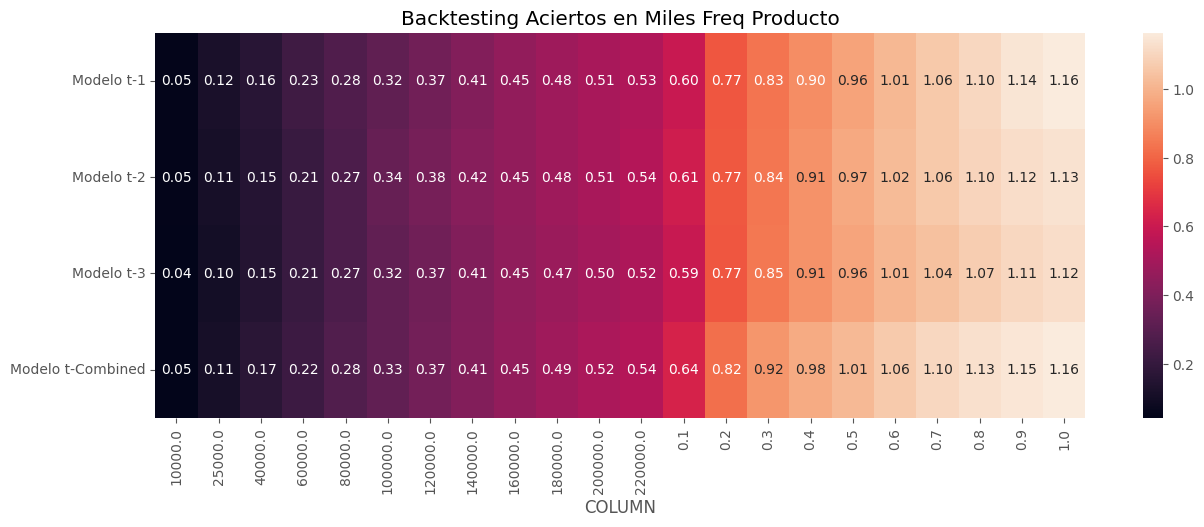

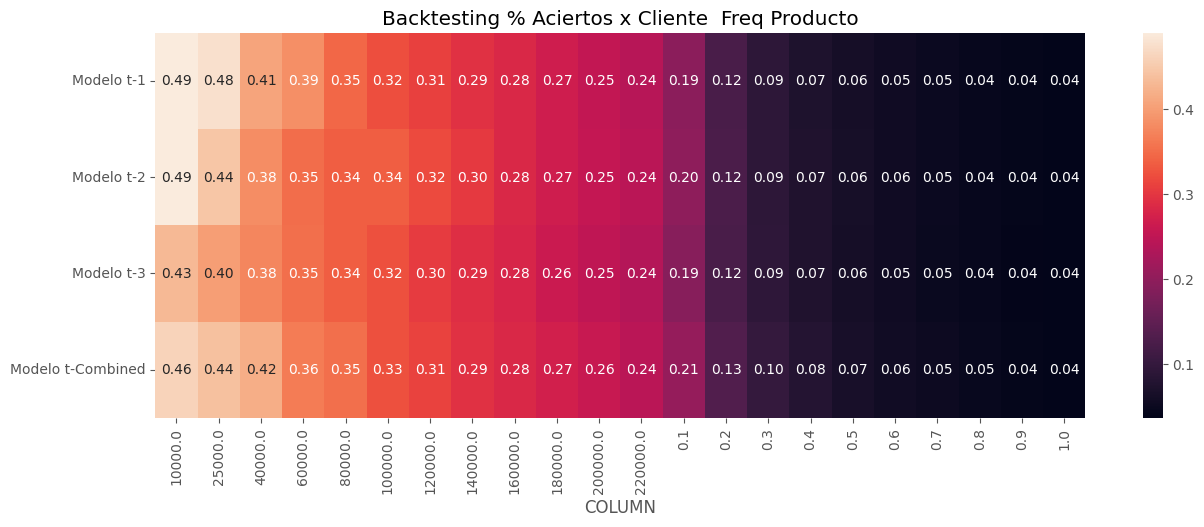

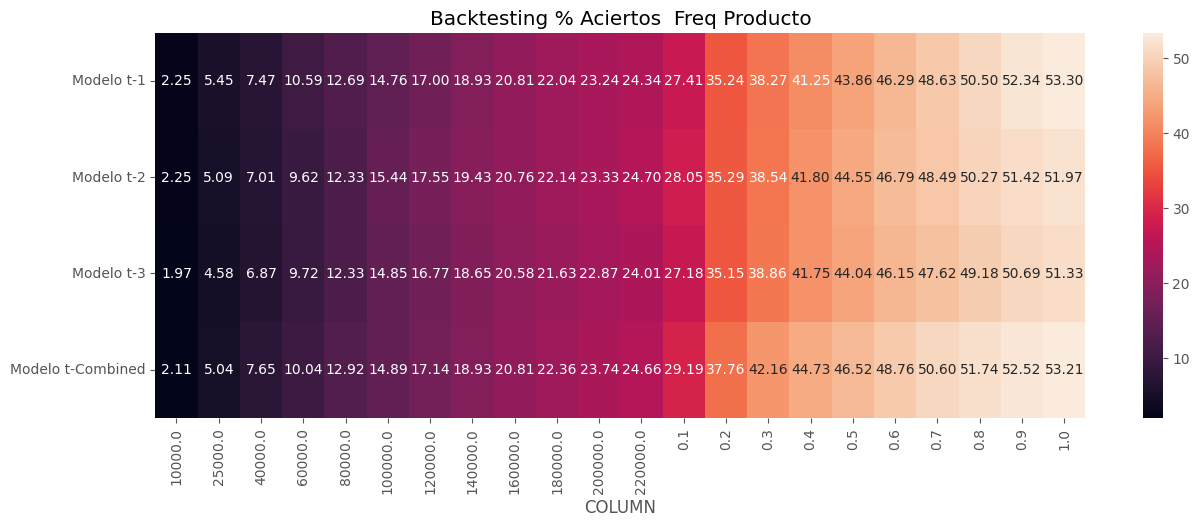

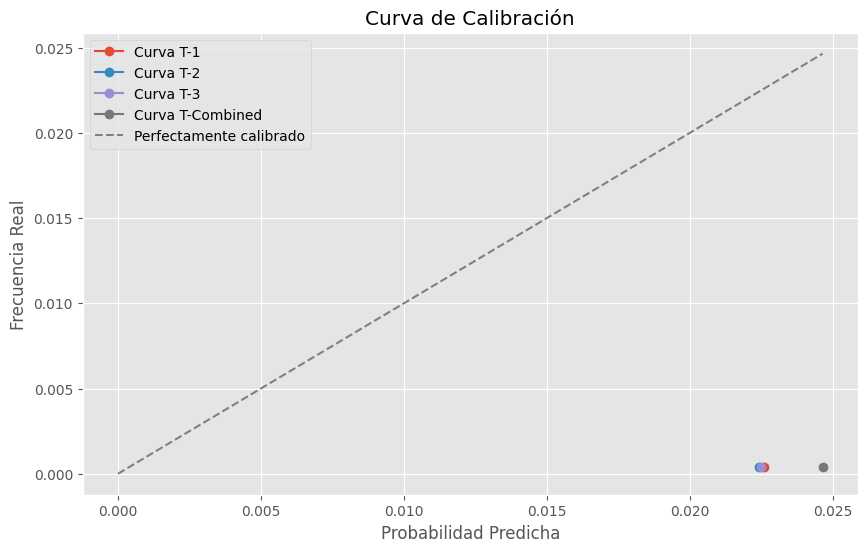

In [9]:
backtesting.plotear_curvas_rezago(save_backtesting, params)
plt.figure(figsize=(10, 6))
max_value = 0
for i in save_backtesting.keys():
    prob_true = save_backtesting[i]['prob_true']
    prob_pred = save_backtesting[i]['prob_pred']
    # Graficar la curva de calibración
    try:
        msg = str(int(i))
    except:
        msg = str(i)
    plt.plot(prob_pred, prob_true, marker='o', label='Curva'+" T-"+msg)
    max_value = np.max([max_value,np.max(prob_pred)])
plt.plot([0, max_value], [0, max_value], linestyle='--', color='gray', label='Perfectamente calibrado')
plt.title('Curva de Calibración')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia Real')
plt.legend()
plt.show()
# curva > 45 grados = subestimar
# curva < 45 grados = sobrestimar

In [10]:
wanted_metric = ['N all','N n_top','true_sum n_top','backtest_metric n_top','Precision n_top','recall n_top','f1-score n_top']
for i in save_backtesting.keys():
    print(i,'Top Metrics')
    res = save_backtesting[i]['metrics']
    display(res[(res["metric_name"].isin(wanted_metric))&(res["class_name"].isin(['1.0','1',1,1.0,'dim shape']))].drop('timestamp', axis=1))
    display(res[res["metric_name"].isin(['True negatives','True positives','False negatives','False positives'])])
    print('------------')

1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202411                N n_top       n_top   
1         CS  Ensamble,       202411                  N all   dim shape   
2         CS  Ensamble,       202411  backtest_metric n_top       n_top   
3         CS  Ensamble,       202411        Precision n_top       n_top   
5         CS  Ensamble,       202411           recall n_top       n_top   
7         CS  Ensamble,       202411         f1-score n_top       n_top   
9         CS  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924263  
1  dim shape  3080879  
2        1.0   0.0908  
3          1   0.0908  
5          1    100.0  
7          1   0.1814  
9          1      839

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 15:11         CS  Ensamble,       202411   True positives   
19  2025-01-15 15:11         CS  Ensamble,       202411  False negatives   
20  2025-01-15 15:11         CS  Ensamble,       202411   True negatives   
21  2025-01-15 15:11         CS  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     1163.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3001254.0

------------
2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202411                N n_top       n_top   
1         CS  Ensamble,       202411                  N all   dim shape   
2         CS  Ensamble,       202411  backtest_metric n_top       n_top   
3         CS  Ensamble,       202411        Precision n_top       n_top   
5         CS  Ensamble,       202411           recall n_top       n_top   
7         CS  Ensamble,       202411         f1-score n_top       n_top   
9         CS  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   0.0922  
3          1   0.0922  
5          1    100.0  
7          1   0.1843  
9          1      853

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 15:11         CS  Ensamble,       202411   True positives   
19  2025-01-15 15:11         CS  Ensamble,       202411  False negatives   
20  2025-01-15 15:11         CS  Ensamble,       202411   True negatives   
21  2025-01-15 15:11         CS  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     1134.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2934529.0

------------
3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202411                N n_top       n_top   
1         CS  Ensamble,       202411                  N all   dim shape   
2         CS  Ensamble,       202411  backtest_metric n_top       n_top   
3         CS  Ensamble,       202411        Precision n_top       n_top   
5         CS  Ensamble,       202411           recall n_top       n_top   
7         CS  Ensamble,       202411         f1-score n_top       n_top   
9         CS  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0   0.0932  
3          1   0.0932  
5          1    100.0  
7          1   0.1863  
9          1      865

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 15:12         CS  Ensamble,       202411   True positives   
19  2025-01-15 15:12         CS  Ensamble,       202411  False negatives   
20  2025-01-15 15:12         CS  Ensamble,       202411   True negatives   
21  2025-01-15 15:12         CS  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     1120.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2868002.0

------------
Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202411                N n_top       n_top   
1         CS  Ensamble,       202411                  N all   dim shape   
2         CS  Ensamble,       202411  backtest_metric n_top       n_top   
3         CS  Ensamble,       202411        Precision n_top       n_top   
5         CS  Ensamble,       202411           recall n_top       n_top   
7         CS  Ensamble,       202411         f1-score n_top       n_top   
9         CS  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924264  
1  dim shape  3080880  
2        1.0   0.1002  
3          1   0.1002  
5          1    100.0  
7          1   0.2002  
9          1      926

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 15:12         CS  Ensamble,       202411   True positives   
19  2025-01-15 15:12         CS  Ensamble,       202411  False negatives   
20  2025-01-15 15:12         CS  Ensamble,       202411   True negatives   
21  2025-01-15 15:12         CS  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     1161.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2870514.0

------------


In [11]:
for i in save_backtesting.keys():
    print(i)
    res = save_backtesting[i]['ks']
    display(res)

1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.56      2.80          308088              598            0.19   
1      9      2.52      2.56          308088              171            0.06   
2      8      2.51      2.52          300484               66            0.02   
3      7      2.50      2.51          315692               65            0.02   
4      6      2.47      2.50          308087               57            0.02   
5      5      2.43      2.47          308088               53            0.02   
6      4      2.34      2.43          307984               51            0.02   
7      3      2.11      2.34          308192               41            0.01   
8      2      1.55      2.11          308088               40            0.01   
9      1      0.03      1.55          308088               21            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          51.42               10.00    41.42  
1          66.12               20.00    46.12  
2          71.80               29.75    42.04  
3          77.39               40.00    37.39  
4          82.29               50.00    32.29  
5          86.84               60.00    26.84  
6          91.23               70.00    21.23  
7          94.75               80.00    14.75  
8          98.19               90.00     8.19  
9         100.00              100.00     0.00

2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.57      2.80          308346              612            0.20   
1      9      2.52      2.57          308346              158            0.05   
2      8      2.50      2.52          308346               71            0.02   
3      7      2.48      2.50          308346               71            0.02   
4      6      2.45      2.48          308220               60            0.02   
5      5      2.39      2.45          308472               49            0.02   
6      4      2.29      2.39          308346               37            0.01   
7      3      2.05      2.29          308323               39            0.01   
8      2      1.51      2.05          308369               25            0.01   
9      1      0.03      1.51          308346               12            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          53.97                10.0    43.97  
1          67.90                20.0    47.90  
2          74.16                30.0    44.16  
3          80.42                40.0    40.42  
4          85.71                50.0    35.72  
5          90.04                60.0    30.04  
6          93.30                70.0    23.30  
7          96.74                80.0    16.74  
8          98.94                90.0     8.94  
9         100.00               100.0     0.00

3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.57      2.80          309230              593            0.19   
1      9      2.52      2.57          309229              174            0.06   
2      8      2.50      2.52          309230               81            0.03   
3      7      2.48      2.50          309229               63            0.02   
4      6      2.45      2.48          309220               50            0.02   
5      5      2.40      2.45          309239               46            0.01   
6      4      2.29      2.40          309229               32            0.01   
7      3      2.05      2.29          309230               34            0.01   
8      2      1.53      2.05          309228               33            0.01   
9      1      0.04      1.53          309231               14            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          52.95                10.0    42.95  
1          68.48                20.0    48.48  
2          75.71                30.0    45.71  
3          81.34                40.0    41.34  
4          85.80                50.0    35.80  
5          89.91                60.0    29.91  
6          92.77                70.0    22.77  
7          95.80                80.0    15.80  
8          98.75                90.0     8.75  
9         100.00               100.0     0.00

Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.59      2.80          308088              634            0.21   
1      9      2.54      2.59          308088              189            0.06   
2      8      2.52      2.54          308082               95            0.03   
3      7      2.51      2.52          308094               58            0.02   
4      6      2.50      2.51          308088               39            0.01   
5      5      2.49      2.50          308088               49            0.02   
6      4      2.46      2.49          308088               39            0.01   
7      3      2.41      2.46          308088               25            0.01   
8      2      2.29      2.41          308088               18            0.01   
9      1      1.64      2.29          308088               15            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          54.61                10.0    44.61  
1          70.89                20.0    50.89  
2          79.07                30.0    49.07  
3          84.07                40.0    44.07  
4          87.42                50.0    37.42  
5          91.65                60.0    31.65  
6          95.00                70.0    25.00  
7          97.16                80.0    17.16  
8          98.71                90.0     8.71  
9         100.00               100.0     0.00

## Comparar backtesting

In [8]:
data_backtesting1 = catalog.load("data_backtesting_202410")
data_backtesting11 = catalog.load("data_backtesting_202410_anterior")
data_backtesting2 = catalog.load("data_backtesting_202411")
data_backtesting22 = catalog.load("data_backtesting_202411_anterior")

[01/20/25 16:36:58] INFO     Loading data from 'data_backtesting_202410' (PickleDataSet)...     ]8;id=567122;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=163656;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

[01/20/25 16:38:57] INFO     Loading data from 'data_backtesting_202410_anterior'               ]8;id=55027;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=823254;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[01/20/25 16:40:59] INFO     Loading data from 'data_backtesting_202411' (PickleDataSet)...     ]8;id=624475;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=2986;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

[01/20/25 16:44:07] INFO     Loading data from 'data_backtesting_202411_anterior'               ]8;id=290914;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=736667;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

In [9]:
 nametag_model = ['202410','202410_MVP4','202411','202411_MVP4']
 backtesting_all = [data_backtesting1,data_backtesting11,data_backtesting2,data_backtesting22]
# nametag_model = ['202410','202411']
# backtesting_all = [data_backtesting1,data_backtesting2]

dict_keys(['ID', 'Freq Producto'])


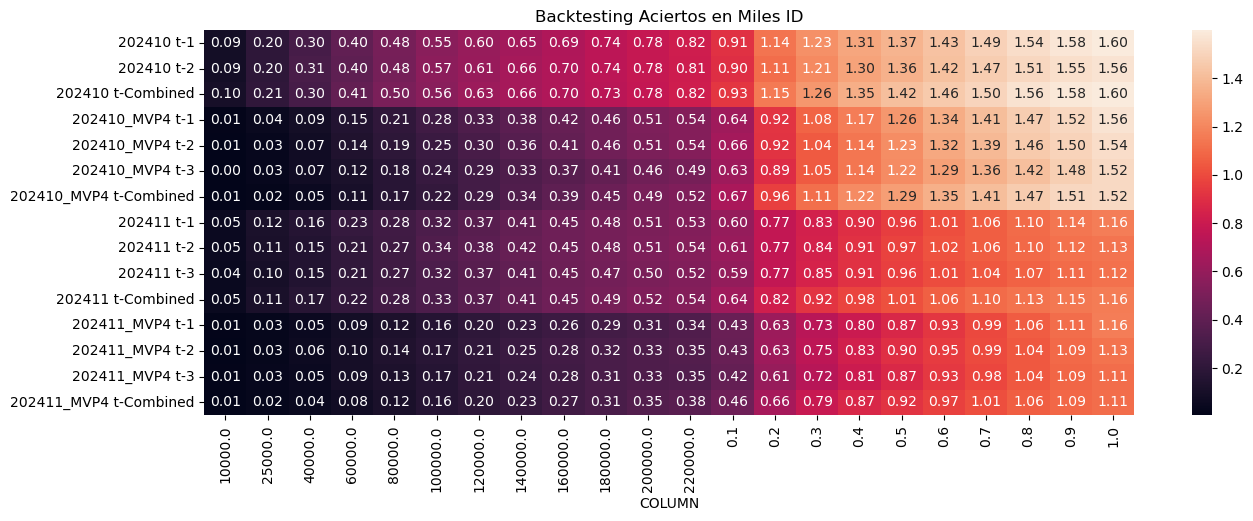

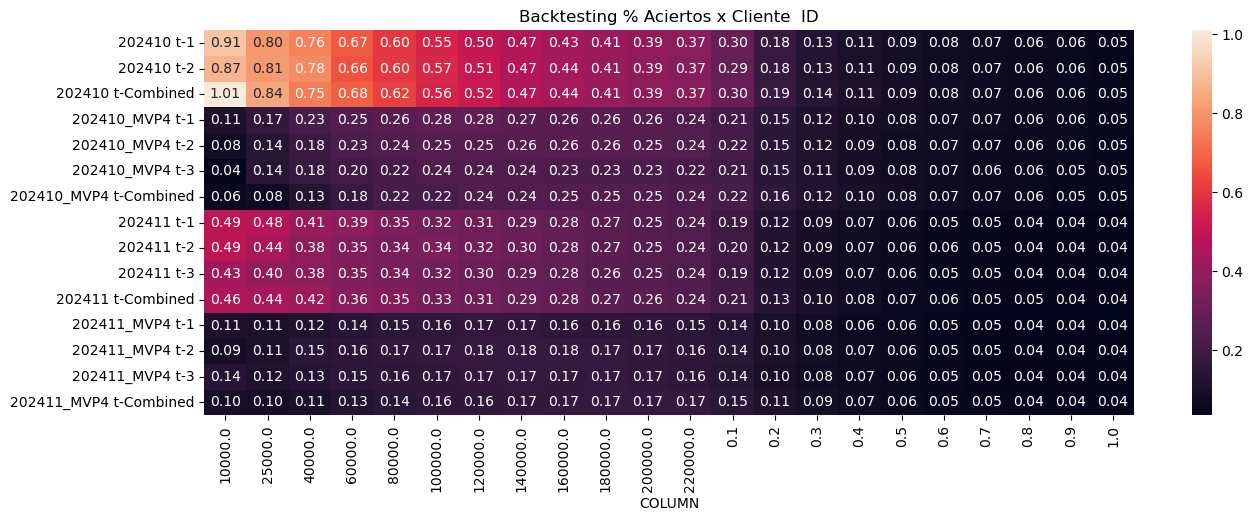

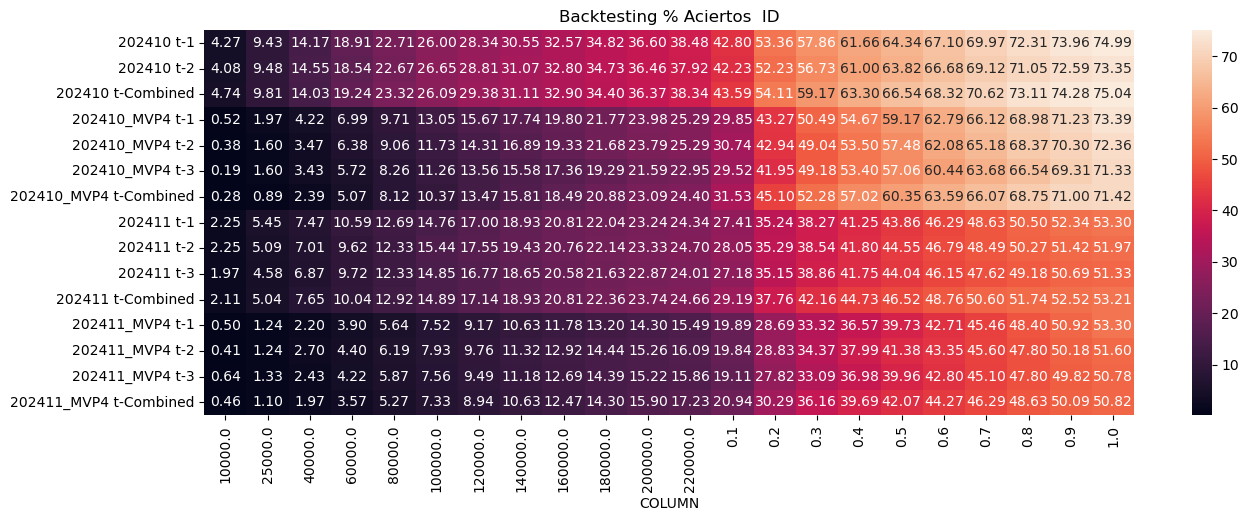

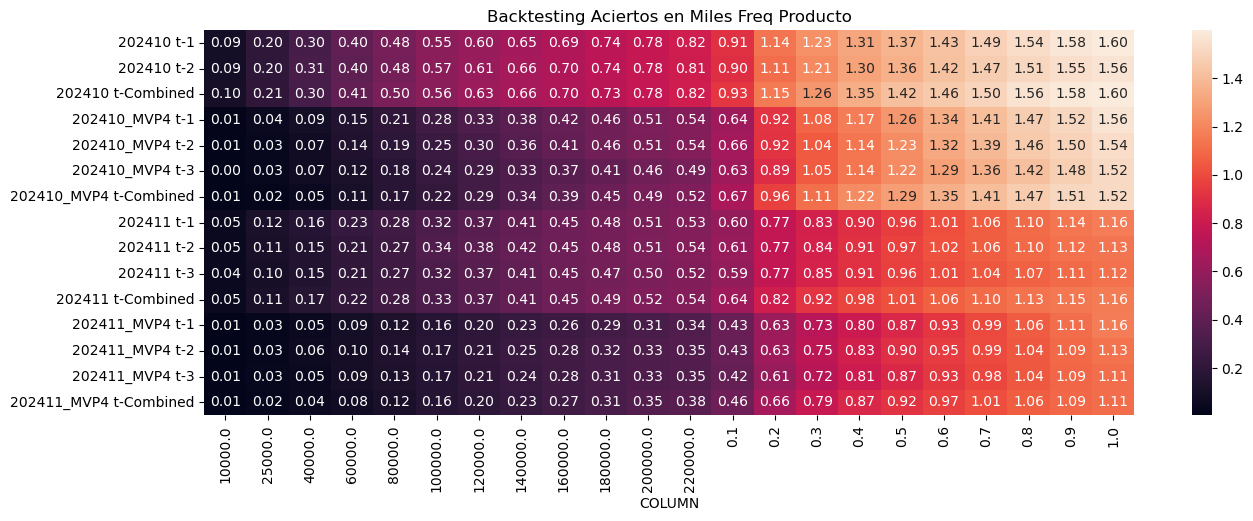

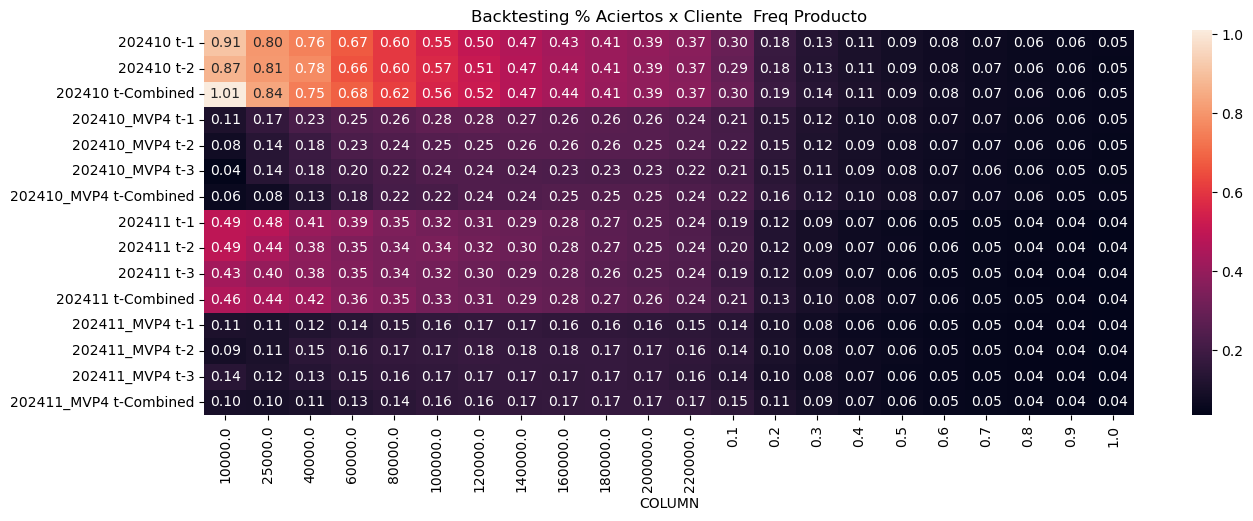

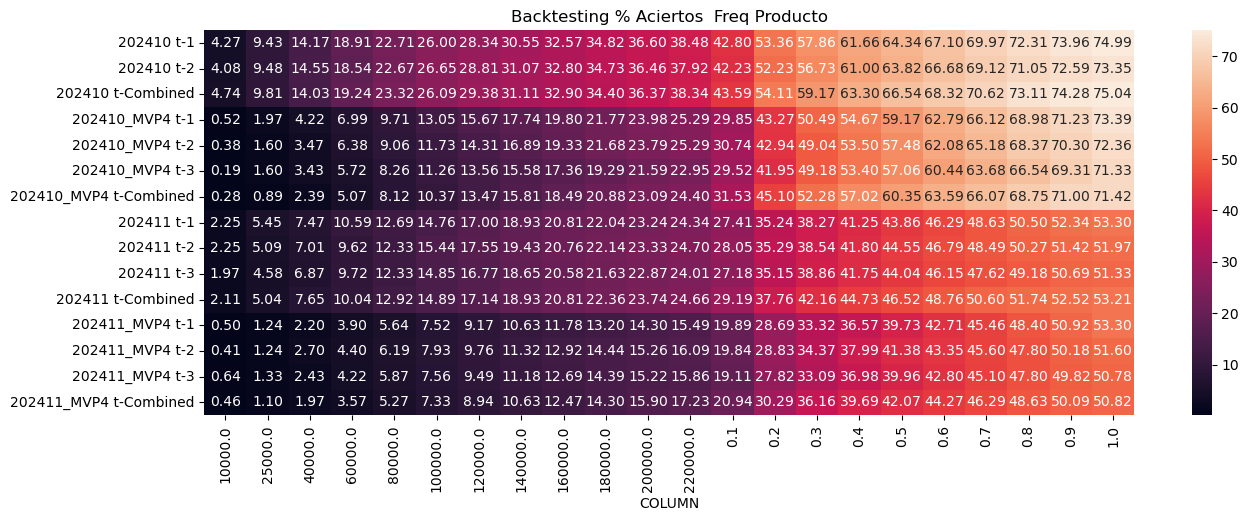

In [10]:
consolidacion_tipo = {}
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        df_i = save_backtesting[i]['contactabilidad_curva']#.keys()
        df_i = df_i[~df_i['Aciertos'].isnull()]
        df_i = df_i.replace('Fabrica '+params['target'].split('_')[0],name)
        df_i = df_i[df_i['Modelo'] == name]
        for tipo in df_i['Tipo'].unique():
            df_ii = df_i[df_i['Tipo'] == tipo]
            df_ii = df_ii.set_index('COLUMN')
            if tipo not in consolidacion_tipo:
                consolidacion_tipo[tipo] = {'Aciertos': pd.DataFrame(),'% Aciertos x Cliente':pd.DataFrame(),'% Aciertos': pd.DataFrame()}
            for col in ['Aciertos','% Aciertos x Cliente','% Aciertos']:
                consolidacion_tipo[tipo][col] = pd.concat([consolidacion_tipo[tipo][col],df_ii[[col]].rename(columns = {col:name})], axis = 1)
print(consolidacion_tipo.keys())
import seaborn as sns
for col in list(consolidacion_tipo.keys()):
    for tipo in ['Aciertos','% Aciertos x Cliente','% Aciertos']:
        if tipo == 'Aciertos':
            graph = consolidacion_tipo[col][tipo].T/1000
            msj = f'Backtesting {tipo} en Miles {col}'
        else:
            graph = consolidacion_tipo[col][tipo].T
            msj = f'Backtesting {tipo}  {col}'
        plt.figure(figsize=(15,5))
        sns.heatmap(graph, annot = True, fmt= '0.02f')
        plt.title(msj)
        plt.show()

In [13]:
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name)
        res = save_backtesting[i]['ks']
        display(res)

202410 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.57      2.80          308346              912            0.30   
1      9      2.52      2.57          308346              225            0.07   
2      8      2.50      2.52          308346               96            0.03   
3      7      2.48      2.50          308346               81            0.03   
4      6      2.45      2.48          308220               57            0.02   
5      5      2.39      2.45          308472               59            0.02   
6      4      2.29      2.39          308346               61            0.02   
7      3      2.05      2.29          308323               50            0.02   
8      2      1.51      2.05          308369               35            0.01   
9      1      0.03      1.51          308346               22            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          57.07                10.0    47.07  
1          71.15                20.0    51.15  
2          77.16                30.0    47.16  
3          82.23                40.0    42.23  
4          85.79                50.0    35.80  
5          89.49                60.0    29.49  
6          93.30                70.0    23.30  
7          96.43                80.0    16.43  
8          98.62                90.0     8.62  
9         100.00               100.0     0.00

202410 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.57      2.80          309230              900            0.29   
1      9      2.52      2.57          309229              213            0.07   
2      8      2.50      2.52          309230               96            0.03   
3      7      2.48      2.50          309229               91            0.03   
4      6      2.45      2.48          309220               60            0.02   
5      5      2.40      2.45          309239               61            0.02   
6      4      2.29      2.40          309229               52            0.02   
7      3      2.05      2.29          309230               41            0.01   
8      2      1.53      2.05          309228               33            0.01   
9      1      0.04      1.53          309231               16            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          57.58                10.0    47.58  
1          71.21                20.0    51.21  
2          77.35                30.0    47.35  
3          83.17                40.0    43.17  
4          87.01                50.0    37.01  
5          90.91                60.0    30.91  
6          94.24                70.0    24.24  
7          96.87                80.0    16.87  
8          98.98                90.0     8.98  
9         100.00               100.0     0.00

202410 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.58      2.80          308346              926            0.30   
1      9      2.53      2.58          308346              226            0.07   
2      8      2.51      2.53          308346              108            0.04   
3      7      2.50      2.51          308346               87            0.03   
4      6      2.48      2.50          308346               70            0.02   
5      5      2.45      2.48          308345               38            0.01   
6      4      2.40      2.45          308336               49            0.02   
7      3      2.29      2.40          308357               53            0.02   
8      2      1.98      2.29          308338               25            0.01   
9      1      0.94      1.98          308355               17            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          57.91                10.0    47.91  
1          72.05                20.0    52.05  
2          78.80                30.0    48.80  
3          84.24                40.0    44.24  
4          88.62                50.0    38.62  
5          90.99                60.0    30.99  
6          94.06                70.0    24.06  
7          97.37                80.0    17.37  
8          98.94                90.0     8.94  
9         100.00               100.0     0.00

202410_MVP4 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.09      7.66          300137              636            0.21   
1      9      0.05      0.09          300136              286            0.10   
2      8      0.04      0.05          300136              154            0.05   
3      7      0.03      0.04          300137               89            0.03   
4      6      0.03      0.03          300136               96            0.03   
5      5      0.02      0.03          300136               77            0.03   
6      4      0.02      0.02          300137               71            0.02   
7      3      0.02      0.02          300136               61            0.02   
8      2      0.01      0.02          300136               48            0.02   
9      1      0.00      0.01          300137               46            0.02   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          40.66                10.0    30.66  
1          58.95                20.0    38.95  
2          68.80                30.0    38.80  
3          74.49                40.0    34.49  
4          80.63                50.0    30.63  
5          85.55                60.0    25.55  
6          90.09                70.0    20.09  
7          93.99                80.0    13.99  
8          97.06                90.0     7.06  
9         100.00               100.0     0.00

202410_MVP4 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.09      7.66          301027              655            0.22   
1      9      0.05      0.09          301026              260            0.09   
2      8      0.04      0.05          301026              130            0.04   
3      7      0.03      0.04          301026               95            0.03   
4      6      0.03      0.03          301026               85            0.03   
5      5      0.02      0.03          301026               98            0.03   
6      4      0.02      0.02          301026               66            0.02   
7      3      0.01      0.02          301026               68            0.02   
8      2      0.01      0.01          301026               41            0.01   
9      1      0.00      0.01          301027               44            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          42.48                10.0    32.48  
1          59.34                20.0    39.34  
2          67.77                30.0    37.77  
3          73.93                40.0    33.93  
4          79.44                50.0    29.44  
5          85.80                60.0    25.80  
6          90.08                70.0    20.08  
7          94.49                80.0    14.49  
8          97.15                90.0     7.15  
9         100.00               100.0     0.00

202410_MVP4 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.10      7.66          306616              629            0.21   
1      9      0.05      0.10          306616              265            0.09   
2      8      0.04      0.05          306616              154            0.05   
3      7      0.03      0.04          306615               90            0.03   
4      6      0.03      0.03          306616               78            0.03   
5      5      0.02      0.03          306616               72            0.02   
6      4      0.02      0.02          306615               69            0.02   
7      3      0.02      0.02          306616               61            0.02   
8      2      0.01      0.02          306616               59            0.02   
9      1      0.00      0.01          306616               43            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          41.38                10.0    31.38  
1          58.82                20.0    38.82  
2          68.95                30.0    38.95  
3          74.87                40.0    34.87  
4          80.00                50.0    30.00  
5          84.74                60.0    24.74  
6          89.28                70.0    19.28  
7          93.29                80.0    13.29  
8          97.17                90.0     7.17  
9         100.00               100.0     0.00

202410_MVP4 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.15      7.66          282819              641            0.23   
1      9      0.07      0.15          282819              283            0.10   
2      8      0.05      0.07          282818              165            0.06   
3      7      0.04      0.05          282819              101            0.04   
4      6      0.04      0.04          282818               65            0.02   
5      5      0.03      0.04          282819               67            0.02   
6      4      0.03      0.03          282819               60            0.02   
7      3      0.03      0.03          282818               47            0.02   
8      2      0.02      0.03          282819               54            0.02   
9      1      0.02      0.02          282819               39            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          42.12                10.0    32.12  
1          60.71                20.0    40.71  
2          71.55                30.0    41.55  
3          78.19                40.0    38.19  
4          82.46                50.0    32.46  
5          86.86                60.0    26.86  
6          90.80                70.0    20.80  
7          93.89                80.0    13.89  
8          97.44                90.0     7.44  
9         100.00               100.0     0.00

202411 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.56      2.80          308088              598            0.19   
1      9      2.52      2.56          308088              171            0.06   
2      8      2.51      2.52          300484               66            0.02   
3      7      2.50      2.51          315692               65            0.02   
4      6      2.47      2.50          308087               57            0.02   
5      5      2.43      2.47          308088               53            0.02   
6      4      2.34      2.43          307984               51            0.02   
7      3      2.11      2.34          308192               41            0.01   
8      2      1.55      2.11          308088               40            0.01   
9      1      0.03      1.55          308088               21            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          51.42               10.00    41.42  
1          66.12               20.00    46.12  
2          71.80               29.75    42.04  
3          77.39               40.00    37.39  
4          82.29               50.00    32.29  
5          86.84               60.00    26.84  
6          91.23               70.00    21.23  
7          94.75               80.00    14.75  
8          98.19               90.00     8.19  
9         100.00              100.00     0.00

202411 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.57      2.80          308346              612            0.20   
1      9      2.52      2.57          308346              158            0.05   
2      8      2.50      2.52          308346               71            0.02   
3      7      2.48      2.50          308346               71            0.02   
4      6      2.45      2.48          308220               60            0.02   
5      5      2.39      2.45          308472               49            0.02   
6      4      2.29      2.39          308346               37            0.01   
7      3      2.05      2.29          308323               39            0.01   
8      2      1.51      2.05          308369               25            0.01   
9      1      0.03      1.51          308346               12            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          53.97                10.0    43.97  
1          67.90                20.0    47.90  
2          74.16                30.0    44.16  
3          80.42                40.0    40.42  
4          85.71                50.0    35.72  
5          90.04                60.0    30.04  
6          93.30                70.0    23.30  
7          96.74                80.0    16.74  
8          98.94                90.0     8.94  
9         100.00               100.0     0.00

202411 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.57      2.80          309230              593            0.19   
1      9      2.52      2.57          309229              174            0.06   
2      8      2.50      2.52          309230               81            0.03   
3      7      2.48      2.50          309229               63            0.02   
4      6      2.45      2.48          309220               50            0.02   
5      5      2.40      2.45          309239               46            0.01   
6      4      2.29      2.40          309229               32            0.01   
7      3      2.05      2.29          309230               34            0.01   
8      2      1.53      2.05          309228               33            0.01   
9      1      0.04      1.53          309231               14            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          52.95                10.0    42.95  
1          68.48                20.0    48.48  
2          75.71                30.0    45.71  
3          81.34                40.0    41.34  
4          85.80                50.0    35.80  
5          89.91                60.0    29.91  
6          92.77                70.0    22.77  
7          95.80                80.0    15.80  
8          98.75                90.0     8.75  
9         100.00               100.0     0.00

202411 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.59      2.80          308088              634            0.21   
1      9      2.54      2.59          308088              189            0.06   
2      8      2.52      2.54          308082               95            0.03   
3      7      2.51      2.52          308094               58            0.02   
4      6      2.50      2.51          308088               39            0.01   
5      5      2.49      2.50          308088               49            0.02   
6      4      2.46      2.49          308088               39            0.01   
7      3      2.41      2.46          308088               25            0.01   
8      2      2.29      2.41          308088               18            0.01   
9      1      1.64      2.29          308088               15            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          54.61                10.0    44.61  
1          70.89                20.0    50.89  
2          79.07                30.0    49.07  
3          84.07                40.0    44.07  
4          87.42                50.0    37.42  
5          91.65                60.0    31.65  
6          95.00                70.0    25.00  
7          97.16                80.0    17.16  
8          98.71                90.0     8.71  
9         100.00               100.0     0.00

202411_MVP4 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.09      7.66          308088              434            0.14   
1      9      0.05      0.09          308067              192            0.06   
2      8      0.04      0.05          308109              101            0.03   
3      7      0.04      0.04          308088               71            0.02   
4      6      0.03      0.04          308087               69            0.02   
5      5      0.03      0.03          308088               65            0.02   
6      4      0.02      0.03          308088               60            0.02   
7      3      0.02      0.02          308088               64            0.02   
8      2      0.01      0.02          308088               55            0.02   
9      1      0.00      0.01          308088               52            0.02   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          37.32                10.0    27.32  
1          53.83                20.0    33.83  
2          62.51                30.0    32.51  
3          68.62                40.0    28.62  
4          74.55                50.0    24.55  
5          80.14                60.0    20.14  
6          85.30                70.0    15.30  
7          90.80                80.0    10.80  
8          95.53                90.0     5.53  
9         100.00               100.0     0.00

202411_MVP4 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.09      7.66          300137              433            0.14   
1      9      0.05      0.09          300136              196            0.07   
2      8      0.04      0.05          300136              121            0.04   
3      7      0.03      0.04          300137               79            0.03   
4      6      0.03      0.03          300136               74            0.02   
5      5      0.02      0.03          300136               43            0.01   
6      4      0.02      0.02          300137               49            0.02   
7      3      0.02      0.02          300136               48            0.02   
8      2      0.01      0.02          300136               52            0.02   
9      1      0.00      0.01          300137               31            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          38.45                10.0    28.45  
1          55.86                20.0    35.86  
2          66.61                30.0    36.61  
3          73.62                40.0    33.62  
4          80.20                50.0    30.20  
5          84.01                60.0    24.01  
6          88.37                70.0    18.37  
7          92.63                80.0    12.63  
8          97.25                90.0     7.25  
9         100.00               100.0     0.00

202411_MVP4 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.09      7.66          301027              417            0.14   
1      9      0.05      0.09          301026              190            0.06   
2      8      0.04      0.05          301026              115            0.04   
3      7      0.03      0.04          301026               85            0.03   
4      6      0.03      0.03          301026               65            0.02   
5      5      0.02      0.03          301026               62            0.02   
6      4      0.02      0.02          301026               50            0.02   
7      3      0.01      0.02          301026               59            0.02   
8      2      0.01      0.01          301026               44            0.01   
9      1      0.00      0.01          301027               21            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          37.64                10.0    27.64  
1          54.78                20.0    34.78  
2          65.16                30.0    35.16  
3          72.83                40.0    32.83  
4          78.70                50.0    28.70  
5          84.30                60.0    24.30  
6          88.81                70.0    18.81  
7          94.13                80.0    14.13  
8          98.10                90.0     8.10  
9         100.00               100.0     0.00

202411_MVP4 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.15      7.66          282819              445            0.16   
1      9      0.08      0.15          282819              195            0.07   
2      8      0.05      0.08          282818              131            0.05   
3      7      0.05      0.05          282819               82            0.03   
4      6      0.04      0.05          282818               51            0.02   
5      5      0.04      0.04          282819               47            0.02   
6      4      0.03      0.04          282819               42            0.01   
7      3      0.03      0.03          282736               45            0.02   
8      2      0.02      0.03          282901               34            0.01   
9      1      0.02      0.02          282819               37            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          40.13                10.0    30.13  
1          57.71                20.0    37.71  
2          69.52                30.0    39.52  
3          76.92                40.0    36.92  
4          81.51                50.0    31.51  
5          85.75                60.0    25.75  
6          89.54                70.0    19.54  
7          93.60                80.0    13.60  
8          96.66                90.0     6.66  
9         100.00               100.0     0.00

In [14]:
wanted_metric = ['N all','N n_top','true_sum n_top','backtest_metric n_top','Precision n_top','recall n_top','f1-score n_top']
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name,'Top Metrics')
        res = save_backtesting[i]['metrics']
        display(res[(res["metric_name"].isin(wanted_metric))&(res["class_name"].isin(['1.0','1',1,1.0,'dim shape']))].drop('timestamp', axis=1))
        display(res[res["metric_name"].isin(['True negatives','True positives','False negatives','False positives'])])
        print('------------')

202410 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202411                N n_top       n_top   
1         CS  Ensamble,       202411                  N all   dim shape   
2         CS  Ensamble,       202411  backtest_metric n_top       n_top   
3         CS  Ensamble,       202411        Precision n_top       n_top   
5         CS  Ensamble,       202411           recall n_top       n_top   
7         CS  Ensamble,       202411         f1-score n_top       n_top   
9         CS  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   0.1337  
3          1   0.1337  
5          1    100.0  
7          1   0.2671  
9          1     1237

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 14:09         CS  Ensamble,       202411   True positives   
19  2025-01-15 14:09         CS  Ensamble,       202411  False negatives   
20  2025-01-15 14:09         CS  Ensamble,       202411   True negatives   
21  2025-01-15 14:09         CS  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     1598.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3009468.0

------------
202410 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202411                N n_top       n_top   
1         CS  Ensamble,       202411                  N all   dim shape   
2         CS  Ensamble,       202411  backtest_metric n_top       n_top   
3         CS  Ensamble,       202411        Precision n_top       n_top   
5         CS  Ensamble,       202411           recall n_top       n_top   
7         CS  Ensamble,       202411         f1-score n_top       n_top   
9         CS  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0   0.1322  
3          1   0.1322  
5          1    100.0  
7          1    0.264  
9          1     1226

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 14:09         CS  Ensamble,       202411   True positives   
19  2025-01-15 14:09         CS  Ensamble,       202411  False negatives   
20  2025-01-15 14:09         CS  Ensamble,       202411   True negatives   
21  2025-01-15 14:09         CS  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     1563.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2940116.0

------------
202410 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202411                N n_top       n_top   
1         CS  Ensamble,       202411                  N all   dim shape   
2         CS  Ensamble,       202411  backtest_metric n_top       n_top   
3         CS  Ensamble,       202411        Precision n_top       n_top   
5         CS  Ensamble,       202411           recall n_top       n_top   
7         CS  Ensamble,       202411         f1-score n_top       n_top   
9         CS  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083461  
2        1.0   0.1383  
3          1   0.1383  
5          1    100.0  
7          1   0.2761  
9          1     1279

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 14:09         CS  Ensamble,       202411   True positives   
19  2025-01-15 14:09         CS  Ensamble,       202411  False negatives   
20  2025-01-15 14:09         CS  Ensamble,       202411   True negatives   
21  2025-01-15 14:09         CS  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     1599.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2935534.0

------------
202410_MVP4 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202410                N n_top       n_top   
1         CS  Ensamble,       202410                  N all   dim shape   
2         CS  Ensamble,       202410  backtest_metric n_top       n_top   
3         CS  Ensamble,       202410        Precision n_top       n_top   
5         CS  Ensamble,       202410           recall n_top       n_top   
7         CS  Ensamble,       202410         f1-score n_top       n_top   
9         CS  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   900409  
1  dim shape  3001364  
2        1.0   0.1196  
3          1   0.1196  
5          1    100.0  
7          1   0.2389  
9          1     1077

timestamp model_name model_type dataset_name      metric_name  \
20  2025-01-20 14:10         CS  Ensamble,       202410   True positives   
21  2025-01-20 14:10         CS  Ensamble,       202410  False negatives   
22  2025-01-20 14:10         CS  Ensamble,       202410   True negatives   
23  2025-01-20 14:10         CS  Ensamble,       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall     1550.0  
21  overall metric    overall       14.0  
22  overall metric    overall   168819.0  
23  overall metric    overall  2758703.0

------------
202410_MVP4 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202410                N n_top       n_top   
1         CS  Ensamble,       202410                  N all   dim shape   
2         CS  Ensamble,       202410  backtest_metric n_top       n_top   
3         CS  Ensamble,       202410        Precision n_top       n_top   
5         CS  Ensamble,       202410           recall n_top       n_top   
7         CS  Ensamble,       202410         f1-score n_top       n_top   
9         CS  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   903078  
1  dim shape  3010262  
2        1.0   0.1172  
3          1   0.1172  
5          1    100.0  
7          1    0.234  
9          1     1058

timestamp model_name model_type dataset_name      metric_name  \
20  2025-01-20 14:11         CS  Ensamble,       202410   True positives   
21  2025-01-20 14:11         CS  Ensamble,       202410  False negatives   
22  2025-01-20 14:11         CS  Ensamble,       202410   True negatives   
23  2025-01-20 14:11         CS  Ensamble,       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall     1523.0  
21  overall metric    overall       19.0  
22  overall metric    overall   164837.0  
23  overall metric    overall  2686346.0

------------
202410_MVP4 t-3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202410                N n_top       n_top   
1         CS  Ensamble,       202410                  N all   dim shape   
2         CS  Ensamble,       202410  backtest_metric n_top       n_top   
3         CS  Ensamble,       202410        Precision n_top       n_top   
5         CS  Ensamble,       202410           recall n_top       n_top   
7         CS  Ensamble,       202410         f1-score n_top       n_top   
9         CS  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   919847  
1  dim shape  3066158  
2        1.0   0.1158  
3          1   0.1158  
5          1    100.0  
7          1   0.2313  
9          1     1065

timestamp model_name model_type dataset_name      metric_name  \
20  2025-01-20 14:11         CS  Ensamble,       202410   True positives   
21  2025-01-20 14:11         CS  Ensamble,       202410  False negatives   
22  2025-01-20 14:11         CS  Ensamble,       202410   True negatives   
23  2025-01-20 14:11         CS  Ensamble,       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall     1505.0  
21  overall metric    overall       15.0  
22  overall metric    overall   145482.0  
23  overall metric    overall  2624378.0

------------
202410_MVP4 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202410                N n_top       n_top   
1         CS  Ensamble,       202410                  N all   dim shape   
2         CS  Ensamble,       202410  backtest_metric n_top       n_top   
3         CS  Ensamble,       202410        Precision n_top       n_top   
5         CS  Ensamble,       202410           recall n_top       n_top   
7         CS  Ensamble,       202410         f1-score n_top       n_top   
9         CS  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   848456  
1  dim shape  2828187  
2        1.0   0.1304  
3          1   0.1304  
5          1    100.0  
7          1   0.2604  
9          1     1106

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-20 14:11         CS  Ensamble,       202410   True positives   
19  2025-01-20 14:11         CS  Ensamble,       202410  False negatives   
20  2025-01-20 14:11         CS  Ensamble,       202410   True negatives   
21  2025-01-20 14:11         CS  Ensamble,       202410  False positives   

       metric_type class_name      value  
18  overall metric    overall     1522.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2586030.0

------------
202411 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202411                N n_top       n_top   
1         CS  Ensamble,       202411                  N all   dim shape   
2         CS  Ensamble,       202411  backtest_metric n_top       n_top   
3         CS  Ensamble,       202411        Precision n_top       n_top   
5         CS  Ensamble,       202411           recall n_top       n_top   
7         CS  Ensamble,       202411         f1-score n_top       n_top   
9         CS  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924263  
1  dim shape  3080879  
2        1.0   0.0908  
3          1   0.0908  
5          1    100.0  
7          1   0.1814  
9          1      839

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 15:11         CS  Ensamble,       202411   True positives   
19  2025-01-15 15:11         CS  Ensamble,       202411  False negatives   
20  2025-01-15 15:11         CS  Ensamble,       202411   True negatives   
21  2025-01-15 15:11         CS  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     1163.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3001254.0

------------
202411 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202411                N n_top       n_top   
1         CS  Ensamble,       202411                  N all   dim shape   
2         CS  Ensamble,       202411  backtest_metric n_top       n_top   
3         CS  Ensamble,       202411        Precision n_top       n_top   
5         CS  Ensamble,       202411           recall n_top       n_top   
7         CS  Ensamble,       202411         f1-score n_top       n_top   
9         CS  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   0.0922  
3          1   0.0922  
5          1    100.0  
7          1   0.1843  
9          1      853

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 15:11         CS  Ensamble,       202411   True positives   
19  2025-01-15 15:11         CS  Ensamble,       202411  False negatives   
20  2025-01-15 15:11         CS  Ensamble,       202411   True negatives   
21  2025-01-15 15:11         CS  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     1134.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2934529.0

------------
202411 t-3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202411                N n_top       n_top   
1         CS  Ensamble,       202411                  N all   dim shape   
2         CS  Ensamble,       202411  backtest_metric n_top       n_top   
3         CS  Ensamble,       202411        Precision n_top       n_top   
5         CS  Ensamble,       202411           recall n_top       n_top   
7         CS  Ensamble,       202411         f1-score n_top       n_top   
9         CS  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0   0.0932  
3          1   0.0932  
5          1    100.0  
7          1   0.1863  
9          1      865

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 15:12         CS  Ensamble,       202411   True positives   
19  2025-01-15 15:12         CS  Ensamble,       202411  False negatives   
20  2025-01-15 15:12         CS  Ensamble,       202411   True negatives   
21  2025-01-15 15:12         CS  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     1120.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2868002.0

------------
202411 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202411                N n_top       n_top   
1         CS  Ensamble,       202411                  N all   dim shape   
2         CS  Ensamble,       202411  backtest_metric n_top       n_top   
3         CS  Ensamble,       202411        Precision n_top       n_top   
5         CS  Ensamble,       202411           recall n_top       n_top   
7         CS  Ensamble,       202411         f1-score n_top       n_top   
9         CS  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924264  
1  dim shape  3080880  
2        1.0   0.1002  
3          1   0.1002  
5          1    100.0  
7          1   0.2002  
9          1      926

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-15 15:12         CS  Ensamble,       202411   True positives   
19  2025-01-15 15:12         CS  Ensamble,       202411  False negatives   
20  2025-01-15 15:12         CS  Ensamble,       202411   True negatives   
21  2025-01-15 15:12         CS  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     1161.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2870514.0

------------
202411_MVP4 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202410                N n_top       n_top   
1         CS  Ensamble,       202410                  N all   dim shape   
2         CS  Ensamble,       202410  backtest_metric n_top       n_top   
3         CS  Ensamble,       202410        Precision n_top       n_top   
5         CS  Ensamble,       202410           recall n_top       n_top   
7         CS  Ensamble,       202410         f1-score n_top       n_top   
9         CS  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   924263  
1  dim shape  3080879  
2        1.0   0.0792  
3          1   0.0792  
5          1    100.0  
7          1   0.1583  
9          1      732

timestamp model_name model_type dataset_name      metric_name  \
20  2025-01-20 14:45         CS  Ensamble,       202410   True positives   
21  2025-01-20 14:45         CS  Ensamble,       202410  False negatives   
22  2025-01-20 14:45         CS  Ensamble,       202410   True negatives   
23  2025-01-20 14:45         CS  Ensamble,       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall     1148.0  
21  overall metric    overall       15.0  
22  overall metric    overall   101016.0  
23  overall metric    overall  2900238.0

------------
202411_MVP4 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202410                N n_top       n_top   
1         CS  Ensamble,       202410                  N all   dim shape   
2         CS  Ensamble,       202410  backtest_metric n_top       n_top   
3         CS  Ensamble,       202410        Precision n_top       n_top   
5         CS  Ensamble,       202410           recall n_top       n_top   
7         CS  Ensamble,       202410         f1-score n_top       n_top   
9         CS  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   900409  
1  dim shape  3001364  
2        1.0   0.0841  
3          1   0.0841  
5          1    100.0  
7          1    0.168  
9          1      757

timestamp model_name model_type dataset_name      metric_name  \
20  2025-01-20 14:46         CS  Ensamble,       202410   True positives   
21  2025-01-20 14:46         CS  Ensamble,       202410  False negatives   
22  2025-01-20 14:46         CS  Ensamble,       202410   True negatives   
23  2025-01-20 14:46         CS  Ensamble,       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall     1110.0  
21  overall metric    overall       16.0  
22  overall metric    overall   163766.0  
23  overall metric    overall  2690212.0

------------
202411_MVP4 t-3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202410                N n_top       n_top   
1         CS  Ensamble,       202410                  N all   dim shape   
2         CS  Ensamble,       202410  backtest_metric n_top       n_top   
3         CS  Ensamble,       202410        Precision n_top       n_top   
5         CS  Ensamble,       202410           recall n_top       n_top   
7         CS  Ensamble,       202410         f1-score n_top       n_top   
9         CS  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   903078  
1  dim shape  3010262  
2        1.0   0.0816  
3          1   0.0816  
5          1    100.0  
7          1   0.1631  
9          1      737

timestamp model_name model_type dataset_name      metric_name  \
20  2025-01-20 14:46         CS  Ensamble,       202410   True positives   
21  2025-01-20 14:46         CS  Ensamble,       202410  False negatives   
22  2025-01-20 14:46         CS  Ensamble,       202410   True negatives   
23  2025-01-20 14:46         CS  Ensamble,       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall     1098.0  
21  overall metric    overall       10.0  
22  overall metric    overall   159411.0  
23  overall metric    overall  2630228.0

------------
202411_MVP4 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0         CS  Ensamble,       202410                N n_top       n_top   
1         CS  Ensamble,       202410                  N all   dim shape   
2         CS  Ensamble,       202410  backtest_metric n_top       n_top   
3         CS  Ensamble,       202410        Precision n_top       n_top   
5         CS  Ensamble,       202410           recall n_top       n_top   
7         CS  Ensamble,       202410         f1-score n_top       n_top   
9         CS  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   848456  
1  dim shape  2828187  
2        1.0   0.0922  
3          1   0.0922  
5          1    100.0  
7          1   0.1842  
9          1      782

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-20 14:46         CS  Ensamble,       202410   True positives   
19  2025-01-20 14:46         CS  Ensamble,       202410  False negatives   
20  2025-01-20 14:46         CS  Ensamble,       202410   True negatives   
21  2025-01-20 14:46         CS  Ensamble,       202410  False positives   

       metric_type class_name      value  
18  overall metric    overall     1109.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2658590.0

------------
